# **DataSheet Description**

---


En este proyecto emplearemos un dataset que contiene información de los resultados de las carreras de el panorama nacional de carreras de caballos.

- **Puesto** (Clase): Posición en la que terminan la carrera **int64**
- **NombreCaballo**: Nombre de caballo  **object**
- **Peso** : Peso de caballo  **object**
- **Edad**: Edad de caballo **int64**
- **DistanciaMeta**: Distancia respecto a ganador en llegada a meta **object** (DROPEAR)
- **Mantilla**: Dorsal   **int64**
- **Dividendo** : Pago por euro apostado por ganador de carrera **object** (DROPEAR)
- **Propietario** : Cuadra Propietaria **object**
- **Preparador**: Nombre Preparador **object**
- **Jinete**: Jinete o Amazona que monta al caballo en esta carrera  **object**
- **Problemas**: Problemas que posee en esta carrera el caballo  **object**
- **Fecha**: Fecha Carrera   **object**
- **Hora**: Hora carrera  **object**
- **Terreno**: Estado del terreno en carrera **object**
- **Distancia**: Longitud carrera  **float64**
- **Tipo**: Tipo de terreno en carrera  **object**
- **SentidoHipodromo**:  (0 -> Sentido Normal, 1 -> Inverso) **int64**
- **Meteorología**: Previsión estado meteorología del día entero **object** (Tiempo3)
- **Lluvia**: Previsión cantidad de lluvia del dia entero  **object**
- **Viento**: Previsión velocidad de viento del dia entero  **int64**
- **Temperatura**: Previsión de temp. del horario de la carrera  **int64**
- **Hipodromo**: Nombre del hipódromo de la carrera   **object**

In [2063]:
import pandas as pd
import numpy as np
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import sklearn.compose
from xgboost import XGBClassifier
from sklearn.metrics import f1_score

url = 'https://raw.githubusercontent.com/SergioNietoP/machine-learning-datasheets/main/Learning%20Datasheets/Turf%20Prediction/Data%20Turf%20Races%20Train%20-%2015.csv'

url1 = 'https://raw.githubusercontent.com/SergioNietoP/machine-learning-datasheets/main/Learning%20Datasheets/Turf%20Prediction/Data%20Turf%20Races%20Test%20-%208.csv'
test = pd.read_csv(url1, sep=',')

test_labels = test.pop('Puesto')
y_testNN = test_labels


train = pd.read_csv(url, sep=',')

train = train.drop('DistanciaMeta', axis=1)
train = train.drop('Dividendo', axis=1)

ogData = train
train.head()
train.count()



Puesto              1885
NombreCaballo       1885
Peso                1885
Edad                1885
Mantilla            1885
Propietario         1885
Preparador          1885
Jinete              1885
Problemas           1076
Fecha               1885
Hora                1885
Terreno             1885
Distancia           1885
Tipo                1884
SentidoHipodromo    1885
Meteorología        1885
LLuvia              1885
Viento              1885
Temperatura         1885
Hipodromo           1885
dtype: int64

# Preprocesamiento
---

In [2064]:
pd.set_option('display.max_columns', None)
train.head(10)


,Puesto,NombreCaballo,Peso,Edad,Mantilla,Propietario,Preparador,Jinete,Problemas,Fecha,Hora,Terreno,Distancia,Tipo,SentidoHipodromo,Meteorología,LLuvia,Viento,Temperatura,Hipodromo
0,1,SAFAGA,57,2,6,ASOC.LA TOLEDANA...,CH.DELCHER,G.GUEDJ-GAY,NaN,13 de noviembre de 2022,11:45,H - Blando,1500,Liso,0,Parcialmente nublado,0.0,6,15.0,La Zarzuela
1,2,ROCK MOON,57,2,5,MEDREAL,G.ARIZKORRETA,V. JANACEK,NaN,13 de noviembre de 2022,11:45,H - Blando,1500,Liso,0,Parcialmente nublado,0.0,6,15.0,La Zarzuela
2,3,ISOLDA,57,2,3,EL HERROJO,J.M.OSORIO,J.GELABERT,NaN,13 de noviembre de 2022,11:45,H - Blando,1500,Liso,0,Parcialmente nublado,0.0,6,15.0,La Zarzuela
3,4,LADY CLUNIA,57,2,4,BRAZACORTA,B.RAMA,B. FAYOS,-8,13 de noviembre de 2022,11:45,H - Blando,1500,Liso,0,Parcialmente nublado,0.0,6,15.0,La Zarzuela
4,5,DE FIESTA (IRE) (a),57,2,2,REZA PAZOOKI,O.ANAYA,R.N.VALLE,-8,13 de noviembre de 2022,11:45,H - Blando,1500,Liso,0,Parcialmente nublado,0.0,6,15.0,La Zarzuela
5,6,ALERTA ROJA,57,2,1,LAC INTERNACIONA...,A.SOTO,C. CADEL,-3,13 de noviembre de 2022,11:45,H - Blando,1500,Liso,0,Parcialmente nublado,0.0,6,15.0,La Zarzuela
6,1,BAILEN,57,2,3,LEONESA,J.LOPEZ,J.GELABERT,NaN,13 de noviembre de 2022,12:20,H - Blando,1500,Liso,0,Parcialmente nublado,0.0,6,15.0,La Zarzuela
7,2,ARAKA LA KANA,57,2,2,ODISEA,J.LOPEZ,C.PEREZ,-3,13 de noviembre de 2022,12:20,H - Blando,1500,Liso,0,Parcialmente nublado,0.0,6,15.0,La Zarzuela
8,3,WITIZA,57,2,9,LAC INTERNACIONA...,J.LOPEZ,B. FAYOS,-3,13 de noviembre de 2022,12:20,H - Blando,1500,Liso,0,Parcialmente nublado,0.0,6,15.0,La Zarzuela
9,4,PERILLAN,57,2,7,E. PEREZ GUZMAN,J.A.RODRIGUEZ,R.N.VALLE,-8,13 de noviembre de 2022,12:20,H - Blando,1500,Liso,0,Parcialmente nublado,0.0,6,15.0,La Zarzuela


## **Tratamiento (Puesto)(Train)**

In [2065]:
train = train.drop(train[train.Puesto >= 90].index)
train = train.reset_index(drop=True)
train.count()
# train['Puesto'] = train['Puesto'].replace(95, 10) # Penalización Parado

Puesto              1800
NombreCaballo       1800
Peso                1800
Edad                1800
Mantilla            1800
Propietario         1800
Preparador          1800
Jinete              1800
Problemas           1032
Fecha               1800
Hora                1800
Terreno             1800
Distancia           1800
Tipo                1799
SentidoHipodromo    1800
Meteorología        1800
LLuvia              1800
Viento              1800
Temperatura         1800
Hipodromo           1800
dtype: int64

## **Tratamiento (Fecha)**


In [2066]:
import datetime as dt
from datetime import date


def switchMonth(month):
  if month == 'ENERO':  
   return '01'
  elif month == 'FEBRERO':
    return '02'            
  elif month == 'MARZO':
   return '03'
  elif month == 'ABRIL':
    return '04' 
  elif month == 'MAYO':
    return '05'                  
  elif month == 'JUNIO':
    return '06'
  elif month == 'JULIO':
    return '07'
  elif month == 'AGOSTO':
    return '08'
  elif month == 'SEPTIEMBRE':
    return '09'
  elif month == 'OCTUBRE':
     return '10'
  elif month == 'NOVIEMBRE':
    return '11'
  elif month == 'DICIEMBRE':
    return '12'

def convertDate(fechas):
  index = 0
  for element in fechas:
    sum = 0
    year = element[-4:]
    dateAux = year
    day = element[:2]
    if(int(day) < 10):
      day = "0" + day[:1]
    month = element[5:]
    month = ''.join(month.split())[:-6].upper()
    month = switchMonth(month)
    dateAux = dateAux + "-" + month + "-" + day

    today = date.today()
    yearToday = int(str(today)[:4])
    monthToday = int(str(today)[5:7])
    dayToday = int(str(today)[8:10])
    if(yearToday > int(year)):
      sum += (yearToday - int(year))*365
    sum += (monthToday - int(month))*30
    sum += (dayToday - int(day))
    datetimeAux = dt.datetime(int(year), int(month), int(day))
    train.at[index, 'FechaAux'] = datetimeAux

    train.at[index, 'year'] = int(year)
    train.at[index, 'month'] = int(month)
    train.at[index, 'day'] = int(day)
    calculateSeason(int(month), index)

    train.at[index, 'DiasDesdeCarrera'] = sum
    index += 1
   
def calculateSeason(month, index):
  # train['Invierno'] = 0
  # train['Primavera'] = 0
  # train['Verano'] = 0
  train['Otoño'] = 0
  # if(month >= 12 and month <=2):
  #    train.at[index, 'Invierno'] = month
  # if(month >= 3 and month <=5):
  #    train.at[index, 'Primavera'] = month
  # if(month >= 6 and month <=8):
  #    train.at[index, 'Verano'] = month
  if(month >= 9 and month <=11):
     train.at[index, 'Otoño'] = month




t_array = train["Fecha"] 
convertDate(t_array)
train['FechaAux'].head(120)

0     2022-11-13
1     2022-11-13
2     2022-11-13
3     2022-11-13
4     2022-11-13
5     2022-11-13
6     2022-11-13
7     2022-11-13
8     2022-11-13
9     2022-11-13
10    2022-11-13
11    2022-11-13
12    2022-11-13
13    2022-11-13
14    2022-11-13
15    2022-11-13
16    2022-11-13
17    2022-11-13
18    2022-11-13
19    2022-11-13
20    2022-11-13
21    2022-11-13
22    2022-11-13
23    2022-11-13
24    2022-11-13
25    2022-11-13
26    2022-11-13
27    2022-11-13
28    2022-11-13
29    2022-11-13
30    2022-11-13
31    2022-11-13
32    2022-11-13
33    2022-11-13
34    2022-11-13
35    2022-11-13
36    2022-11-13
37    2022-11-13
38    2022-11-13
39    2022-11-13
40    2022-11-13
41    2022-11-13
42    2022-11-13
43    2022-11-13
44    2022-11-13
45    2022-11-13
46    2022-11-13
47    2022-11-13
48    2022-11-13
49    2022-11-13
50    2022-11-13
51    2022-11-13
52    2022-11-13
53    2022-11-13
54    2022-11-13
55    2022-11-13
56    2022-11-13
57    2022-11-13
58    2022-11-

In [2067]:
train.head(5)

,Puesto,NombreCaballo,Peso,Edad,Mantilla,Propietario,Preparador,Jinete,Problemas,Fecha,Hora,Terreno,Distancia,Tipo,SentidoHipodromo,Meteorología,LLuvia,Viento,Temperatura,Hipodromo,FechaAux,year,month,day,Otoño,DiasDesdeCarrera
0,1,SAFAGA,57,2,6,ASOC.LA TOLEDANA...,CH.DELCHER,G.GUEDJ-GAY,NaN,13 de noviembre de 2022,11:45,H - Blando,1500,Liso,0,Parcialmente nublado,0.0,6,15.0,La Zarzuela,2022-11-13,2022.0,11.0,13.0,0,110.0
1,2,ROCK MOON,57,2,5,MEDREAL,G.ARIZKORRETA,V. JANACEK,NaN,13 de noviembre de 2022,11:45,H - Blando,1500,Liso,0,Parcialmente nublado,0.0,6,15.0,La Zarzuela,2022-11-13,2022.0,11.0,13.0,0,110.0
2,3,ISOLDA,57,2,3,EL HERROJO,J.M.OSORIO,J.GELABERT,NaN,13 de noviembre de 2022,11:45,H - Blando,1500,Liso,0,Parcialmente nublado,0.0,6,15.0,La Zarzuela,2022-11-13,2022.0,11.0,13.0,0,110.0
3,4,LADY CLUNIA,57,2,4,BRAZACORTA,B.RAMA,B. FAYOS,-8,13 de noviembre de 2022,11:45,H - Blando,1500,Liso,0,Parcialmente nublado,0.0,6,15.0,La Zarzuela,2022-11-13,2022.0,11.0,13.0,0,110.0
4,5,DE FIESTA (IRE) (a),57,2,2,REZA PAZOOKI,O.ANAYA,R.N.VALLE,-8,13 de noviembre de 2022,11:45,H - Blando,1500,Liso,0,Parcialmente nublado,0.0,6,15.0,La Zarzuela,2022-11-13,2022.0,11.0,13.0,0,110.0


In [2068]:
import datetime

def daysSincePreviousRace(nombres):
  index = 0
  for caballo in nombres:
    indexNombre = 0
    nombresAparece = []
    for otroCaballo in nombres:
      if(otroCaballo == caballo):
        nombresAparece.append(indexNombre)
      indexNombre += 1

    day_actual = train.at[index, 'day']
    month_actual = train.at[index, 'month']
    year_actual = train.at[index, 'year']

    fechaCaballoActual = dt.datetime(int(year_actual), int(month_actual), int(day_actual))
    fechaMasReciente = dt.datetime(2020, 1, 1)
    indexAux2 = 0
    fechaCambiada = False
    for aparicion in nombresAparece:
      if(train.at[aparicion, 'FechaAux'] < fechaCaballoActual): 
        if(indexAux2 == 0):
          fechaMasReciente = train.at[aparicion, 'FechaAux']
          fechaCambiada = True
          indexAux2 += 1
        elif(train.at[aparicion, 'FechaAux'] > fechaMasReciente):
          fechaMasReciente =  train.at[aparicion, 'FechaAux']
    if(fechaCambiada):
      diferenciaDias = (fechaCaballoActual - fechaMasReciente).days
    else:
      diferenciaDias = 45 # Penalización si no aparece en carrera anterior
    train.at[index, 'DaysSincePreviousRace'] = diferenciaDias
    index += 1


eventos = train['NombreCaballo']
daysSincePreviousRace(eventos)
train['DaysSincePreviousRace'].head(35)
# Recorro los nombres de caballos y guardo en un array los index de las columnas ligadas a un nombre de Caballo y despues recorrer las fechas y cuando coincida el array comprobar si ese dato
# es mas antiguo que la fecha de la fila actual y en el caso de serlo compruebo si es la más antigua de entre las anteriores participaciones

0      35.0
1      45.0
2      14.0
3      35.0
4      45.0
5      32.0
6      32.0
7      32.0
8      35.0
9      21.0
10     32.0
11      7.0
12     35.0
13     32.0
14     35.0
15     63.0
16     45.0
17     14.0
18     45.0
19     35.0
20     35.0
21     35.0
22     63.0
23     35.0
24     14.0
25     14.0
26     14.0
27     42.0
28     21.0
29     21.0
30     21.0
31     42.0
32    115.0
33      7.0
34     28.0
Name: DaysSincePreviousRace, dtype: float64

## **Tratamiento (NombreCaballo)(Train)**

In [2069]:
def eraseBlank(list):
  aux = []
  for element in list:
    element = element.strip()
    aux.append(element)
  return aux

test['NombreCaballo'] = test['NombreCaballo'].str.partition('(')[0]
listaNombreCaballo = test['NombreCaballo'].unique().tolist()

listTestHorse= eraseBlank(listaNombreCaballo)

print(listTestHorse)

['ORBAYO', 'UROGALLO', 'AARASH', 'TRES DE TREBOL', 'LA MAL AMADA', 'VINCI LISA', 'NATURAL TALENT', 'ARETHA', 'SANS ATTENDRE', 'SHE IS FIERCE', 'EL PATER', 'HARVAC', 'SHELBY', 'WINTON', 'ATREVIDA', 'DE FIESTA', 'HEBE', 'MARY JOE', 'QUICK REFLEX', 'GOODIE CEN', 'LA MENINA', 'ADAAYLIGHT DANCER', 'MACADAMIA', 'WALKCZAK', 'USI DE U', 'ANGELINES', 'LADY MCQUEEN', 'LAYALINA', 'FIRST CROWD', 'BLACK VOICE', 'PREMIERE RHAPSODIE', 'KOHOOF', 'VELETA', 'CARISMA', 'HAVANA MAGIC', 'HADES', 'HEADHUNTER', 'MONTERREDONDO', 'SALLAB', 'PELLIQUERO', 'CALCAS', 'THE GREY WOLF', 'NICODEMUS', 'SIR THOMAS', 'VEREMOS', "WINTER'S TALE", 'DIMAX', 'BABA KARAM', 'VALE', 'BIG MACK', 'EINAR', 'BELLETTI', 'BIDUL', 'COSTA ESMERALDA', 'BRIAREO']


In [2070]:
listTestHorse.sort()
print(listTestHorse)

['AARASH', 'ADAAYLIGHT DANCER', 'ANGELINES', 'ARETHA', 'ATREVIDA', 'BABA KARAM', 'BELLETTI', 'BIDUL', 'BIG MACK', 'BLACK VOICE', 'BRIAREO', 'CALCAS', 'CARISMA', 'COSTA ESMERALDA', 'DE FIESTA', 'DIMAX', 'EINAR', 'EL PATER', 'FIRST CROWD', 'GOODIE CEN', 'HADES', 'HARVAC', 'HAVANA MAGIC', 'HEADHUNTER', 'HEBE', 'KOHOOF', 'LA MAL AMADA', 'LA MENINA', 'LADY MCQUEEN', 'LAYALINA', 'MACADAMIA', 'MARY JOE', 'MONTERREDONDO', 'NATURAL TALENT', 'NICODEMUS', 'ORBAYO', 'PELLIQUERO', 'PREMIERE RHAPSODIE', 'QUICK REFLEX', 'SALLAB', 'SANS ATTENDRE', 'SHE IS FIERCE', 'SHELBY', 'SIR THOMAS', 'THE GREY WOLF', 'TRES DE TREBOL', 'UROGALLO', 'USI DE U', 'VALE', 'VELETA', 'VEREMOS', 'VINCI LISA', 'WALKCZAK', "WINTER'S TALE", 'WINTON']


In [2071]:
test['Jinete'] = test['Jinete'].str.partition('(')[0]
lista = test['Jinete'].unique().tolist()

listTestJockey = eraseBlank(lista)

test['Preparador'] = test['Preparador'].str.partition('(')[0]
lista = test['Preparador'].unique().tolist()

listTestTrainer = eraseBlank(lista)

test['Propietario'] = test['Propietario'].str.partition('(')[0]
lista = test['Propietario'].unique().tolist()

listTestOwner = eraseBlank(lista)



In [2072]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Puesto                 1800 non-null   int64         
 1   NombreCaballo          1800 non-null   object        
 2   Peso                   1800 non-null   object        
 3   Edad                   1800 non-null   int64         
 4   Mantilla               1800 non-null   int64         
 5   Propietario            1800 non-null   object        
 6   Preparador             1800 non-null   object        
 7   Jinete                 1800 non-null   object        
 8   Problemas              1032 non-null   object        
 9   Fecha                  1800 non-null   object        
 10  Hora                   1800 non-null   object        
 11  Terreno                1800 non-null   object        
 12  Distancia              1800 non-null   int64         
 13  Tip

In [2073]:
def changeNotFoundInListHorse(listTrain, listTest):
  index = 0
  listaApariciones = []
  for element in listTrain:
    if(element not in listTest):
      print("Encontrado:", element)
      train.at[index, 'NombreCaballo'] = 'OtherHorse'
    else:
      print("NOO Encontrado:", element)
      listaApariciones.append(element)
    index += 1
  return listaApariciones


train['NombreCaballo'] = train['NombreCaballo'].str.partition('(')[0]
listTrainHorse = train['NombreCaballo'].tolist()
listTrainHorse= eraseBlank(listTrainHorse)

## Calculo Contricantes
---

In [2074]:
def calculoContrincantes(listaF, listaH, longitud):
  for fecha in listaF:
    for horario in listaH:
      index = 0
      listaIndex = []
      sum = 0
      while(index < longitud):
        if((train.at[index, 'Fecha'] == fecha ) and (train.at[index, 'Hora'] == horario )):
          listaIndex.append(index)
          sum += 1
        index += 1
      for indice in listaIndex:
        train.at[indice, 'Contrincantes'] = sum


listaFechas = train['Fecha'].unique().tolist()
listaHorarios = train['Hora'].unique().tolist()
longitud = len(train.index)

calculoContrincantes(listaFechas, listaHorarios, longitud)




## Calculo Raiz Puesto 
---

In [2075]:
def calculoRaizPuesto(index):
  i = 0
  while(i < index):
    train.at[i, 'Puesto'] = float(((train.at[i, 'Puesto'] / (train.at[i, 'Contrincantes'])**(1. / 3.))))
    i += 1
  
train['Puesto'] = train['Puesto'].astype(float)
calculoRaizPuesto(len(train.index))


In [2076]:
pd.set_option('display.max_rows', None)
train[['NombreCaballo','Puesto','Contrincantes']].head(501)

,NombreCaballo,Puesto,Contrincantes
0,SAFAGA,0.550321,6.0
1,ROCK MOON,1.100642,6.0
2,ISOLDA,1.650964,6.0
3,LADY CLUNIA,2.201285,6.0
4,DE FIESTA,2.751606,6.0
5,ALERTA ROJA,3.301927,6.0
6,BAILEN,0.500000,8.0
7,ARAKA LA KANA,1.000000,8.0
8,WITIZA,1.500000,8.0
9,PERILLAN,2.000000,8.0


## **Busqueda Caballos Ganadores en ciertas condiciones**
---

### Busqueda UltimasActuacionesAlter
---

In [2077]:
def ultimasActuacionesIter(indices):                      
  for i in range(indices):
    print(i)
    puesto = train.at[i, 'Puesto'] #Para Train
    print("·Puesto -><", puesto)
    nombre = train.at[i, 'NombreCaballo']
    fecha = train.at[i, 'FechaAux']
    media = 0.0 # Media carreras
    sum = 0.0 # Numero Carreras

    for j in range(indices):
      fechaAux = train.at[j, 'FechaAux']
      nombreAux= train.at[j, 'NombreCaballo']
      if((nombreAux == nombre and (fechaAux < fecha))):
        print("Valor Puesto-->", train.at[j, 'Puesto'])
        media += (train.at[j, 'Puesto'] )
        sum += 1
    print("Suma Medias -->", media, "/", sum, "<-- Nº Act Anteriores")
    if(sum != 0):
      media /= sum
    if(sum == 0):
      media = puesto
      train.at[i, 'UltimasActuacionesAlter'] = media
    else:
      train.at[i, 'UltimasActuacionesAlter'] = media
    print(i, "-->", nombre, " MediaUltAct->", media) 

        

indices = len(train.index)
ultimasActuacionesIter(indices)

Se han truncado las últimas 5000 líneas del flujo de salida.
985 --> Leitza  MediaUltAct-> 3.5
986
·Puesto ->< 4.0
Suma Medias --> 0.0 / 0.0 <-- Nº Act Anteriores
986 --> Briareo  MediaUltAct-> 4.0
987
·Puesto ->< 0.5227579585747103
Suma Medias --> 0.0 / 0.0 <-- Nº Act Anteriores
987 --> The Way of Bonnie  MediaUltAct-> 0.5227579585747103
988
·Puesto ->< 1.0455159171494206
Suma Medias --> 0.0 / 0.0 <-- Nº Act Anteriores
988 --> Up Helly Aa  MediaUltAct-> 1.0455159171494206
989
·Puesto ->< 1.5682738757241308
Suma Medias --> 0.0 / 0.0 <-- Nº Act Anteriores
989 --> Defined  MediaUltAct-> 1.5682738757241308
990
·Puesto ->< 2.091031834298841
Suma Medias --> 0.0 / 0.0 <-- Nº Act Anteriores
990 --> El Caney  MediaUltAct-> 2.091031834298841
991
·Puesto ->< 2.6137897928735514
Suma Medias --> 0.0 / 0.0 <-- Nº Act Anteriores
991 --> Stelvio  MediaUltAct-> 2.6137897928735514
992
·Puesto ->< 3.1365477514482616
Suma Medias --> 0.0 / 0.0 <-- Nº Act Anteriores
992 --> Chevalier Cathare  MediaUltAct-> 

In [2078]:
train['UltimasActuacionesAlter'][:20].value_counts().sort_values(ascending=False) #90 primeras apariencias >= 3

1.358350    1
1.100642    1
0.500000    1
4.563778    1
2.751606    1
2.904569    1
1.805796    1
0.873580    1
1.953625    1
2.574084    1
2.044161    1
2.154326    1
1.984251    1
5.241483    1
1.485426    1
1.587401    1
1.392477    1
2.000000    1
2.320794    1
4.054801    1
Name: UltimasActuacionesAlter, dtype: int64

### Busqueda Distancia
---

In [2079]:
def comprobacionTipoDistancia(indice):
  tipo = 0   # 0, 1, 2 / Corta, Media, Larga
  val = train.at[indice, 'Distancia']
  if(val >= 3200):
    tipo = 2
  if((val >= 1600) & (val <= 2400)):
    tipo = 1
  return tipo;

def destrezaDistancia(indices):                      
  for i in range(indices):
    print(i)
    tipo = comprobacionTipoDistancia(i)
    nombre = train.at[i, 'NombreCaballo']
    fecha = train.at[i, 'FechaAux']
    media = 0 # Media carreras
    sum = 0 # Numero Carreras
    mediaAux = 0 
    sumAux = 0
    for j in range(indices):
      fechaAux = train.at[j, 'FechaAux']
      tipoAux = comprobacionTipoDistancia(j)
      nombreAux= train.at[j, 'NombreCaballo']
      if(nombreAux == nombre):
        if((fechaAux < fecha) & (tipoAux == tipo)):
          media += (train.at[j, 'Puesto'] )
          sum += 1
        elif((fechaAux < fecha) & (tipoAux != tipo)):
          mediaAux += (train.at[j, 'Puesto'] )
          sumAux += 1
    if(sum != 0):
      media /= sum
    if(sumAux != 0):
      mediaAux /= sumAux
    print(i, "-->", nombre, " - Media->", media, "/MediaAux-->", mediaAux, "/Numero Destreza(", sum, sumAux, "):Numero Otros/") # Si hay mas de 2 participaciones (en esas condiciones y resto ) y con una media al menos un 33% mas baja , es valido
    if((sum >= 2) & (sumAux >= 2) & (((1.1* media) < mediaAux))): # Si hay mas de 2 participaciones (en esas condiciones y resto ) y con una media al menos un 33% mas baja , es valido
      train.at[i, 'DestrezaDistancia'] = 1
    else:
      train.at[i, 'DestrezaDistancia'] = 0
        

indices = len(train.index)
trainOg = train
destrezaDistancia(indices)


#Len Intervalos
print(len(train[(train['Distancia'] < 1600).tolist()]))
print(len(train[((train['Distancia'] >= 1600) & (train['Distancia'] <= 2400) ).tolist()]))
print(len(train[(train['Distancia'] >= 3200).tolist()]))

0
0 --> SAFAGA  - Media-> 1.358349976530322 /MediaAux--> 0 /Numero Destreza( 2 0 ):Numero Otros/
1
1 --> ROCK MOON  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
2
2 --> ISOLDA  - Media-> 0 /MediaAux--> 0.5 /Numero Destreza( 0 1 ):Numero Otros/
3
3 --> LADY CLUNIA  - Media-> 4.563778024408574 /MediaAux--> 0 /Numero Destreza( 2 0 ):Numero Otros/
4
4 --> DE FIESTA   - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
5
5 --> ALERTA ROJA  - Media-> 2.9045688336612843 /MediaAux--> 0 /Numero Destreza( 2 0 ):Numero Otros/
6
6 --> BAILEN  - Media-> 1.805796168152274 /MediaAux--> 0 /Numero Destreza( 2 0 ):Numero Otros/
7
7 --> ARAKA LA KANA  - Media-> 0.8735804647362989 /MediaAux--> 0 /Numero Destreza( 1 0 ):Numero Otros/
8
8 --> WITIZA  - Media-> 1.9536253710183968 /MediaAux--> 0 /Numero Destreza( 2 0 ):Numero Otros/
9
9 --> PERILLAN  - Media-> 2.5740835760535505 /MediaAux--> 0 /Numero Destreza( 5 0 ):Numero Otros/
10
10 --> MOM CHERIE   - Media-> 2.04416126902

In [2080]:
train['DestrezaDistancia'].value_counts()[:35].sort_values(ascending=False) #90 primeras apariencias >= 3

0.0    1764
1.0      36
Name: DestrezaDistancia, dtype: int64

In [2081]:
pd.set_option('display.max_rows', None)
train[['NombreCaballo','DestrezaDistancia']].head(501)

,NombreCaballo,DestrezaDistancia
0,SAFAGA,0.0
1,ROCK MOON,0.0
2,ISOLDA,0.0
3,LADY CLUNIA,0.0
4,DE FIESTA,0.0
5,ALERTA ROJA,0.0
6,BAILEN,0.0
7,ARAKA LA KANA,0.0
8,WITIZA,0.0
9,PERILLAN,0.0


### Busqueda Meteorología
---

In [2082]:
train['Meteorología'].value_counts()[:35].sort_values(ascending=False) #90 primeras apariencias >= 3

Parcialmente nublado            753
Soleado                         523
Despejado                       338
Lluvia moderada a intervalos     84
Ligeras lluvias                  83
Ligeras precipitaciones          14
Llovizna                          5
Name: Meteorología, dtype: int64

In [2083]:
def comprobacionTipoMeteorologia(indice, listaMeteo):
  tipo = -1 # 0 -> Lluvia / 1 -> Nublado / 2 -> Soleado, Despejado  
  val = train.at[indice, 'Meteorología']
  for meteo in listaMeteo:
   if("Lluvia" in val or "precipitaciones" in val):
      tipo = 1
   elif("Soleado" in val or "Despejado" in val):
      tipo = 2
   else:
     tipo = 0
  return tipo;

def destrezaMeteorologia(indices, listaMeteo):                      
  for i in range(indices):
    print(i)
    tipo = comprobacionTipoMeteorologia(i, listaMeteo)
    nombre = train.at[i, 'NombreCaballo']
    fecha = train.at[i, 'FechaAux']
    media = 0 # Media carreras
    sum = 0 # Numero Carreras
    mediaAux = 0 
    sumAux = 0
    for j in range(indices):
      fechaAux = train.at[j, 'FechaAux']
      tipoAux = comprobacionTipoMeteorologia(j, listaMeteo)
      nombreAux= train.at[j, 'NombreCaballo']
      if(nombreAux == nombre):
        if((fechaAux < fecha) & (tipoAux == tipo)):
          media += (train.at[j, 'Puesto'] )
          sum += 1
        elif((fechaAux < fecha) & (tipoAux != tipo)):
          mediaAux += (train.at[j, 'Puesto'] )
          sumAux += 1
    if(sum != 0):
      media /= sum
    if(sumAux != 0):
      mediaAux /= sumAux
    print(i, "-->", nombre, " - Media->", media, "/MediaAux-->", mediaAux, "/Numero Destreza(", sum, sumAux, "):Numero Otros/") 
    if((sum >= 2) & (sumAux >= 2) & (((1.1* media) < mediaAux))): # Si hay mas de 2 participaciones (en esas condiciones y resto ) y con una media al menos un 33% mas baja , es valido
      train.at[i, 'DestrezaMeteo'] = 1
    else:
      train.at[i, 'DestrezaMeteo'] = 0
        

indices = len(train.index)
listaMeteo = train['Meteorología'].unique().tolist()
destrezaMeteorologia(indices, listaMeteo)

0
0 --> SAFAGA  - Media-> 1.9229994270765445 /MediaAux--> 0.7937005259840997 /Numero Destreza( 1 1 ):Numero Otros/
1
1 --> ROCK MOON  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
2
2 --> ISOLDA  - Media-> 0.5 /MediaAux--> 0 /Numero Destreza( 1 0 ):Numero Otros/
3
3 --> LADY CLUNIA  - Media-> 0 /MediaAux--> 4.563778024408574 /Numero Destreza( 0 2 ):Numero Otros/
4
4 --> DE FIESTA   - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
5
5 --> ALERTA ROJA  - Media-> 3.0575316265770462 /MediaAux--> 2.7516060407455223 /Numero Destreza( 1 1 ):Numero Otros/
6
6 --> BAILEN  - Media-> 0.43679023236814946 /MediaAux--> 3.1748021039363987 /Numero Destreza( 1 1 ):Numero Otros/
7
7 --> ARAKA LA KANA  - Media-> 0.8735804647362989 /MediaAux--> 0 /Numero Destreza( 1 0 ):Numero Otros/
8
8 --> WITIZA  - Media-> 1.9229994270765445 /MediaAux--> 1.9842513149602492 /Numero Destreza( 1 1 ):Numero Otros/
9
9 --> PERILLAN  - Media-> 2.4037492838456807 /MediaAux--> 2.6166671491055

In [2084]:
train['DestrezaMeteo'].value_counts()[:35].sort_values(ascending=False) #90 primeras apariencias >= 3

0.0    1738
1.0      62
Name: DestrezaMeteo, dtype: int64

### Busqueda Lluvia
---

In [2085]:
train['LLuvia'].value_counts().sort_values(ascending=False) #90 primeras apariencias >= 3

0.0    1654
0.1      92
0.5      25
1.0      15
0.2       9
0.7       5
Name: LLuvia, dtype: int64

In [2086]:
def comprobacionTipoLLuvia(indice, listaLLuvia):
  tipo = -1 # 0 -> 0.0 / 1 -> > 0.0 / 2 -> > 1 
  val = train.at[indice, 'LLuvia']
  for meteo in listaMeteo:
   if(val > 0):
      tipo = 1
   elif(val > 1):
      tipo = 2
   else:
     tipo = 0
  return tipo;

def destrezaMeteorologia(indices, listaLLuvia):                      
  for i in range(indices):
    print(i)
    tipo = comprobacionTipoLLuvia(i, listaLLuvia)
    nombre = train.at[i, 'NombreCaballo']
    fecha = train.at[i, 'FechaAux']
    media = 0 # Media carreras
    sum = 0 # Numero Carreras
    mediaAux = 0 
    sumAux = 0
    for j in range(indices):
      fechaAux = train.at[j, 'FechaAux']
      tipoAux = comprobacionTipoLLuvia(j, listaLLuvia)
      nombreAux= train.at[j, 'NombreCaballo']
      if(nombreAux == nombre):
        if((fechaAux < fecha) & (tipoAux == tipo)):
          media += (train.at[j, 'Puesto'] )
          sum += 1
        elif((fechaAux < fecha) & (tipoAux != tipo)):
          mediaAux += (train.at[j, 'Puesto'] )
          sumAux += 1
    if(sum != 0):
      media /= sum
    if(sumAux != 0):
      mediaAux /= sumAux
    print(i, "-->", nombre, " - Media->", media, "/MediaAux-->", mediaAux, "/Numero Destreza(", sum, sumAux, "):Numero Otros/") 
    if((sum >= 2) & (sumAux >= 2) & (((1.1* media) < mediaAux))): # Si hay mas de 2 participaciones (en esas condiciones y resto ) y con una media al menos un 33% mas baja , es valido
      train.at[i, 'DestrezaLLuvia'] = 1
    else:
      train.at[i, 'DestrezaLLuvia'] = 0
        

indices = len(train.index)
listaLLuvia = train['LLuvia'].unique().tolist()
destrezaMeteorologia(indices, listaLLuvia)

0
0 --> SAFAGA  - Media-> 1.358349976530322 /MediaAux--> 0 /Numero Destreza( 2 0 ):Numero Otros/
1
1 --> ROCK MOON  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
2
2 --> ISOLDA  - Media-> 0.5 /MediaAux--> 0 /Numero Destreza( 1 0 ):Numero Otros/
3
3 --> LADY CLUNIA  - Media-> 4.563778024408574 /MediaAux--> 0 /Numero Destreza( 2 0 ):Numero Otros/
4
4 --> DE FIESTA   - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
5
5 --> ALERTA ROJA  - Media-> 2.9045688336612843 /MediaAux--> 0 /Numero Destreza( 2 0 ):Numero Otros/
6
6 --> BAILEN  - Media-> 1.805796168152274 /MediaAux--> 0 /Numero Destreza( 2 0 ):Numero Otros/
7
7 --> ARAKA LA KANA  - Media-> 0.8735804647362989 /MediaAux--> 0 /Numero Destreza( 1 0 ):Numero Otros/
8
8 --> WITIZA  - Media-> 1.9536253710183968 /MediaAux--> 0 /Numero Destreza( 2 0 ):Numero Otros/
9
9 --> PERILLAN  - Media-> 2.5740835760535505 /MediaAux--> 0 /Numero Destreza( 5 0 ):Numero Otros/
10
10 --> MOM CHERIE   - Media-> 2.04416126902

In [2087]:
train['DestrezaLLuvia'].value_counts()[:35].sort_values(ascending=False) #90 primeras apariencias >= 3

0.0    1800
Name: DestrezaLLuvia, dtype: int64

### Busqueda Temperatura
---

In [2088]:
train['Temperatura'].value_counts().sort_values(ascending=False) #90 primeras apariencias >= 3

15.0    346
22.0    255
32.0    196
19.0    109
25.0     93
17.0     89
9.0      83
18.0     58
16.5     56
17.5     55
16.0     53
14.0     51
31.0     48
20.0     44
24.0     42
29.0     40
33.0     39
12.0     33
30.0     26
26.0     24
19.5     17
18.5     13
31.5     10
27.0     10
23.0     10
Name: Temperatura, dtype: int64

In [2089]:
def comprobacionTipoTemperatura(indice, listaTemperatura):
  tipo = -1 # 0 -> < 20 / 1 -> > 30 > x < 20 / 2 -> > > 30
  val = train.at[indice, 'Temperatura']
  for meteo in listaMeteo:
   if(val > 30):
      tipo = 2
   elif(val < 20):
      tipo = 0
   else:
     tipo = 0
  return tipo;

def destrezaTemperatura(indices, listaTemperatura):                      
  for i in range(indices):
    print(i)
    tipo = comprobacionTipoTemperatura(i, listaTemperatura)
    nombre = train.at[i, 'NombreCaballo']
    fecha = train.at[i, 'FechaAux']
    media = 0 # Media carreras
    sum = 0 # Numero Carreras
    mediaAux = 0 
    sumAux = 0
    for j in range(indices):
      fechaAux = train.at[j, 'FechaAux']
      tipoAux = comprobacionTipoTemperatura(j, listaTemperatura)
      nombreAux= train.at[j, 'NombreCaballo']
      if(nombreAux == nombre):
        if((fechaAux < fecha) & (tipoAux == tipo)):
          media += (train.at[j, 'Puesto'] )
          sum += 1
        elif((fechaAux < fecha) & (tipoAux != tipo)):
          mediaAux += (train.at[j, 'Puesto'] )
          sumAux += 1
    if(sum != 0):
      media /= sum
    if(sumAux != 0):
      mediaAux /= sumAux
    print(i, "-->", nombre, " - Media->", media, "/MediaAux-->", mediaAux, "/Numero Destreza(", sum, sumAux, "):Numero Otros/") 
    if((sum >= 2) & (sumAux >= 2) & (((1.1* media) < mediaAux))): # Si hay mas de 2 participaciones (en esas condiciones y resto ) y con una media al menos un 33% mas baja , es valido
      train.at[i, 'DestrezaTemperatura'] = 1
    else:
      train.at[i, 'DestrezaTemperatura'] = 0
        

indices = len(train.index)
listaTemperatura = train['Temperatura'].unique().tolist()
destrezaTemperatura(indices, listaTemperatura)

0
0 --> SAFAGA  - Media-> 1.358349976530322 /MediaAux--> 0 /Numero Destreza( 2 0 ):Numero Otros/
1
1 --> ROCK MOON  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
2
2 --> ISOLDA  - Media-> 0.5 /MediaAux--> 0 /Numero Destreza( 1 0 ):Numero Otros/
3
3 --> LADY CLUNIA  - Media-> 4.563778024408574 /MediaAux--> 0 /Numero Destreza( 2 0 ):Numero Otros/
4
4 --> DE FIESTA   - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
5
5 --> ALERTA ROJA  - Media-> 2.9045688336612843 /MediaAux--> 0 /Numero Destreza( 2 0 ):Numero Otros/
6
6 --> BAILEN  - Media-> 1.805796168152274 /MediaAux--> 0 /Numero Destreza( 2 0 ):Numero Otros/
7
7 --> ARAKA LA KANA  - Media-> 0.8735804647362989 /MediaAux--> 0 /Numero Destreza( 1 0 ):Numero Otros/
8
8 --> WITIZA  - Media-> 1.9536253710183968 /MediaAux--> 0 /Numero Destreza( 2 0 ):Numero Otros/
9
9 --> PERILLAN  - Media-> 3.774967321039444 /MediaAux--> 0.7727579585747103 /Numero Destreza( 3 2 ):Numero Otros/
10
10 --> MOM CHERIE   - Media

In [2090]:
train['DestrezaTemperatura'].value_counts().sort_values(ascending=False) #90 primeras apariencias >= 3

0.0    1772
1.0      28
Name: DestrezaTemperatura, dtype: int64

### Busqueda Viento
---

In [2091]:
train['Viento'].value_counts().sort_values(ascending=False) #90 primeras apariencias >= 3

15    431
10    278
12    266
8     162
2     154
6     129
9      75
5      58
16     39
28     32
26     32
11     31
24     27
7      26
14     20
25     14
17     14
20     12
Name: Viento, dtype: int64

In [2092]:
def comprobacionTipoViento(indice, listaViento):
  tipo = -1 # 0 -> < 5 / 1 -> > 30 > x > 5 / 2 -> > > 30
  val = train.at[indice, 'Viento']
  for meteo in listaMeteo:
   if(val > 30):
      tipo = 2
   elif(val < 5):
      tipo = 0
   else:
     tipo = 0
  return tipo;

def destrezaViento(indices, listaViento):                      
  for i in range(indices):
    print(i)
    tipo = comprobacionTipoViento(i, listaViento)
    nombre = train.at[i, 'NombreCaballo']
    fecha = train.at[i, 'FechaAux']
    media = 0 # Media carreras
    sum = 0 # Numero Carreras
    mediaAux = 0 
    sumAux = 0
    for j in range(indices):
      fechaAux = train.at[j, 'FechaAux']
      tipoAux = comprobacionTipoViento(j, listaViento)
      nombreAux= train.at[j, 'NombreCaballo']
      if(nombreAux == nombre):
        if((fechaAux < fecha) & (tipoAux == tipo)):
          media += (train.at[j, 'Puesto'] )
          sum += 1
        elif((fechaAux < fecha) & (tipoAux != tipo)):
          mediaAux += (train.at[j, 'Puesto'] )
          sumAux += 1
    if(sum != 0):
      media /= sum
    if(sumAux != 0):
      mediaAux /= sumAux
    print(i, "-->", nombre, " - Media->", media, "/MediaAux-->", mediaAux, "/Numero Destreza(", sum, sumAux, "):Numero Otros/") 
    if((sum >= 2) & (sumAux >= 2) & (((1.1* media) < mediaAux))): # Si hay mas de 2 participaciones (en esas condiciones y resto ) y con una media al menos un 33% mas baja , es valido
      train.at[i, 'DestrezaViento'] = 1
    else:
      train.at[i, 'DestrezaViento'] = 0
        

indices = len(train.index)
listaViento = train['Viento'].unique().tolist()
destrezaViento(indices, listaViento)

0
0 --> SAFAGA  - Media-> 1.358349976530322 /MediaAux--> 0 /Numero Destreza( 2 0 ):Numero Otros/
1
1 --> ROCK MOON  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
2
2 --> ISOLDA  - Media-> 0.5 /MediaAux--> 0 /Numero Destreza( 1 0 ):Numero Otros/
3
3 --> LADY CLUNIA  - Media-> 4.563778024408574 /MediaAux--> 0 /Numero Destreza( 2 0 ):Numero Otros/
4
4 --> DE FIESTA   - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
5
5 --> ALERTA ROJA  - Media-> 2.9045688336612843 /MediaAux--> 0 /Numero Destreza( 2 0 ):Numero Otros/
6
6 --> BAILEN  - Media-> 1.805796168152274 /MediaAux--> 0 /Numero Destreza( 2 0 ):Numero Otros/
7
7 --> ARAKA LA KANA  - Media-> 0.8735804647362989 /MediaAux--> 0 /Numero Destreza( 1 0 ):Numero Otros/
8
8 --> WITIZA  - Media-> 1.9536253710183968 /MediaAux--> 0 /Numero Destreza( 2 0 ):Numero Otros/
9
9 --> PERILLAN  - Media-> 2.5740835760535505 /MediaAux--> 0 /Numero Destreza( 5 0 ):Numero Otros/
10
10 --> MOM CHERIE   - Media-> 2.04416126902

In [2093]:
train['DestrezaViento'].value_counts().sort_values(ascending=False) #90 primeras apariencias >= 3

0.0    1800
Name: DestrezaViento, dtype: int64

### Busqueda Terreno
---

In [2094]:
train['Terreno'].value_counts().sort_values(ascending=False) #90 primeras apariencias >= 3

H - Bueno     947
H - Blando    352
Arena         280
Playa         154
H-Bueno        67
Name: Terreno, dtype: int64

In [2095]:
def comprobacionTipoTerreno(indice, listaTerreno):
  tipo = -1 # 0 -> Arena / 1 -> H - Blando / 2 -> H - Bueno
  val = train.at[indice, 'Terreno']
  if(val == "H-Bueno"):
    val = val.replace('H-Bueno', 'H - Bueno')
    train.at[indice, 'Terreno'] = val
  for meteo in listaMeteo:
   if(val == 'H - Bueno'):
      tipo = 2
   elif(val == 'H - Blando'):
      tipo = 1
   elif(val == 'Arena'):
      tipo = 0
   elif(val == 'Playa'):
      tipo = 3
   else:
      tipo = 4
  return tipo;

def destrezaTerreno(indices, listaTerreno):                      
  for i in range(indices):
    print(i)
    tipo = comprobacionTipoTerreno(i, listaTerreno)
    nombre = train.at[i, 'NombreCaballo']
    fecha = train.at[i, 'FechaAux']
    media = 0 # Media carreras
    sum = 0 # Numero Carreras
    mediaAux = 0 
    sumAux = 0
    for j in range(indices):
      fechaAux = train.at[j, 'FechaAux']
      tipoAux = comprobacionTipoTerreno(j, listaTerreno)
      nombreAux= train.at[j, 'NombreCaballo']
      if(nombreAux == nombre):
        if((fechaAux < fecha) & (tipoAux == tipo)):
          media += (train.at[j, 'Puesto'] )
          sum += 1
        elif((fechaAux < fecha) & (tipoAux != tipo)):
          mediaAux += (train.at[j, 'Puesto'] )
          sumAux += 1
    if(sum != 0):
      media /= sum
    if(sumAux != 0):
      mediaAux /= sumAux
    print(i, "-->", nombre, " - Media->", media, "/MediaAux-->", mediaAux, "/Numero Destreza(", sum, sumAux, "):Numero Otros/") 
    if((sum >= 2) & (sumAux >= 2) & (((1.1* media) < mediaAux))): # Si hay mas de 2 participaciones (en esas condiciones y resto ) y con una media al menos un 33% mas baja , es valido
      train.at[i, 'DestrezaTerreno'] = 1
    else:
      train.at[i, 'DestrezaTerreno'] = 0
        

indices = len(train.index)
listaTerreno = train['Terreno'].unique().tolist()
destrezaTerreno(indices, listaTerreno)

0
0 --> SAFAGA  - Media-> 0 /MediaAux--> 1.358349976530322 /Numero Destreza( 0 2 ):Numero Otros/
1
1 --> ROCK MOON  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
2
2 --> ISOLDA  - Media-> 0 /MediaAux--> 0.5 /Numero Destreza( 0 1 ):Numero Otros/
3
3 --> LADY CLUNIA  - Media-> 0 /MediaAux--> 4.563778024408574 /Numero Destreza( 0 2 ):Numero Otros/
4
4 --> DE FIESTA   - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
5
5 --> ALERTA ROJA  - Media-> 3.0575316265770462 /MediaAux--> 2.7516060407455223 /Numero Destreza( 1 1 ):Numero Otros/
6
6 --> BAILEN  - Media-> 0.43679023236814946 /MediaAux--> 3.1748021039363987 /Numero Destreza( 1 1 ):Numero Otros/
7
7 --> ARAKA LA KANA  - Media-> 0.8735804647362989 /MediaAux--> 0 /Numero Destreza( 1 0 ):Numero Otros/
8
8 --> WITIZA  - Media-> 0 /MediaAux--> 1.9536253710183968 /Numero Destreza( 0 2 ):Numero Otros/
9
9 --> PERILLAN  - Media-> 3.365248997383953 /MediaAux--> 2.37629222072095 /Numero Destreza( 1 4 ):Numero Otr

In [2096]:
train['DestrezaTerreno'].value_counts().sort_values(ascending=False) #90 primeras apariencias >= 3

0.0    1773
1.0      27
Name: DestrezaTerreno, dtype: int64

## **Tratamiento (Peso)**

In [2097]:
train['Peso'] = train['Peso'].str.partition('-')[0]
train['Peso'] = train['Peso'].str[:2]



In [2098]:
train['Peso'].value_counts()[:35].sort_values(ascending=False) #90 primeras apariencias >= 3

57    235
56    200
59    178
55    171
58    164
54    154
60    147
61    120
63    120
62    107
52     66
53     42
64     25
66     15
65     14
69     10
67     10
70      9
68      7
51      3
50      3
Name: Peso, dtype: int64

## **Tratamiento (Edad)**

In [2099]:
train['Edad'].value_counts()[:35].sort_values(ascending=False) #90 primeras apariencias >= 3

3     489
4     414
5     294
2     288
6     163
7      93
8      46
9       9
10      2
11      2
Name: Edad, dtype: int64

## **Tratamiento (Mantilla)**

In [2100]:
train['Mantilla'].value_counts()[:35].sort_values(ascending=False) #90 primeras apariencias >= 3

2     230
1     227
4     225
3     219
5     207
6     169
7     141
8     106
9      88
10     63
11     44
12     26
13     17
14     12
15     10
16      9
17      4
18      2
0       1
Name: Mantilla, dtype: int64

## **Tratamiento (Propietario)(Train)**

In [2101]:
def changeNotFoundInListOwner(listTrain, listTest):
  index = 0
  listaApariciones = []
  for element in listTrain:
    if(element not in listTest):
      train.at[index, 'Propietario'] = 'OtherOwner'
    else:
      listaApariciones.append(element)
    index += 1
  return listaApariciones
    
    

#Lógica de lista de Test en "Tratamiento(NombreCaballo)"

listTrainOwner = train['Propietario'].tolist()
listTrainOwner= eraseBlank(listTrainOwner)


## **Tratamiento (Preparador)(Train)**

In [2102]:
def changeNotFoundInListTrainer(listTrain, listTest):
  index = 0
  listaApariciones = []
  for element in listTrain:
    if(element not in listTest):
      train.at[index, 'Preparador'] = 'OtherTrainer'
    else:
      listaApariciones.append(element)
    index += 1
  return listaApariciones

#Lógica de lista de Test en "Tratamiento(NombreCaballo)"

listTrainTrainer = train['Preparador'].tolist()
listTrainTrainer= eraseBlank(listTrainTrainer)


## **Tratamiento (Jinete)(Train)**

In [2103]:
def changeNotFoundInListJockey(listTrain, listTest):
  index = 0
  listaApariciones = []
  for element in listTrain:
    if(element not in listTest):
      train.at[index, 'Jinete'] = 'OtherJockey'
    else:
      listaApariciones.append(element)
    index += 1
  return listaApariciones

#Lógica de lista de Test en "Tratamiento(NombreCaballo)"

train['Jinete'] = train['Jinete'].str.partition('(')[0]
listTrainJockey = train['Jinete'].tolist()
listTrainJockey= eraseBlank(listTrainJockey)


## **Tratamiento Change Not Found In Test(NombreCaballo)(Propieatario)(Preparador)(Jinete)**

In [2104]:
listAparicionesHorse= changeNotFoundInListHorse(listTrainHorse, listTestHorse)

train['Propietario'] = train['Propietario'].str.strip()
train['NombreCaballo'] = train['NombreCaballo'].str.strip()
train['Jinete'] = train['Jinete'].str.strip()
train['Preparador'] = train['Preparador'].str.strip()

train['NombreCaballo'].head(30)

Encontrado: SAFAGA
Encontrado: ROCK MOON
Encontrado: ISOLDA
Encontrado: LADY CLUNIA
NOO Encontrado: DE FIESTA
Encontrado: ALERTA ROJA
Encontrado: BAILEN
Encontrado: ARAKA LA KANA
Encontrado: WITIZA
Encontrado: PERILLAN
Encontrado: MOM CHERIE
Encontrado: BLUE MOON EYES
Encontrado: CLIFFORD
Encontrado: TRAPIO
Encontrado: CANARION
Encontrado: MADERAS
Encontrado: SIXTEEN TONS
Encontrado: ATLANTIC NORTH
Encontrado: GLOBALIZATION
Encontrado: FREE JAZZ
Encontrado: URABA
Encontrado: QUISQUILLA
Encontrado: SIDNEY
Encontrado: BRAVE TOWN
NOO Encontrado: VALE
NOO Encontrado: BIG MACK
NOO Encontrado: AARASH
Encontrado: ELAMIRR
Encontrado: GRAN BELGA
Encontrado: DUTCH KIKI
Encontrado: ARENAL
Encontrado: MAX'S THUNDER
NOO Encontrado: MONTERREDONDO
Encontrado: TIHANNA
Encontrado: SPANISH COLT
Encontrado: RAMIRIQUI
Encontrado: RODABALLO
Encontrado: RAIKU
Encontrado: RESACON
Encontrado: SPEAK IN COLOURS
Encontrado: SMASH HIT
Encontrado: NATURAL PATH
Encontrado: UPA LOLA
Encontrado: KENDAYA
Encontrado: P

0     OtherHorse
1     OtherHorse
2     OtherHorse
3     OtherHorse
4      DE FIESTA
5     OtherHorse
6     OtherHorse
7     OtherHorse
8     OtherHorse
9     OtherHorse
10    OtherHorse
11    OtherHorse
12    OtherHorse
13    OtherHorse
14    OtherHorse
15    OtherHorse
16    OtherHorse
17    OtherHorse
18    OtherHorse
19    OtherHorse
20    OtherHorse
21    OtherHorse
22    OtherHorse
23    OtherHorse
24          VALE
25      BIG MACK
26        AARASH
27    OtherHorse
28    OtherHorse
29    OtherHorse
Name: NombreCaballo, dtype: object

In [2105]:
listAparicionesOwner = changeNotFoundInListOwner(listTrainOwner, listTestOwner)
train['Propietario'].head(15)

0          OtherOwner
1          OtherOwner
2          OtherOwner
3          OtherOwner
4        REZA PAZOOKI
5          OtherOwner
6          OtherOwner
7          OtherOwner
8          OtherOwner
9     E. PEREZ GUZMAN
10     NEW BEGINNINGS
11                4 C
12         OtherOwner
13         OtherOwner
14         OtherOwner
Name: Propietario, dtype: object

In [2106]:
listAparicionesTrainer = changeNotFoundInListTrainer(listTrainTrainer, listTestTrainer)
train['Preparador'].head(15)

0      OtherTrainer
1     G.ARIZKORRETA
2        J.M.OSORIO
3            B.RAMA
4           O.ANAYA
5            A.SOTO
6           J.LOPEZ
7           J.LOPEZ
8           J.LOPEZ
9     J.A.RODRIGUEZ
10        F.JIMENEZ
11    J.A.RODRIGUEZ
12    G.ARIZKORRETA
13       M&M RACING
14          O.ANAYA
Name: Preparador, dtype: object

In [2107]:
listAparicionesJockey = changeNotFoundInListJockey(listTrainJockey, listTestJockey)
train['Jinete'].head(15)

0      OtherJockey
1      OtherJockey
2       J.GELABERT
3      OtherJockey
4        R.N.VALLE
5      OtherJockey
6       J.GELABERT
7          C.PEREZ
8      OtherJockey
9        R.N.VALLE
10     OtherJockey
11    N. DE JULIAN
12     OtherJockey
13     OtherJockey
14     OtherJockey
Name: Jinete, dtype: object

In [2108]:
train['NombreCaballo'].value_counts()[:35].sort_values(ascending=False) #90 primeras apariencias >= 3

OtherHorse            1535
VELETA                  12
AARASH                  11
DIMAX                   10
COSTA ESMERALDA          9
NATURAL TALENT           9
KOHOOF                   9
PREMIERE RHAPSODIE       8
UROGALLO                 8
MONTERREDONDO            8
VALE                     7
BABA KARAM               7
PELLIQUERO               7
SALLAB                   6
MARY JOE                 6
EINAR                    6
ADAAYLIGHT DANCER        6
HARVAC                   6
FIRST CROWD              6
ORBAYO                   6
CARISMA                  6
HEADHUNTER               6
BLACK VOICE              6
DE FIESTA                5
SHE IS FIERCE            5
BRIAREO                  5
MACADAMIA                5
BIG MACK                 5
LA MAL AMADA             5
BIDUL                    5
VINCI LISA               5
LADY MCQUEEN             4
ARETHA                   4
CALCAS                   4
BELLETTI                 4
Name: NombreCaballo, dtype: int64

## **Tratamiento (Problemas)**


In [2109]:
train['Problemas'].value_counts()[:35].sort_values(ascending=False) #90 primeras apariencias >= 3

-8           242
(5)(8)       120
8            102
-3            94
(3)(8)        80
-5            62
(4)(8)        44
3             44
-4            30
5             29
(2)(3)(8)     17
-2            16
(2)(8)        15
2             13
(2)(5)(8)     12
(3) (8)       12
(6)(8)        11
4             11
(2)(4)(8)     10
(4)(5)(8)      7
(5) (8)        7
(4)(6)         6
(2)(6)(8)      6
(2)(4)         5
(2)(3)         4
-6             4
(3)(4)(8)      3
(2)(5)         3
(4)(5)         2
(2) (3)        2
(3)(4)         2
(4) (8)        2
6              2
(4)(2)         2
(8)(2)         1
Name: Problemas, dtype: int64

In [2110]:
train['Problemas'] = train['Problemas'].fillna('0')
train['Problema_Nulo'] = np.where(train['Problemas'].str.contains('0'),1,0)
train['Problema_1'] = np.where(train['Problemas'].str.contains('1'),1,0)
train['Problema_2'] = np.where(train['Problemas'].str.contains('2'),1,0)
train['Problema_3'] = np.where(train['Problemas'].str.contains('3'),1,0)
train['Problema_4'] = np.where(train['Problemas'].str.contains('4'),1,0)
train['Problema_5'] = np.where(train['Problemas'].str.contains('5'),1,0)
train['Problema_6'] = np.where(train['Problemas'].str.contains('6'),1,0)
train['Problema_7'] = np.where(train['Problemas'].str.contains('7'),1,0)
train['Problema_8'] = np.where(train['Problemas'].str.contains('8'),1,0)
train.head()



,Puesto,NombreCaballo,Peso,Edad,Mantilla,Propietario,Preparador,Jinete,Problemas,Fecha,Hora,Terreno,Distancia,Tipo,SentidoHipodromo,Meteorología,LLuvia,Viento,Temperatura,Hipodromo,FechaAux,year,month,day,Otoño,DiasDesdeCarrera,DaysSincePreviousRace,Contrincantes,UltimasActuacionesAlter,DestrezaDistancia,DestrezaMeteo,DestrezaLLuvia,DestrezaTemperatura,DestrezaViento,DestrezaTerreno,Problema_Nulo,Problema_1,Problema_2,Problema_3,Problema_4,Problema_5,Problema_6,Problema_7,Problema_8
0,0.550321,OtherHorse,57,2,6,OtherOwner,OtherTrainer,OtherJockey,0,13 de noviembre de 2022,11:45,H - Blando,1500,Liso,0,Parcialmente nublado,0.0,6,15.0,La Zarzuela,2022-11-13,2022.0,11.0,13.0,0,110.0,35.0,6.0,1.358350,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0
1,1.100642,OtherHorse,57,2,5,OtherOwner,G.ARIZKORRETA,OtherJockey,0,13 de noviembre de 2022,11:45,H - Blando,1500,Liso,0,Parcialmente nublado,0.0,6,15.0,La Zarzuela,2022-11-13,2022.0,11.0,13.0,0,110.0,45.0,6.0,1.100642,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0
2,1.650964,OtherHorse,57,2,3,OtherOwner,J.M.OSORIO,J.GELABERT,0,13 de noviembre de 2022,11:45,H - Blando,1500,Liso,0,Parcialmente nublado,0.0,6,15.0,La Zarzuela,2022-11-13,2022.0,11.0,13.0,0,110.0,14.0,6.0,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0
3,2.201285,OtherHorse,57,2,4,OtherOwner,B.RAMA,OtherJockey,-8,13 de noviembre de 2022,11:45,H - Blando,1500,Liso,0,Parcialmente nublado,0.0,6,15.0,La Zarzuela,2022-11-13,2022.0,11.0,13.0,0,110.0,35.0,6.0,4.563778,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1
4,2.751606,DE FIESTA,57,2,2,REZA PAZOOKI,O.ANAYA,R.N.VALLE,-8,13 de noviembre de 2022,11:45,H - Blando,1500,Liso,0,Parcialmente nublado,0.0,6,15.0,La Zarzuela,2022-11-13,2022.0,11.0,13.0,0,110.0,45.0,6.0,2.751606,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1


## **Tratamiento (UltimasActuaciones)**


In [2111]:
# def count_lastRaces(arrayLast):
#   index = 0
#   for element in arrayLast:
#     element = element.replace(',', '')
#     element = element.replace('[', '')
#     element = element[:len(element)-1]
#     i = 0
#     j = 0
#     sum = 0
#     if 'Debutante' in element:
#       sum = 10
#       element = []
#     else:
#       element = element.replace('NP', '08')
#       element = element.replace('Desc', '08')
#       element = element.replace(' ', '')
#       while(i < len(element)):
#         if(i == 0 and len(element)>4):
#           j = j+2
#           sum += int(element[i:j])**1.3
#           i = i+2 
#         elif (i == 2 and len(element)>4):
#           j = j+2
#           sum += int(element[i:j])**1.2
#           i = i+2 
#         else:
#           j = j+2
#           print(index)
#           sum += int(element[i:j])
#           i = i+2
#       print('******INDEX ', index+2, '*****')
#       print('Sum -->', sum, '/Len -->', len(element))
#       sum = sum / len(element)
#       print('Result -->', sum, '/Element -->' ,element)
#     train.at[index, 'MediaUltimasActuaciones'] = sum
#     train.at[index, 'CantidadActuaciones'] = (len(element)/2)
#     index += 1

      



# t_array = train["UltimasActuaciones"]
# count_lastRaces(t_array)

In [2112]:
train[['NombreCaballo','UltimasActuacionesAlter']].head(128)

,NombreCaballo,UltimasActuacionesAlter
0,OtherHorse,1.358350
1,OtherHorse,1.100642
2,OtherHorse,0.500000
3,OtherHorse,4.563778
4,DE FIESTA,2.751606
5,OtherHorse,2.904569
6,OtherHorse,1.805796
7,OtherHorse,0.873580
8,OtherHorse,1.953625
9,OtherHorse,2.574084


## **Tratamiento (Hora)**


In [2113]:
train['Hora'] = train['Hora'].str.replace(':', '') 

## **Tratamiento (Terreno)**


In [2114]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Puesto                   1800 non-null   float64       
 1   NombreCaballo            1800 non-null   object        
 2   Peso                     1800 non-null   object        
 3   Edad                     1800 non-null   int64         
 4   Mantilla                 1800 non-null   int64         
 5   Propietario              1800 non-null   object        
 6   Preparador               1800 non-null   object        
 7   Jinete                   1800 non-null   object        
 8   Problemas                1800 non-null   object        
 9   Fecha                    1800 non-null   object        
 10  Hora                     1800 non-null   object        
 11  Terreno                  1800 non-null   object        
 12  Distancia                1800 non-

## **Tratamiento (Distancia)**


## **Tratamiento (Tipo)**


## **Tratamiento (SentidoHipodromo)**


## **Tratamiento (Meteorologia)**


## **Tratamiento (Lluvia)**


## **Tratamiento (Viento)**


## **Tratamiento (Hipodromo)**


# Visualizacion

In [2115]:
train.describe()

,Puesto,Edad,Mantilla,Distancia,SentidoHipodromo,LLuvia,Viento,Temperatura,year,month,day,Otoño,DiasDesdeCarrera,DaysSincePreviousRace,Contrincantes,UltimasActuacionesAlter,DestrezaDistancia,DestrezaMeteo,DestrezaLLuvia,DestrezaTemperatura,DestrezaViento,DestrezaTerreno,Problema_Nulo,Problema_1,Problema_2,Problema_3,Problema_4,Problema_5,Problema_6,Problema_7,Problema_8
count,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.0,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.0,1800.000000,1800.0,1800.000000,1800.000000,1800.0,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.0,1800.000000
mean,2.255811,4.049444,5.073889,1694.166667,0.048333,0.023333,11.339444,20.683611,2022.162778,8.263889,15.702222,0.0,129.967222,37.168333,10.923333,2.152243,0.020000,0.034444,0.0,0.015556,0.0,0.015000,0.426667,0.0,0.062778,0.145000,0.070556,0.136111,0.016667,0.0,0.387778
std,1.354622,1.590445,3.284641,350.437470,0.214529,0.115502,5.457379,6.588836,0.369265,3.341392,8.560753,0.0,65.089108,21.441830,6.199635,1.162819,0.140039,0.182419,0.0,0.123782,0.0,0.121586,0.494730,0.0,0.242630,0.352199,0.256152,0.343002,0.128055,0.0,0.487379
min,0.000000,2.000000,0.000000,1100.000000,0.000000,0.000000,2.000000,9.000000,2022.000000,1.000000,2.000000,0.0,2.000000,1.000000,3.000000,0.318331,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,1.100642,3.000000,2.000000,1500.000000,0.000000,0.000000,8.000000,15.000000,2022.000000,7.000000,9.000000,0.0,78.000000,21.000000,7.000000,1.259921,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,2.080084,4.000000,4.000000,1600.000000,0.000000,0.000000,11.000000,19.000000,2022.000000,9.000000,15.000000,0.0,137.000000,45.000000,9.000000,2.000658,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
75%,3.147510,5.000000,7.000000,1900.000000,0.000000,0.000000,15.000000,25.000000,2022.000000,10.000000,23.000000,0.0,179.000000,45.000000,12.000000,2.881527,0.000000,0.000000,0.0,0.000000,0.0,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
max,6.868285,11.000000,18.000000,3200.000000,1.000000,1.000000,28.000000,33.000000,2023.000000,12.000000,30.000000,0.0,241.000000,175.000000,32.000000,6.486714,1.000000,1.000000,0.0,1.000000,0.0,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000


array([[<AxesSubplot:title={'center':'Puesto'}>,
        <AxesSubplot:title={'center':'Edad'}>,
        <AxesSubplot:title={'center':'Mantilla'}>,
        <AxesSubplot:title={'center':'Distancia'}>,
        <AxesSubplot:title={'center':'SentidoHipodromo'}>,
        <AxesSubplot:title={'center':'LLuvia'}>],
       [<AxesSubplot:title={'center':'Viento'}>,
        <AxesSubplot:title={'center':'Temperatura'}>,
        <AxesSubplot:title={'center':'FechaAux'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'day'}>],
       [<AxesSubplot:title={'center':'Otoño'}>,
        <AxesSubplot:title={'center':'DiasDesdeCarrera'}>,
        <AxesSubplot:title={'center':'DaysSincePreviousRace'}>,
        <AxesSubplot:title={'center':'Contrincantes'}>,
        <AxesSubplot:title={'center':'UltimasActuacionesAlter'}>,
        <AxesSubplot:title={'center':'DestrezaDistancia'}>],
       [<AxesSubplot:title={'center':'Dest

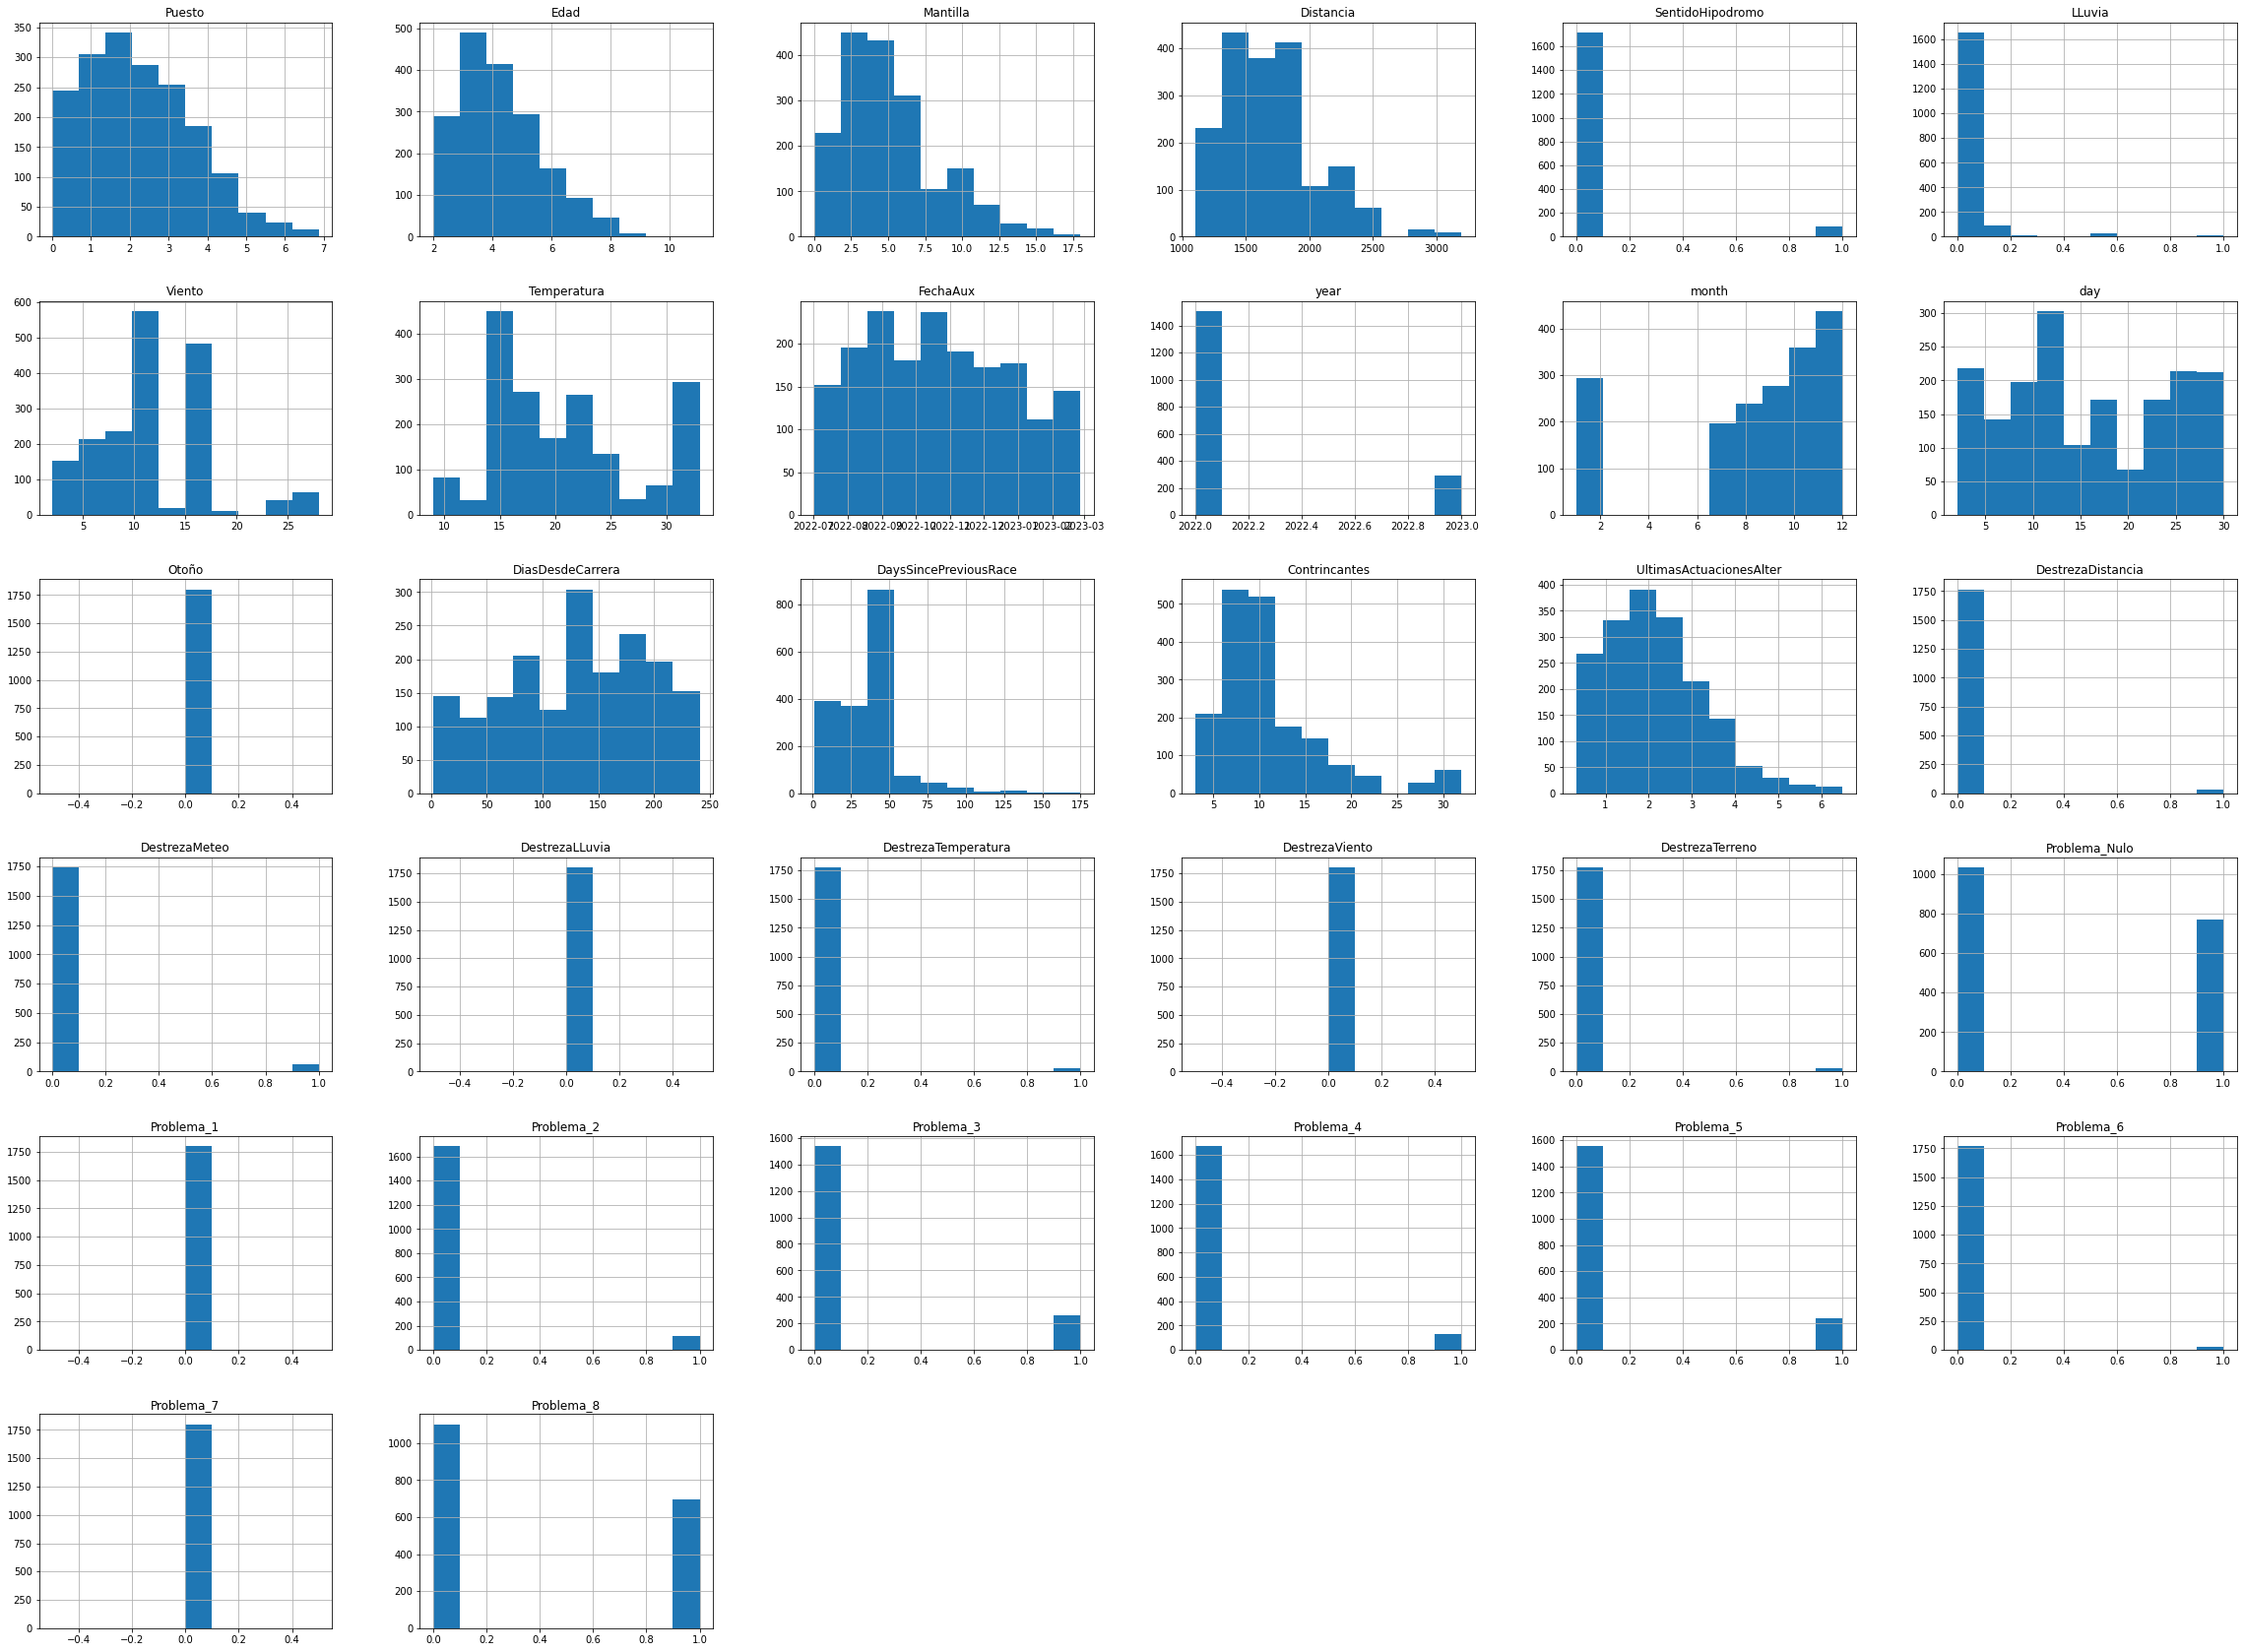

In [2116]:
train.hist(figsize = (40,30))

In [2117]:
# train['Puesto'].corr(train['MediaUltimasActuaciones'])

In [2118]:
from scipy.stats import kendalltau, pearsonr, spearmanr
def kendall_pval(x,y):
    return kendalltau(x,y)[1]

def pearsonr_pval(x,y):
    return pearsonr(x,y)[1]

def spearmanr_pval(x,y):
    return spearmanr(x,y)[1]


print("Correlation -->", train['Puesto'].corr(train['UltimasActuacionesAlter']))    
print(train['Puesto'].corr(train['UltimasActuacionesAlter'], method=kendall_pval))
print(train['Puesto'].corr(train['UltimasActuacionesAlter'], method=pearsonr_pval))   
print(train['Puesto'].corr(train['UltimasActuacionesAlter'], method=spearmanr_pval))

Correlation --> 0.5617527272361313
1.136185846809111e-161
3.072076625262698e-150
5.942724780858923e-148


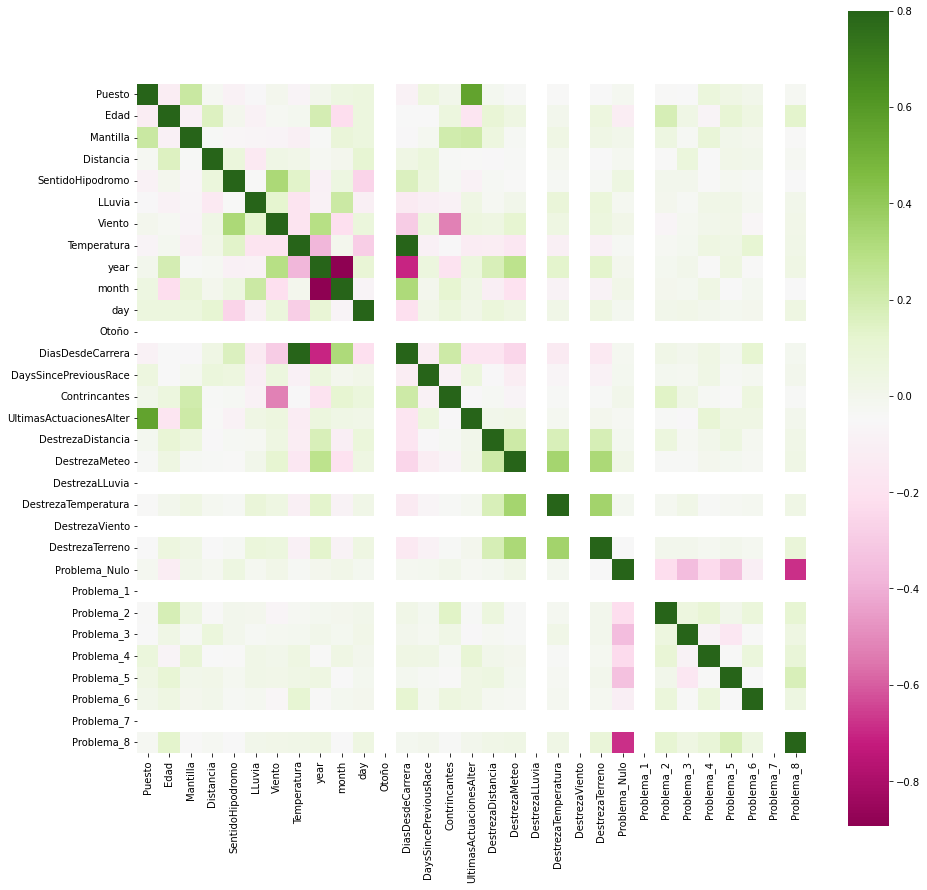

In [2119]:
C_mat = train.corr()
fig = plt.figure(figsize = (15,15))

#Correlation ranges from -1 to +1. Values closer to zero means there is no linear trend between the two variables. 
#The close to 1 the correlation is the more positively correlated they are; that is as one increases so does the other and the closer to 1 the stronger this relationship is. 
#A correlation closer to -1 is similar, but instead of both increasing one variable will decrease as the other increases.

sns.heatmap(C_mat, vmax = .8, square = True, cmap="PiYG")
plt.show()

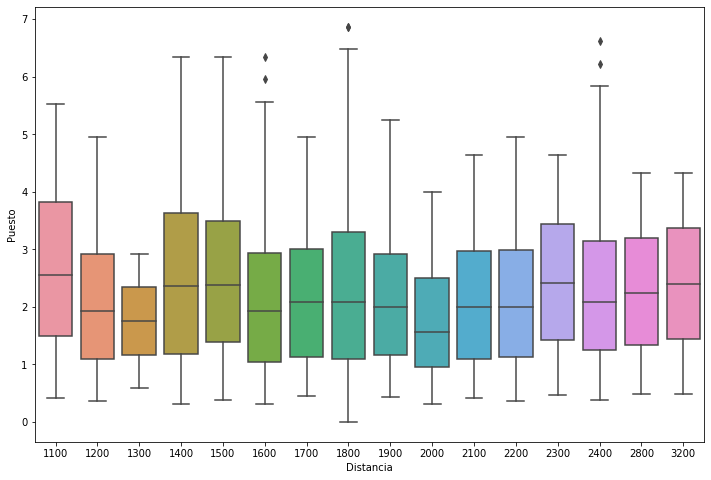

In [2120]:
plt.figure(figsize=(12,8))
sns.boxplot(data=train, x='Distancia', y='Puesto')

plt.show()

In [2121]:
print(len(train[(train['Distancia'] < 1600).tolist()]))

print(len(train[((train['Distancia'] >= 1600) & (train['Distancia'] <= 2400) ).tolist()]))

print(len(train[(train['Distancia'] >= 3200).tolist()]))

663
1112
9


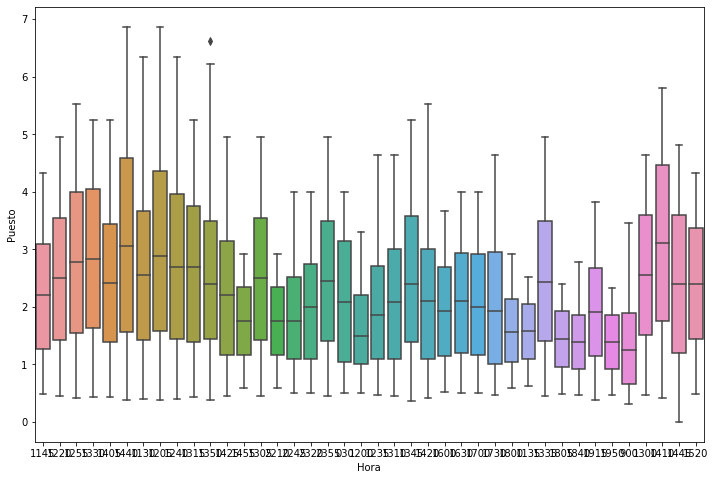

In [2122]:
plt.figure(figsize=(12,8))
sns.boxplot(data=train, x='Hora', y='Puesto')

plt.show()

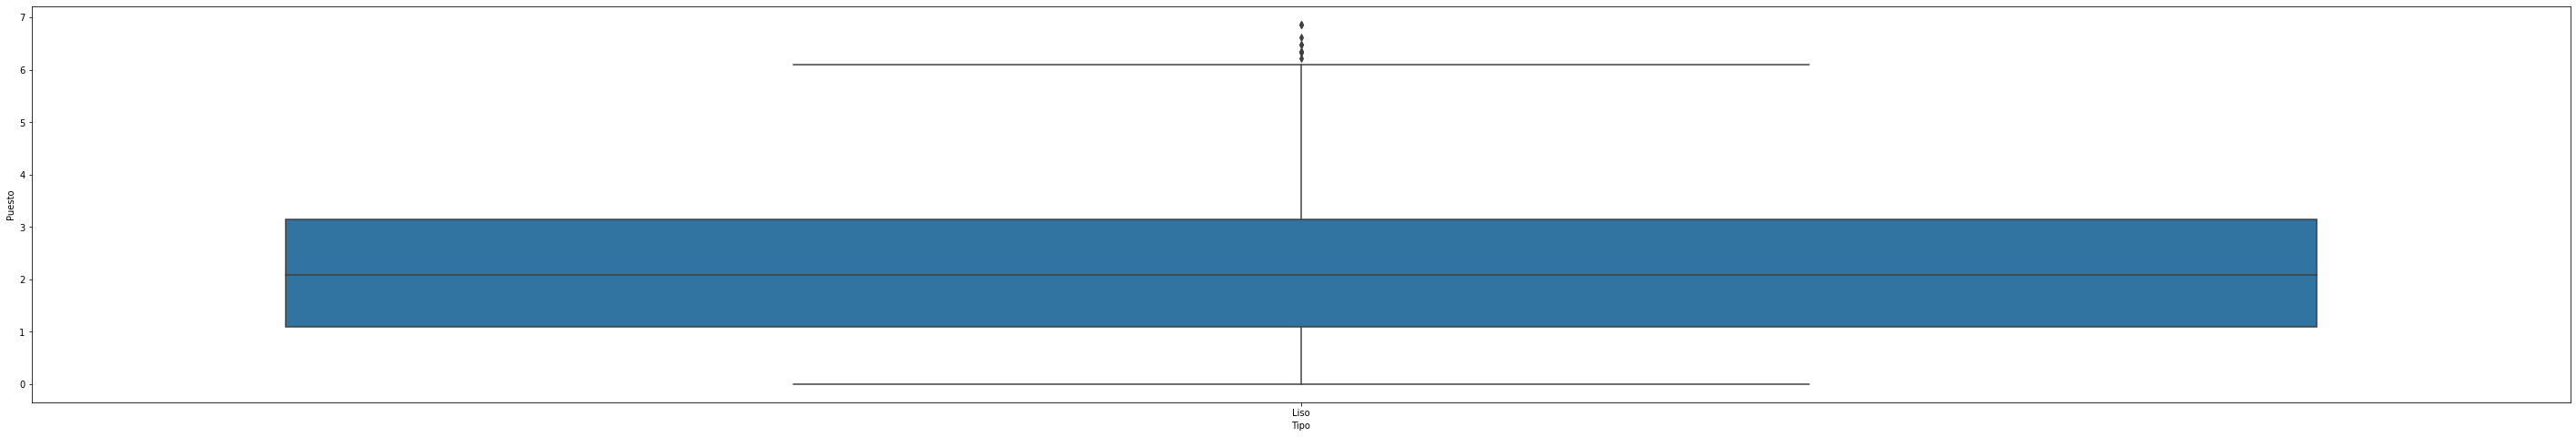

In [2123]:
plt.figure(figsize=(50,8))
sns.boxplot(data=train, x='Tipo', y='Puesto')

plt.show()

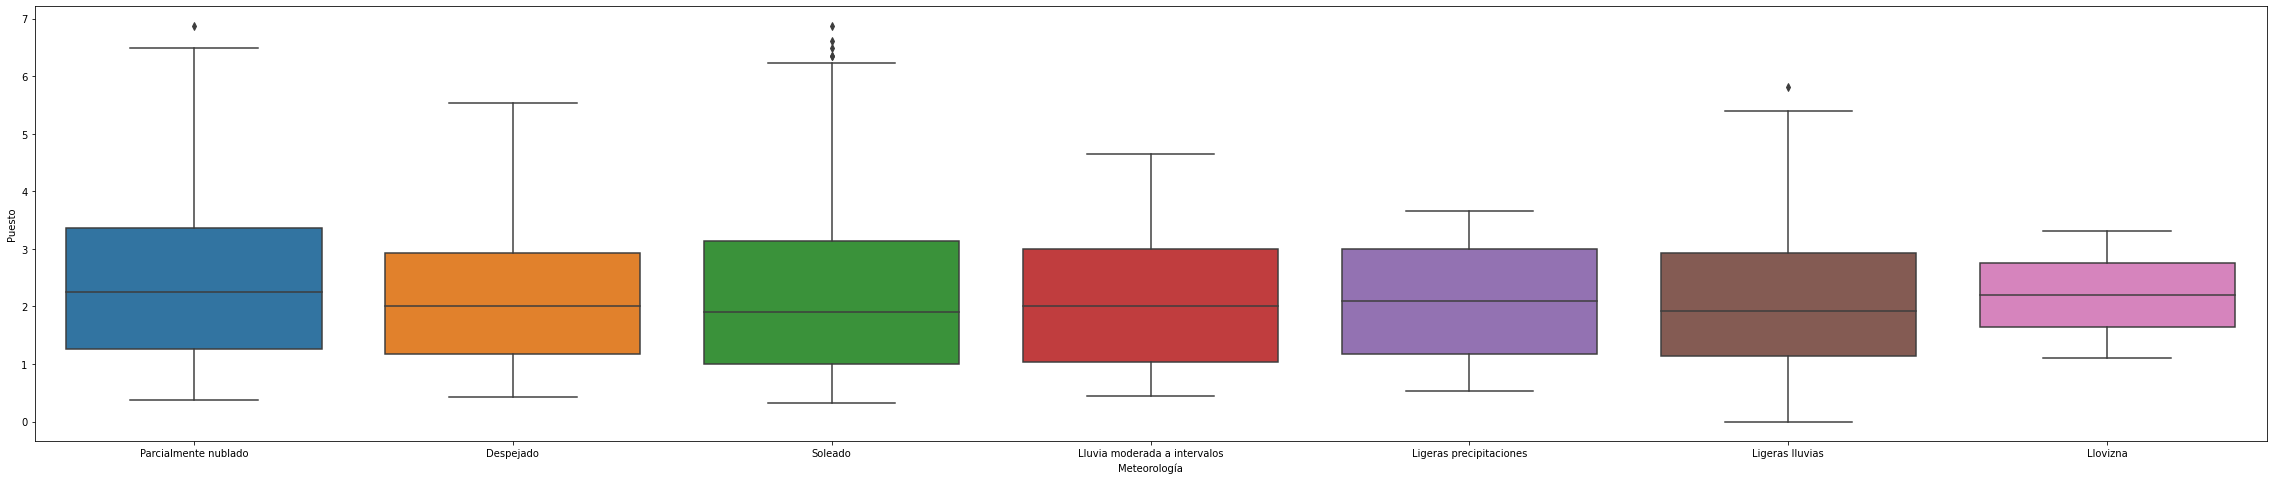

In [2124]:
plt.figure(figsize=(40,8))
sns.boxplot(data=train, x='Meteorología', y='Puesto')

plt.show()

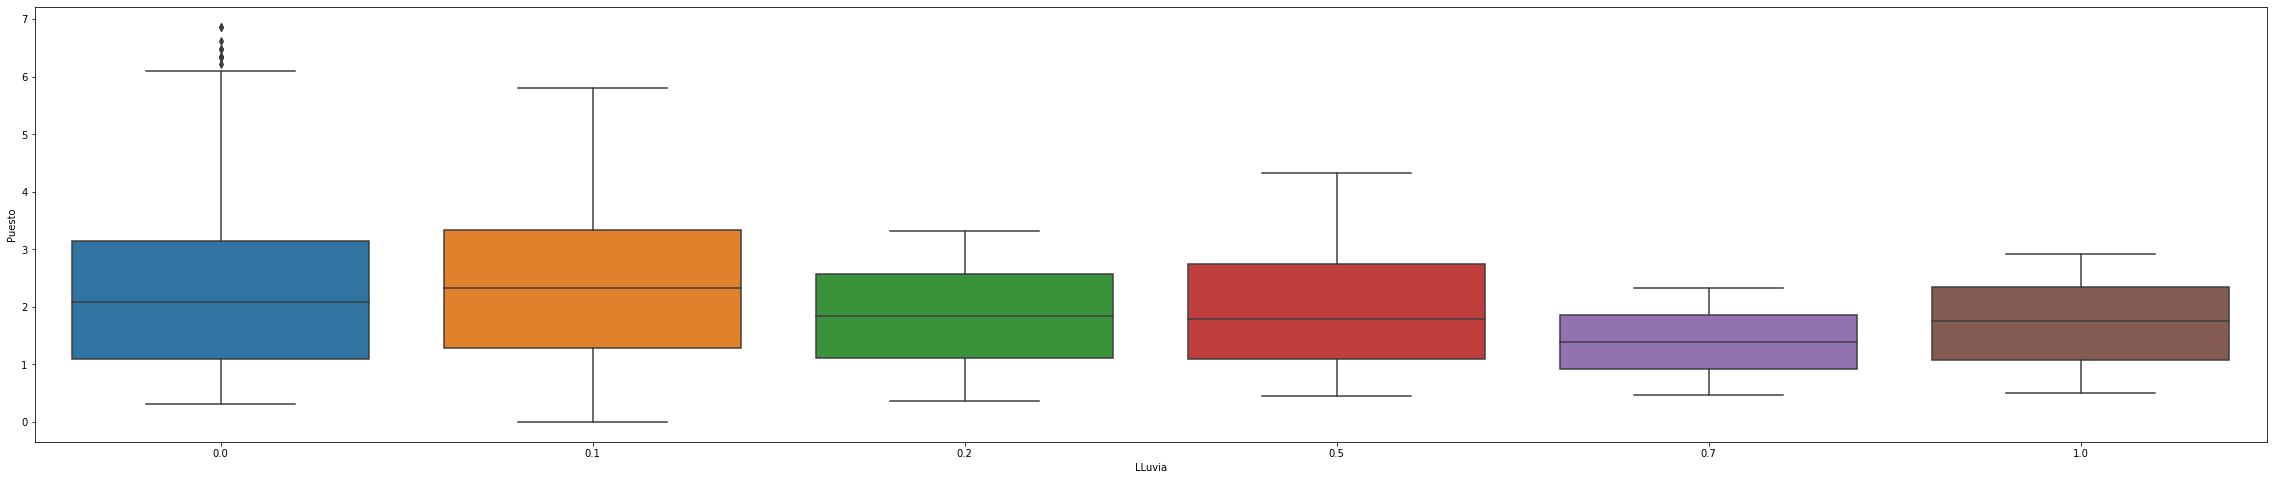

In [2125]:
plt.figure(figsize=(40,8))
sns.boxplot(data=train, x='LLuvia', y='Puesto')

plt.show()

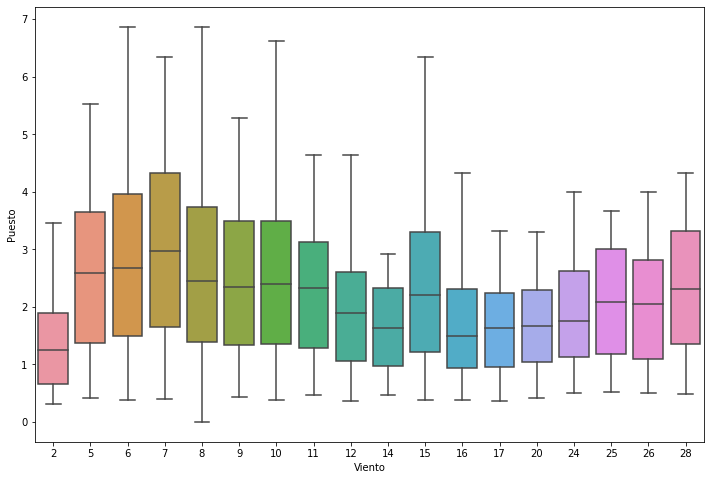

In [2126]:
plt.figure(figsize=(12,8))
sns.boxplot(data=train, x='Viento', y='Puesto')

plt.show()

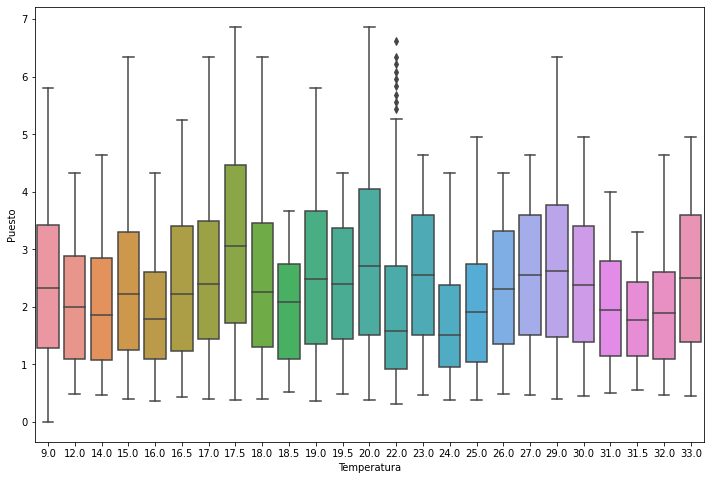

In [2127]:
plt.figure(figsize=(12,8))
sns.boxplot(data=train, x='Temperatura', y='Puesto')

plt.show()

# Preprocesamiento Final

In [2128]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Puesto                   1800 non-null   float64       
 1   NombreCaballo            1800 non-null   object        
 2   Peso                     1800 non-null   object        
 3   Edad                     1800 non-null   int64         
 4   Mantilla                 1800 non-null   int64         
 5   Propietario              1800 non-null   object        
 6   Preparador               1800 non-null   object        
 7   Jinete                   1800 non-null   object        
 8   Problemas                1800 non-null   object        
 9   Fecha                    1800 non-null   object        
 10  Hora                     1800 non-null   object        
 11  Terreno                  1800 non-null   object        
 12  Distancia                1800 non-

In [2129]:
pd.set_option('display.max_columns', None)
train.head(20)

,Puesto,NombreCaballo,Peso,Edad,Mantilla,Propietario,Preparador,Jinete,Problemas,Fecha,Hora,Terreno,Distancia,Tipo,SentidoHipodromo,Meteorología,LLuvia,Viento,Temperatura,Hipodromo,FechaAux,year,month,day,Otoño,DiasDesdeCarrera,DaysSincePreviousRace,Contrincantes,UltimasActuacionesAlter,DestrezaDistancia,DestrezaMeteo,DestrezaLLuvia,DestrezaTemperatura,DestrezaViento,DestrezaTerreno,Problema_Nulo,Problema_1,Problema_2,Problema_3,Problema_4,Problema_5,Problema_6,Problema_7,Problema_8
0,0.550321,OtherHorse,57,2,6,OtherOwner,OtherTrainer,OtherJockey,0,13 de noviembre de 2022,1145,H - Blando,1500,Liso,0,Parcialmente nublado,0.0,6,15.0,La Zarzuela,2022-11-13,2022.0,11.0,13.0,0,110.0,35.0,6.0,1.358350,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0
1,1.100642,OtherHorse,57,2,5,OtherOwner,G.ARIZKORRETA,OtherJockey,0,13 de noviembre de 2022,1145,H - Blando,1500,Liso,0,Parcialmente nublado,0.0,6,15.0,La Zarzuela,2022-11-13,2022.0,11.0,13.0,0,110.0,45.0,6.0,1.100642,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0
2,1.650964,OtherHorse,57,2,3,OtherOwner,J.M.OSORIO,J.GELABERT,0,13 de noviembre de 2022,1145,H - Blando,1500,Liso,0,Parcialmente nublado,0.0,6,15.0,La Zarzuela,2022-11-13,2022.0,11.0,13.0,0,110.0,14.0,6.0,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0
3,2.201285,OtherHorse,57,2,4,OtherOwner,B.RAMA,OtherJockey,-8,13 de noviembre de 2022,1145,H - Blando,1500,Liso,0,Parcialmente nublado,0.0,6,15.0,La Zarzuela,2022-11-13,2022.0,11.0,13.0,0,110.0,35.0,6.0,4.563778,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1
4,2.751606,DE FIESTA,57,2,2,REZA PAZOOKI,O.ANAYA,R.N.VALLE,-8,13 de noviembre de 2022,1145,H - Blando,1500,Liso,0,Parcialmente nublado,0.0,6,15.0,La Zarzuela,2022-11-13,2022.0,11.0,13.0,0,110.0,45.0,6.0,2.751606,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1
5,3.301927,OtherHorse,57,2,1,OtherOwner,A.SOTO,OtherJockey,-3,13 de noviembre de 2022,1145,H - Blando,1500,Liso,0,Parcialmente nublado,0.0,6,15.0,La Zarzuela,2022-11-13,2022.0,11.0,13.0,0,110.0,32.0,6.0,2.904569,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0
6,0.500000,OtherHorse,57,2,3,OtherOwner,J.LOPEZ,J.GELABERT,0,13 de noviembre de 2022,1220,H - Blando,1500,Liso,0,Parcialmente nublado,0.0,6,15.0,La Zarzuela,2022-11-13,2022.0,11.0,13.0,0,110.0,32.0,8.0,1.805796,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0
7,1.000000,OtherHorse,57,2,2,OtherOwner,J.LOPEZ,C.PEREZ,-3,13 de noviembre de 2022,1220,H - Blando,1500,Liso,0,Parcialmente nublado,0.0,6,15.0,La Zarzuela,2022-11-13,2022.0,11.0,13.0,0,110.0,32.0,8.0,0.873580,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0
8,1.500000,OtherHorse,57,2,9,OtherOwner,J.LOPEZ,OtherJockey,-3,13 de noviembre de 2022,1220,H - Blando,1500,Liso,0,Parcialmente nublado,0.0,6,15.0,La Zarzuela,2022-11-13,2022.0,11.0,13.0,0,110.0,35.0,8.0,1.953625,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0
9,2.000000,OtherHorse,57,2,7,E. PEREZ GUZMAN,J.A.RODRIGUEZ,R.N.VALLE,-8,13 de noviembre de 2022,1220,H - Blando,1500,Liso,0,Parcialmente nublado,0.0,6,15.0,La Zarzuela,2022-11-13,2022.0,11.0,13.0,0,110.0,21.0,8.0,2.574084,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1


In [2130]:
import sklearn
import sklearn.compose
#Solo ejecutar previo a esto product para separar las palabras
column_transformer_train = sklearn.compose.ColumnTransformer(transformers=[
    ("drop", "drop", ['Fecha','year','day', 'Problemas','Hora', 'FechaAux', 'Mantilla', 'Terreno', 'Tipo', 'Meteorología', 'LLuvia', 'Viento', 'Temperatura', 'Hipodromo', 'Contrincantes']),
    ("scale", sklearn.preprocessing.StandardScaler(), []),
    # ("num", sklearn.preprocessing.MinMaxScaler(), ['Distancia', 'Edad', 'Peso']),
    ("one-hot", sklearn.preprocessing.OneHotEncoder(handle_unknown="ignore"), ['NombreCaballo','Propietario', 'Preparador', 'Jinete']),
], remainder='passthrough');

# column_transformer = sklearn.compose.ColumnTransformer(transformers=[
#     ("drop", "drop", ['UltimasActuaciones','Fecha','year','day', 'Problemas','Hora']),
#     ("scale", sklearn.preprocessing.StandardScaler(), []),
#     ("num", sklearn.preprocessing.MinMaxScaler(), ['Distancia', 'Edad', 'Peso']),
#     ("one-hot", sklearn.preprocessing.OneHotEncoder(handle_unknown="ignore"), ['NombreCaballo', 'Mantilla','Propietario', 'Preparador', 'Jinete', 'FechaAux', 'Terreno', 'Tipo', 'Meteorología', 'LLuvia', 'Viento', 'TemperaturaMax', 'TemperaturaMin', 'Hipodromo']),
# ], remainder='passthrough');

In [2131]:
train = train.reset_index()
X=train
X = X.drop(["Puesto"], axis = 1)
X_trainAuxNN = X

In [2132]:
X_transform = column_transformer_train.fit_transform(X)

X_transformAux = pd.DataFrame(column_transformer_train.fit_transform(X).toarray()) 

In [2133]:
column_transformer_train.get_feature_names()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['one-hot__x0_AARASH',
 'one-hot__x0_ADAAYLIGHT DANCER',
 'one-hot__x0_ANGELINES',
 'one-hot__x0_ARETHA',
 'one-hot__x0_ATREVIDA',
 'one-hot__x0_BABA KARAM',
 'one-hot__x0_BELLETTI',
 'one-hot__x0_BIDUL',
 'one-hot__x0_BIG MACK',
 'one-hot__x0_BLACK VOICE',
 'one-hot__x0_BRIAREO',
 'one-hot__x0_CALCAS',
 'one-hot__x0_CARISMA',
 'one-hot__x0_COSTA ESMERALDA',
 'one-hot__x0_DE FIESTA',
 'one-hot__x0_DIMAX',
 'one-hot__x0_EINAR',
 'one-hot__x0_EL PATER',
 'one-hot__x0_FIRST CROWD',
 'one-hot__x0_GOODIE CEN',
 'one-hot__x0_HADES',
 'one-hot__x0_HARVAC',
 'one-hot__x0_HAVANA MAGIC',
 'one-hot__x0_HEADHUNTER',
 'one-hot__x0_HEBE',
 'one-hot__x0_KOHOOF',
 'one-hot__x0_LA MAL AMADA',
 'one-hot__x0_LA MENINA',
 'one-hot__x0_LADY MCQUEEN',
 'one-hot__x0_LAYALINA',
 'one-hot__x0_MACADAMIA',
 'one-hot__x0_MARY JOE',
 'one-hot__x0_MONTERREDONDO',
 'one-hot__x0_NATURAL TALENT',
 'one-hot__x0_NICODEMUS',
 'one-hot__x0_ORBAYO',
 'one-hot__x0_OtherHorse',
 'one-hot__x0_PELLIQUERO',
 'one-hot__x0_PREMIE

In [2134]:
train 
X_transform
X = X_transform  
y = train["Puesto"] #Nos quedamos con todo menos la columna objetivo, en este caso 'price'


X_trainNN = X
X_trainArrayNN = X_transformAux

y_trainNN = y     


In [2135]:
# train[['NombreCaballo','MediaUltimasActuaciones']].head(128)

In [2136]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1920)

# Optimización
---

In [2137]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor

#Regresión lineal
linear = LinearRegression()
linear.fit(X_train, y_train)

#Regresión de Ridge

ridge = Ridge()
ridge.fit(X_train, y_train)

#LASSO

lasso = linear_model.Lasso()
lasso.fit(X_train, y_train)

#ElasticNet

elasticnet = ElasticNet()
elasticnet.fit(X_train, y_train);


reg = SGDRegressor(max_iter=50, random_state=43)
reg.fit(X_train, y_train);

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [2138]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
import xgboost as xgb

for i in range(0, 11):
  for j in range(0, 11):
    #     xgb_model = xgb.XGBRegressor(objective = 'reg:squarederror', reg_alpha=i*0.1, reg_lambda=j*0.1, verbosity=0, random_state=42, eta=0.2, tree_method="exact") 148

    elasticnet = ElasticNet(alpha=i*0.1, l1_ratio=j*0.1)
    elasticnet.fit(X_train, y_train)
    print('ElasticNet (train): ' + str(mean_absolute_error(y_train, elasticnet.predict(X_train))))
    print(f'{i} {j} ' + str(mean_absolute_error(y_test, elasticnet.predict(X_test))))

<ipython-input-2138-a43deb5d10a7>:10: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  elasticnet.fit(X_train, y_train)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 630.381736826022, tolerance: 0.22323687778134638
  model = cd_fast.sparse_enet_coordinate_descent(
<ipython-input-2138-a43deb5d10a7>:10: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  elasticnet.fit(X_train, y_train)


ElasticNet (train): 0.7781333520649539
0 0 0.8993257211817525


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 630.381736826022, tolerance: 0.22323687778134638
  model = cd_fast.sparse_enet_coordinate_descent(
<ipython-input-2138-a43deb5d10a7>:10: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  elasticnet.fit(X_train, y_train)


ElasticNet (train): 0.7781333520649539
0 1 0.8993257211817525


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 630.381736826022, tolerance: 0.22323687778134638
  model = cd_fast.sparse_enet_coordinate_descent(
<ipython-input-2138-a43deb5d10a7>:10: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  elasticnet.fit(X_train, y_train)


ElasticNet (train): 0.7781333520649539
0 2 0.8993257211817525


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 630.381736826022, tolerance: 0.22323687778134638
  model = cd_fast.sparse_enet_coordinate_descent(
<ipython-input-2138-a43deb5d10a7>:10: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  elasticnet.fit(X_train, y_train)


ElasticNet (train): 0.7781333520649539
0 3 0.8993257211817525


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 630.381736826022, tolerance: 0.22323687778134638
  model = cd_fast.sparse_enet_coordinate_descent(
<ipython-input-2138-a43deb5d10a7>:10: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  elasticnet.fit(X_train, y_train)


ElasticNet (train): 0.7781333520649539
0 4 0.8993257211817525


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 630.381736826022, tolerance: 0.22323687778134638
  model = cd_fast.sparse_enet_coordinate_descent(
<ipython-input-2138-a43deb5d10a7>:10: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  elasticnet.fit(X_train, y_train)


ElasticNet (train): 0.7781333520649539
0 5 0.8993257211817525


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 630.381736826022, tolerance: 0.22323687778134638
  model = cd_fast.sparse_enet_coordinate_descent(
<ipython-input-2138-a43deb5d10a7>:10: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  elasticnet.fit(X_train, y_train)


ElasticNet (train): 0.7781333520649539
0 6 0.8993257211817525


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 630.381736826022, tolerance: 0.22323687778134638
  model = cd_fast.sparse_enet_coordinate_descent(
<ipython-input-2138-a43deb5d10a7>:10: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  elasticnet.fit(X_train, y_train)


ElasticNet (train): 0.7781333520649539
0 7 0.8993257211817525


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 630.381736826022, tolerance: 0.22323687778134638
  model = cd_fast.sparse_enet_coordinate_descent(
<ipython-input-2138-a43deb5d10a7>:10: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  elasticnet.fit(X_train, y_train)


ElasticNet (train): 0.7781333520649539
0 8 0.8993257211817525


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 630.381736826022, tolerance: 0.22323687778134638
  model = cd_fast.sparse_enet_coordinate_descent(
<ipython-input-2138-a43deb5d10a7>:10: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  elasticnet.fit(X_train, y_train)


ElasticNet (train): 0.7781333520649539
0 9 0.8993257211817525


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 630.381736826022, tolerance: 0.22323687778134638
  model = cd_fast.sparse_enet_coordinate_descent(


ElasticNet (train): 0.7781333520649539
0 10 0.8993257211817525


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 736.8601884686864, tolerance: 0.22323687778134638
  model = cd_fast.sparse_enet_coordinate_descent(


ElasticNet (train): 0.8321361084620572
1 0 0.826277100928729
ElasticNet (train): 0.8396581361329039
1 1 0.8252031005048737
ElasticNet (train): 0.842680423600688
1 2 0.8273194160050784
ElasticNet (train): 0.8455959557661051
1 3 0.8298517667710291
ElasticNet (train): 0.8475530559209168
1 4 0.8320893590228068
ElasticNet (train): 0.8499776799706266
1 5 0.8344700714429611
ElasticNet (train): 0.8529837636159205
1 6 0.8370501881582442
ElasticNet (train): 0.8549361908940489
1 7 0.8384957819294554
ElasticNet (train): 0.8560541578205131
1 8 0.8398015656840444
ElasticNet (train): 0.8571873780212541
1 9 0.8411659684833082
ElasticNet (train): 0.8583345074164801
1 10 0.8425871850515791


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 762.0256743996014, tolerance: 0.22323687778134638
  model = cd_fast.sparse_enet_coordinate_descent(


ElasticNet (train): 0.8457665511445221
2 0 0.8378995991765605
ElasticNet (train): 0.853977220499278
2 1 0.8411286799683824
ElasticNet (train): 0.8588523941887428
2 2 0.846140688983272
ElasticNet (train): 0.8638771771882521
2 3 0.8510321587245749
ElasticNet (train): 0.8670324763290302
2 4 0.853881992853001
ElasticNet (train): 0.8694652062768732
2 5 0.8566167891087952
ElasticNet (train): 0.8720371296914369
2 6 0.8595140418121325
ElasticNet (train): 0.8746694291824347
2 7 0.8624762974213185
ElasticNet (train): 0.877128947568722
2 8 0.8653367064794576
ElasticNet (train): 0.879665402437511
2 9 0.8683346687529875
ElasticNet (train): 0.8822735163577957
2 10 0.8714401725425424


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 781.3231201526336, tolerance: 0.22323687778134638
  model = cd_fast.sparse_enet_coordinate_descent(


ElasticNet (train): 0.8572274549534586
3 0 0.8493951076105026
ElasticNet (train): 0.8669617651835394
3 1 0.8563053433779478
ElasticNet (train): 0.8739884397719908
3 2 0.86326031012491
ElasticNet (train): 0.8785096028529727
3 3 0.8675847840037192
ElasticNet (train): 0.8825105604515219
3 4 0.8719764629124568
ElasticNet (train): 0.8864077417213765
3 5 0.8763157209791249
ElasticNet (train): 0.890242047993842
3 6 0.8806955206382726
ElasticNet (train): 0.8943415177746497
3 7 0.885439273666177
ElasticNet (train): 0.8986902472767042
3 8 0.8905119164717629
ElasticNet (train): 0.903331499501113
3 9 0.895855803657153
ElasticNet (train): 0.9083533376589027
3 10 0.901522767031482


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 797.3970558700238, tolerance: 0.22323687778134638
  model = cd_fast.sparse_enet_coordinate_descent(


ElasticNet (train): 0.8676253673055299
4 0 0.8604414922140956
ElasticNet (train): 0.8787023567260652
4 1 0.8699955393842127
ElasticNet (train): 0.8864906039315392
4 2 0.8771220090194305
ElasticNet (train): 0.8918465918363323
4 3 0.8828942609887347
ElasticNet (train): 0.8971397634273791
4 4 0.8886850228259942
ElasticNet (train): 0.9025749921584967
4 5 0.8948711335694616
ElasticNet (train): 0.908497728224342
4 6 0.9016862607894862
ElasticNet (train): 0.9149271363486443
4 7 0.9089331047435553
ElasticNet (train): 0.9219024400213156
4 8 0.9167294074532231
ElasticNet (train): 0.9295204431767371
4 9 0.9252075576964377
ElasticNet (train): 0.9377812180183512
4 10 0.9342664486560407


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 811.2210872105223, tolerance: 0.22323687778134638
  model = cd_fast.sparse_enet_coordinate_descent(


ElasticNet (train): 0.8769972106562917
5 0 0.8706406085130813
ElasticNet (train): 0.8894364899377861
5 1 0.8820087742636419
ElasticNet (train): 0.8975832561675001
5 2 0.8897829694028698
ElasticNet (train): 0.9043987730666845
5 3 0.8971672753391632
ElasticNet (train): 0.911387925123409
5 4 0.9048496131209134
ElasticNet (train): 0.9189343723642298
5 5 0.9133440221000445
ElasticNet (train): 0.9272136235603117
5 6 0.9227715967533019
ElasticNet (train): 0.9364016143630491
5 7 0.9329539761521488
ElasticNet (train): 0.9467762971147852
5 8 0.9439123485278057
ElasticNet (train): 0.9579840517720638
5 9 0.9557540523518884
ElasticNet (train): 0.9704389330472604
5 10 0.9687815597123655


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 823.327442376555, tolerance: 0.22323687778134638
  model = cd_fast.sparse_enet_coordinate_descent(


ElasticNet (train): 0.8854089793190117
6 0 0.8802130509753167
ElasticNet (train): 0.8993896709657856
6 1 0.8930358565398372
ElasticNet (train): 0.9082038045210432
6 2 0.9017544640716334
ElasticNet (train): 0.9164748430070592
6 3 0.9107036196096882
ElasticNet (train): 0.9253038250250386
6 4 0.920651046295987
ElasticNet (train): 0.9350991739552976
6 5 0.9317303312686152
ElasticNet (train): 0.9464490499534405
6 6 0.9437095629256445
ElasticNet (train): 0.9588428146428791
6 7 0.9569148629569406
ElasticNet (train): 0.9727341477434335
6 8 0.971428504475166
ElasticNet (train): 0.9881159830956536
6 9 0.9876221126427261
ElasticNet (train): 1.0054286148484535
6 10 1.0056656152134142


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 834.061493187465, tolerance: 0.22323687778134638
  model = cd_fast.sparse_enet_coordinate_descent(


ElasticNet (train): 0.8930351405807976
7 0 0.888894565139933
ElasticNet (train): 0.9083724231385695
7 1 0.9027181289697249
ElasticNet (train): 0.9182205908611961
7 2 0.9130012247305207
ElasticNet (train): 0.9279454976601315
7 3 0.9237622044247615
ElasticNet (train): 0.9389015804211639
7 4 0.9359348380744553
ElasticNet (train): 0.9516353653366569
7 5 0.9494330141067528
ElasticNet (train): 0.965698368634563
7 6 0.9643569985054071
ElasticNet (train): 0.9815960667913332
7 7 0.9810173354174961
ElasticNet (train): 0.999433301337745
7 8 0.9996089859493683
ElasticNet (train): 1.0198734004882546
7 9 1.0205098855879475
ElasticNet (train): 1.042572969441179
7 10 1.0438936182227894


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 843.6683852565711, tolerance: 0.22323687778134638
  model = cd_fast.sparse_enet_coordinate_descent(


ElasticNet (train): 0.900016203245123
8 0 0.8968139642432501
ElasticNet (train): 0.916464995780323
8 1 0.9118356948532929
ElasticNet (train): 0.9274464170999467
8 2 0.9234892440245575
ElasticNet (train): 0.9389942066244535
8 3 0.9362833967051007
ElasticNet (train): 0.9525173487449625
8 4 0.9506542496953604
ElasticNet (train): 0.9677184841676172
8 5 0.9666861631930668
ElasticNet (train): 0.9849198150648497
8 6 0.9847224967839209
ElasticNet (train): 1.0045619644213928
8 7 1.0050415568727649
ElasticNet (train): 1.0270931943044441
8 8 1.027994249514698
ElasticNet (train): 1.052355345468807
8 9 1.0540152092266997
ElasticNet (train): 1.081711645687912
8 10 1.0844774141615796


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 852.331650696341, tolerance: 0.22323687778134638
  model = cd_fast.sparse_enet_coordinate_descent(


ElasticNet (train): 0.9064944518203304
9 0 0.904214941413915
ElasticNet (train): 0.9237924874253763
9 1 0.9204820546463354
ElasticNet (train): 0.9361523083707234
9 2 0.9334791234093271
ElasticNet (train): 0.9498722104543497
9 3 0.9481796183173328
ElasticNet (train): 0.9656470573915864
9 4 0.9646872253759453
ElasticNet (train): 0.9834795260258941
9 5 0.9834128403420944
ElasticNet (train): 1.004061348047873
9 6 1.0046475643494317
ElasticNet (train): 1.027827874444923
9 7 1.0288785730088332
ElasticNet (train): 1.0546985478241304
9 8 1.056444839362094
ElasticNet (train): 1.0859239804647636
9 9 1.0888827650622457
ElasticNet (train): 1.0883809228177084
9 10 1.0912475034267124
ElasticNet (train): 0.9125659086557303
10 0 0.9111127859681076
ElasticNet (train): 0.9306927325200695
10 1 0.9285051307234423
ElasticNet (train): 0.9445848033894525
10 2 0.9429446398551717
ElasticNet (train): 0.96033388043748
10 3 0.9593309173456714
ElasticNet (train): 0.9782452322220061
10 4 0.9781400543526201
ElasticN

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 860.1935875321971, tolerance: 0.22323687778134638
  model = cd_fast.sparse_enet_coordinate_descent(


In [2139]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
import xgboost as xgb

for i in range(0, 11):
  for j in range(0, 11):
    #     xgb_model = xgb.XGBRegressor(objective = 'reg:squarederror', reg_alpha=i*0.1, reg_lambda=j*0.1, verbosity=0, random_state=42, eta=0.2, tree_method="exact") 148

    xgb_model = xgb.XGBRegressor(objective = 'reg:squarederror', reg_alpha=i*0.1, reg_lambda=j*0.1, verbosity=0, random_state=42, eta=0.2, tree_method="exact") #subsample ojo
    xgb_model.fit(X_train, y_train)
    print('ElasticNet (train): ' + str(mean_absolute_error(y_train, xgb_model.predict(X_train))))
    print(f'{i} {j} ' + str(mean_absolute_error(y_test, xgb_model.predict(X_test))))

ElasticNet (train): 0.6411642694817491
0 0 0.8022226753380973
ElasticNet (train): 0.6478253036149317
0 1 0.793954200814653
ElasticNet (train): 0.6492120687492985
0 2 0.789407061365847
ElasticNet (train): 0.6419370822894103
0 3 0.7937280532472083
ElasticNet (train): 0.6506201529630488
0 4 0.7934201509650444
ElasticNet (train): 0.6526420283114561
0 5 0.7958249996880647
ElasticNet (train): 0.6528385440921026
0 6 0.7910665778885486
ElasticNet (train): 0.6497908274819417
0 7 0.789958185470245
ElasticNet (train): 0.6524244147993581
0 8 0.7958339323247516
ElasticNet (train): 0.65095219195524
0 9 0.7937855573760079
ElasticNet (train): 0.6521568411705083
0 10 0.7917773998367841
ElasticNet (train): 0.64023013593261
1 0 0.7923721519848107
ElasticNet (train): 0.6457786017557021
1 1 0.7936552445936307
ElasticNet (train): 0.6432354715015014
1 2 0.795434672038181
ElasticNet (train): 0.6462990828997274
1 3 0.7913358961925215
ElasticNet (train): 0.6475646963703363
1 4 0.7914782308926684
ElasticNet (tra

In [2140]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(objective = 'reg:squarederror', reg_alpha=7*0.1, reg_lambda=4*0.1, verbosity=0, random_state=42, eta=0.2, tree_method="exact")

xgb_model.fit(X, y)
#print('Lineal (train): ' + str(mean_absolute_error(y_train, xgb_model.predict(X))))
#print('Lineal (test): ' + str(mean_absolute_error(y_test, xgb_model.predict(X_test))))

XGBRegressor(eta=0.2, objective='reg:squarederror', random_state=42,
             reg_alpha=0.7000000000000001, reg_lambda=0.4, tree_method='exact',
             verbosity=0)

In [2141]:
!pip install catboost
import catboost as cb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2142]:
params = {"depth": 10, "learning_rate": 0.5, "iterations": 1, "l2_leaf_reg": 5} #Iterations CatBoost
model_cat_tun = cb.CatBoostClassifier(**params)
model_cat_tun.fit(X,y)

0:	learn: 5.2758482	total: 11.6s	remaining: 0us


In [2143]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor


# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 2000, random_state = 42)
# Train the model on training data
rf.fit(X, y);

In [2144]:

from sklearn.tree import DecisionTreeRegressor

# Build decision tree
tree=DecisionTreeRegressor(max_depth=20)
tree.fit(X, y);

In [2145]:
from sklearn.metrics import mean_absolute_error


print('RandomForest (train): ' + str(mean_absolute_error(y_train,  rf.predict(X_train))))
print('RandomForest (test): ' + str(mean_absolute_error(y_test,  rf.predict(X_test))))


print('---')


print('XGB (train): ' + str(mean_absolute_error(y_train, xgb_model.predict(X_train))))
print('XGB (test): ' + str(mean_absolute_error(y_test, xgb_model.predict(X_test))))



print('---')

print('Cat (train): ' + str(mean_absolute_error(y_train, model_cat_tun.predict(X_train))))
print('Cat (test): ' + str(mean_absolute_error(y_test, model_cat_tun.predict(X_test))))



print('---')

print('Lineal (train): ' + str(mean_absolute_error(y_train, linear.predict(X_train))))
print('Lineal (test): ' + str(mean_absolute_error(y_test, linear.predict(X_test))))

print('---')

print('Ridge (train): ' + str(mean_absolute_error(y_train, ridge.predict(X_train))))
print('Ridge (test): ' + str(mean_absolute_error(y_test, ridge.predict(X_test))))

print('---')

print('LASSO (train): ' + str(mean_absolute_error(y_train, lasso.predict(X_train))))
print('LASSO (test): ' + str(mean_absolute_error(y_test, lasso.predict(X_test))))

print('---')

print('ElasticNet (train): ' + str(mean_absolute_error(y_train, elasticnet.predict(X_train))))
print('ElasticNet (test): ' + str(mean_absolute_error(y_test, elasticnet.predict(X_test))))

print('---')

print('SGD (train): ' + str(mean_absolute_error(y_train, reg.predict(X_train))))
print('SGD (test): ' + str(mean_absolute_error(y_test, reg.predict(X_test))))

RandomForest (train): 0.2788202062239203
RandomForest (test): 0.27168948456485237
---
XGB (train): 0.6594260924879095
XGB (test): 0.6467250519839116
---
Cat (train): 1.0093856043289249
Cat (test): 0.9993129861538057
---
Lineal (train): 0.7781544984328357
Lineal (test): 0.8985498829833211
---
Ridge (train): 0.8235932441793408
Ridge (test): 0.8043543658326752
---
LASSO (train): 1.0885555554273145
LASSO (test): 1.091148349267118
---
ElasticNet (train): 1.0885555554273145
ElasticNet (test): 1.091148349267118
---
SGD (train): 1939160124193925.0
SGD (test): 1950088311228126.8


In [2146]:
from sklearn.metrics import accuracy_score

print('Lineal (train): ' + str(linear.score(X_train, y_train)))
print('Lineal (test): ' + str(linear.score(X_test, y_test)))
print('---')
print('Ridge (train): ' + str(ridge.score(X_train, y_train)))
print('Ridge (test): ' + str(ridge.score(X_test, y_test)))
print('---')
print('LASSO (train): ' + str(lasso.score(X_train, y_train)))
print('LASSO (test): ' + str(lasso.score(X_test, y_test)))
print('---')
print('ElasticNet (train): ' + str(elasticnet.score(X_train, y_train)))
print('ElasticNet (test): ' + str(elasticnet.score(X_test, y_test)))

Lineal (train): 0.43523486090665375
Lineal (test): 0.22233160160818177
---
Ridge (train): 0.3529411989711877
Ridge (test): 0.3522903689080348
---
LASSO (train): 0.05647402440953686
LASSO (test): 0.03567449730011396
---
ElasticNet (train): 0.05647402440953686
ElasticNet (test): 0.03567449730011396


In [2147]:
from sklearn.metrics import mean_squared_error
from math import sqrt
print('Lineal (train): ' + str(sqrt(mean_squared_error(y_train, linear.predict(X_train)))))
print('Lineal (test): ' + str(sqrt(mean_squared_error(y_test, linear.predict(X_test)))))
print('---')
print('Ridge (train): ' + str(sqrt(mean_squared_error(y_train, ridge.predict(X_train)))))
print('Ridge (test): ' + str(sqrt(mean_squared_error(y_test, ridge.predict(X_test)))))
print('---')
print('LASSO (train): ' + str(sqrt(mean_squared_error(y_train, lasso.predict(X_train)))))
print('LASSO (test): ' + str(sqrt(mean_squared_error(y_test, lasso.predict(X_test)))))
print('---')
print('ElasticNet (train): ' + str(sqrt(mean_squared_error(y_train, elasticnet.predict(X_train)))))
print('ElasticNet (test): ' + str(sqrt(mean_squared_error(y_test, elasticnet.predict(X_test)))))

Lineal (train): 1.022452772048278
Lineal (test): 1.182514729289644
---
Ridge (train): 1.094412866825441
Ridge (test): 1.0791939718720207
---
LASSO (train): 1.321558056105932
LASSO (test): 1.3168040680594852
---
ElasticNet (train): 1.321558056105932
ElasticNet (test): 1.3168040680594852


Linear
---

In [2148]:
from sklearn.model_selection import GridSearchCV

In [2149]:
fit_intercept = [True, False]
copy_x = [True, False]
normalize = [True, False]

In [2150]:
linear_Grid = GridSearchCV(
  estimator = LinearRegression(),
  param_grid = dict(fit_intercept = fit_intercept, copy_X = copy_x, normalize = normalize),
  cv = 5
)
linear_Grid.fit(X, y)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pi

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]})

In [2151]:
linear_Grid.best_estimator_

LinearRegression(fit_intercept=False, normalize=True)

In [2152]:
linear_Grid.best_params_

{'copy_X': True, 'fit_intercept': False, 'normalize': True}

In [2153]:
linear_Grid.best_score_

-1.5823328682618665

In [2154]:
linear = LinearRegression(fit_intercept=True, normalize=False, copy_X=True)
linear.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


LinearRegression(normalize=False)

In [2155]:
print("MAE: ")
print('Train: ' + str(mean_absolute_error(y_train, linear.predict(X_train))))
print('Test: ' + str(mean_absolute_error(y_test, linear.predict(X_test))))
print("---------------------------------------")
print("R^2: ")
print("Train: " + str(linear.score(X_train, y_train)))
print("Test: " + str(linear.score(X_test, y_test)))
print("---------------------------------------")
print("RMST: ")
print('Train: ' + str(sqrt(mean_squared_error(y_train, linear.predict(X_train)))))
print('Test: ' + str(sqrt(mean_squared_error(y_train, linear.predict(X_train)))))

MAE: 
Train: 0.7781544984328357
Test: 0.8985498829833211
---------------------------------------
R^2: 
Train: 0.43523486090665375
Test: 0.22233160160818177
---------------------------------------
RMST: 
Train: 1.022452772048278
Test: 1.022452772048278


Se puede observar que no mejora ya que los parámetros que nos da el GridSearch son los mismos que tiene de base.

Ridge
---

In [2156]:
ridge_Grid = GridSearchCV(
  estimator = Ridge(),
  param_grid = dict(alpha= np.linspace(0, 1, 50), copy_X = copy_x, fit_intercept=fit_intercept, normalize = normalize),
  cv = 5

)
ridge_Grid.fit(X, y)

Se han truncado las últimas 5000 líneas del flujo de salida.
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing s

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ]),
                         'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]})

In [2157]:
ridge_Grid.best_estimator_

Ridge(alpha=0.5510204081632653, normalize=False)

In [2158]:
ridge_Grid.best_params_

{'alpha': 0.5510204081632653,
 'copy_X': True,
 'fit_intercept': True,
 'normalize': False}

In [2159]:
ridge_Grid.best_score_

0.21725000089261237

In [2160]:
ridge = Ridge(alpha=0.32653061224489793, copy_X=True, fit_intercept=True,
      normalize=True, random_state=1337, solver='auto', tol=0.001)
ridge.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


Ridge(alpha=0.32653061224489793, normalize=True, random_state=1337)

In [2161]:
print("MAE: ")
print('Train: ' + str(mean_absolute_error(y_train, ridge.predict(X_train))))
print('Test: ' + str(mean_absolute_error(y_test, ridge.predict(X_test))))
print("---------------------------------------")
print("R^2: ")
print("Train: " + str(ridge.score(X_train, y_train)))
print("Test: " + str(ridge.score(X_test, y_test)))
print("---------------------------------------")
print("RMST: ")
print('Train: ' + str(sqrt(mean_squared_error(y_train, ridge.predict(X_train)))))
print('Test: ' + str(sqrt(mean_squared_error(y_test, ridge.predict(X_test)))))

MAE: 
Train: 0.8249225343787808
Test: 0.9124077644161338
---------------------------------------
R^2: 
Train: 0.4065119620227259
Test: 0.2434717142114996
---------------------------------------
RMST: 
Train: 1.048130360242254
Test: 1.1663312677515045


Parece que empeora ligeramente con respecto a los valores por defecto que tenía antes.

LASSO
---

In [2162]:
lasso_Grid = GridSearchCV(estimator = linear_model.Lasso(), param_grid = dict(alpha= np.linspace(0.05,1,20)), cv = 5)
lasso_Grid.fit(X, y)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])})

In [2163]:
lasso_Grid.best_params_

{'alpha': 0.05}

In [2164]:
lasso = linear_model.Lasso(alpha=1, random_state=1337)
lasso.fit(X_train, y_train)

Lasso(alpha=1, random_state=1337)

In [2165]:
print("MAE: ")
print('Train: ' + str(mean_absolute_error(y_train, lasso.predict(X_train))))
print('Test: ' + str(mean_absolute_error(y_test, lasso.predict(X_test))))
print("---------------------------------------")
print("R^2: ")
print("Train: " + str(lasso.score(X_train, y_train)))
print("Test: " + str(lasso.score(X_test, y_test)))
print("---------------------------------------")
print("RMST: ")
print('Train: ' + str(sqrt(mean_squared_error(y_train, lasso.predict(X_train)))))
print('Test: ' + str(sqrt(mean_squared_error(y_train, lasso.predict(X_train)))))

MAE: 
Train: 1.0885555554273145
Test: 1.091148349267118
---------------------------------------
R^2: 
Train: 0.05647402440953686
Test: 0.03567449730011396
---------------------------------------
RMST: 
Train: 1.321558056105932
Test: 1.321558056105932


Se queda igual que con los valores de base.

ElasticNet
---

Este regresor a veces funciona y a veces explota, dejamos guardado los resultados de cuando ha funcionado. De todos modos nos sale el siguiente error:<br>


```
# /usr/local/lib/python3.6/dist-packages/sklearn linear_model_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge.
```



In [2166]:
elastic_Grid = GridSearchCV(
  estimator = ElasticNet(),
  param_grid = dict(alpha=np.linspace(0.1,1,2), l1_ratio=np.linspace(0,1,2)),
  cv = 5
)
elastic_Grid.fit(X, y)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 754.1459097824653, tolerance: 0.24073006932368832
  model = cd_fast.sparse_enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 828.99607813113, tolerance: 0.23738329521858964
  model = cd_fast.sparse_enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 922.0333378095322, tolerance: 0.2828808664453887
  model = cd_fast.sparse_enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:609: Convergen

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': array([0.1, 1. ]),
                         'l1_ratio': array([0., 1.])})

In [2167]:
elastic_Grid.best_params_

{'alpha': 0.1, 'l1_ratio': 0.0}

In [2168]:
elasticnet = ElasticNet(alpha = 1.0, l1_ratio = 1, fit_intercept=True, normalize=False, copy_X=True)
elasticnet.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


ElasticNet(l1_ratio=1, normalize=False)

In [2169]:
print("MAE: ")
print('Train: ' + str(mean_absolute_error(y_train, elasticnet.predict(X_train))))
print('Test: ' + str(mean_absolute_error(y_test, elasticnet.predict(X_test))))
print("---------------------------------------")
print("R^2: ")
print("Train: " + str(lasso.score(X_train, y_train)))
print("Test: " + str(lasso.score(X_test, y_test)))
print("---------------------------------------")
print("RMST: ")
print('Train: ' + str(sqrt(mean_squared_error(y_train, elasticnet.predict(X_train)))))
print('Test: ' + str(sqrt(mean_squared_error(y_train, elasticnet.predict(X_train)))))

MAE: 
Train: 1.0885555554273145
Test: 1.091148349267118
---------------------------------------
R^2: 
Train: 0.05647402440953686
Test: 0.03567449730011396
---------------------------------------
RMST: 
Train: 1.321558056105932
Test: 1.321558056105932


# Validación Cruzada
---

## Linear

MAE

In [2170]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_validate

In [2171]:
cv_scores_linearMAE = cross_val_score(
                estimator = linear,
                X         = X,
                y         = y,
                scoring   = 'neg_mean_absolute_error',
                cv        = 5
             )
print(f"Métricas validación cruzada: {cv_scores_linearMAE}")
print(f"Média métricas de validación cruzada: {cv_scores_linearMAE.mean()}")

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave 

Métricas validación cruzada: [-1.08474517 -0.96346592 -0.78783327 -0.59749281 -3.85562433]
Média métricas de validación cruzada: -1.457832299396961


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


R^2

In [2172]:
cv_scores_linearR = cross_val_score(
                estimator = linear,
                X         = X,
                y         = y,
                scoring   = 'r2',
                cv        = 5
             )
print(f"Métricas validación cruzada: {cv_scores_linearR}")
print(f"Média métricas de validación cruzada: {cv_scores_linearR.mean()}")

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave 

Métricas validación cruzada: [ 0.14075706  0.29062191  0.09720088  0.37199012 -9.78790284]
Média métricas de validación cruzada: -1.7774665763474071


RMSE

In [2173]:
cv_scores_linearRMSE = cross_val_score(
                estimator = linear,
                X         = X,
                y         = y,
                scoring   = 'neg_mean_squared_error',
                cv        = 5
             )
print(f"Métricas validación cruzada: {cv_scores_linearRMSE}")
print(f"Média métricas de validación cruzada: {cv_scores_linearRMSE.mean()}")

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave 

Métricas validación cruzada: [ -1.94766836  -1.68596365  -1.06360085  -0.59624749 -17.83442976]
Média métricas de validación cruzada: -4.625582022811159


## Ridge
---

MAE

In [2174]:
cv_scores_ridgeMAE = cross_val_score(
                estimator = ridge,
                X         = X,
                y         = y,
                scoring   = 'neg_mean_absolute_error',
                cv        = 5
             )
print(f"Métricas validación cruzada: {cv_scores_ridgeMAE}")
print(f"Média métricas de validación cruzada: {cv_scores_ridgeMAE.mean()}")

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipel

Métricas validación cruzada: [-1.10076078 -1.01877684 -0.82842919 -0.67343265 -1.05377548]
Média métricas de validación cruzada: -0.9350349877866728


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipel

R^2

In [2175]:
cv_scores_ridgeR = cross_val_score(
                estimator = ridge,
                X         = X,
                y         = y,
                scoring   = 'r2',
                cv        = 5
             )
print(f"Métricas validación cruzada: {cv_scores_ridgeR}")
print(f"Média métricas de validación cruzada: {cv_scores_ridgeR.mean()}")

Métricas validación cruzada: [ 0.15518416  0.26438165  0.11150749  0.27436483 -0.03653866]
Média métricas de validación cruzada: 0.15377989291062388


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipel

RMSE

In [2176]:
cv_scores_ridgeRMSE = cross_val_score(
                estimator = ridge,
                X         = X,
                y         = y,
                scoring   = 'neg_mean_squared_error',
                cv        = 5
             )
print(f"Métricas validación cruzada: {cv_scores_ridgeRMSE}")
print(f"Média métricas de validación cruzada: {cv_scores_ridgeRMSE.mean()}")

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipel

Métricas validación cruzada: [-1.91496609 -1.7483283  -1.04674602 -0.68893526 -1.71359311]
Média métricas de validación cruzada: -1.4225137541890192


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipel

## LASSO
---

MAE

In [2177]:
cv_scores_lassoMAE = cross_val_score(
                estimator = lasso,
                X         = X,
                y         = y,
                scoring   = 'neg_mean_absolute_error',
                cv        = 5
             )
print(f"Métricas validación cruzada: {cv_scores_lassoMAE}")
print(f"Média métricas de validación cruzada: {cv_scores_lassoMAE.mean()}")

Métricas validación cruzada: [-1.26045926 -1.29158624 -0.99707041 -0.89701714 -1.26894694]
Média métricas de validación cruzada: -1.1430159981171397


R^2

In [2178]:
cv_scores_lassoR = cross_val_score(
                estimator = lasso,
                X         = X,
                y         = y,
                scoring   = 'r2',
                cv        = 5
             )
print(f"Métricas validación cruzada: {cv_scores_lassoR}")
print(f"Média métricas de validación cruzada: {cv_scores_lassoR.mean()}")

Métricas validación cruzada: [-0.00242062 -0.07413449 -0.16972278 -0.16795306 -0.56320001]
Média métricas de validación cruzada: -0.19548619284671923


RMSE

In [2179]:
cv_scores_lassoRMSE = cross_val_score(
                estimator = lasso,
                X         = X,
                y         = y,
                scoring   = 'neg_mean_squared_error',
                cv        = 5
             )
print(f"Métricas validación cruzada: {cv_scores_lassoRMSE}")
print(f"Média métricas de validación cruzada: {cv_scores_lassoRMSE.mean()}")

Métricas validación cruzada: [-2.27221295 -2.55287232 -1.37806752 -1.10888236 -2.58426324]
Média métricas de validación cruzada: -1.9792596785373255


## ElasticNet
---

MAE

In [2180]:
cv_scores_netMAE = cross_val_score(
                estimator = elasticnet,
                X         = X,
                y         = y,
                scoring   = 'neg_mean_absolute_error',
                cv        = 5
             )
print(f"Métricas validación cruzada: {cv_scores_netMAE}")
print(f"Média métricas de validación cruzada: {cv_scores_netMAE.mean()}")

Métricas validación cruzada: [-1.26045926 -1.29158624 -0.99707041 -0.89701714 -1.26894694]
Média métricas de validación cruzada: -1.1430159981171397


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave 

R^2

In [2181]:
cv_scores_netR = cross_val_score(
                estimator = elasticnet,
                X         = X,
                y         = y,
                scoring   = 'r2',
                cv        = 5
             )
print(f"Métricas validación cruzada: {cv_scores_netR}")
print(f"Média métricas de validación cruzada: {cv_scores_netR.mean()}")

Métricas validación cruzada: [-0.00242062 -0.07413449 -0.16972278 -0.16795306 -0.56320001]
Média métricas de validación cruzada: -0.19548619284671923


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave 

RMSE

In [2182]:
cv_scores_netRMSE = cross_val_score(
                estimator = elasticnet,
                X         = X,
                y         = y,
                scoring   = 'neg_mean_squared_error',
                cv        = 5
             )
print(f"Métricas validación cruzada: {cv_scores_netRMSE}")
print(f"Média métricas de validación cruzada: {cv_scores_netRMSE.mean()}")

Métricas validación cruzada: [-2.27221295 -2.55287232 -1.37806752 -1.10888236 -2.58426324]
Média métricas de validación cruzada: -1.9792596785373255


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave 

## XGBoost
---

MAE

In [2183]:
cv_scores_netMAE = cross_val_score(
                estimator = xgb_model,
                X         = X,
                y         = y,
                scoring   = 'neg_mean_absolute_error',
                cv        = 5
             )
print(f"Métricas validación cruzada: {cv_scores_netMAE}")
print(f"Média métricas de validación cruzada: {cv_scores_netMAE.mean()}")

Métricas validación cruzada: [-1.05120721 -0.88772497 -0.70999598 -0.47398088 -1.00073165]
Média métricas de validación cruzada: -0.8247281406529717


R^2

In [2184]:
cv_scores_netR = cross_val_score(
                estimator = xgb_model,
                X         = X,
                y         = y,
                scoring   = 'r2',
                cv        = 5
             )
print(f"Métricas validación cruzada: {cv_scores_netR}")
print(f"Média métricas de validación cruzada: {cv_scores_netR.mean()}")

Métricas validación cruzada: [0.09153937 0.34307629 0.24255909 0.54992112 0.07086836]
Média métricas de validación cruzada: 0.25959284773427266


RMSE

In [2185]:
cv_scores_netRMSE = cross_val_score(
                estimator = xgb_model,
                X         = X,
                y         = y,
                scoring   = 'neg_mean_squared_error',
                cv        = 5
             )
print(f"Métricas validación cruzada: {cv_scores_netRMSE}")
print(f"Média métricas de validación cruzada: {cv_scores_netRMSE.mean()}")

Métricas validación cruzada: [-2.05923138 -1.56129644 -0.89235221 -0.42731557 -1.53602913]
Média métricas de validación cruzada: -1.2952449456759334


# Prueba
---

In [2186]:
train = test
train['NombreCaballo'].value_counts()[:35].sort_values(ascending=False) #90 primeras apariencias >= 3

ORBAYO                 1
BLACK VOICE            1
VALE                   1
BIG MACK               1
EINAR                  1
BELLETTI               1
BIDUL                  1
COSTA ESMERALDA        1
LAYALINA               1
DIMAX                  1
UROGALLO               1
WINTON                 1
AARASH                 1
TRES DE TREBOL         1
LA MAL AMADA           1
VINCI LISA             1
BABA KARAM             1
WINTER'S TALE          1
THE GREY WOLF          1
HEADHUNTER             1
PREMIERE RHAPSODIE     1
KOHOOF                 1
VELETA                 1
CARISMA                1
HAVANA MAGIC           1
HADES                  1
MONTERREDONDO          1
VEREMOS                1
SALLAB                 1
PELLIQUERO             1
CALCAS                 1
NICODEMUS              1
FIRST CROWD            1
SIR THOMAS             1
NATURAL TALENT         1
Name: NombreCaballo, dtype: int64

# Ajuste Preprocesamiento
- Borrar Puesto
- Ajuste Listas Apariciones

In [2187]:
train = train.drop('DistanciaMeta', axis=1)
train = train.drop('Dividendo', axis=1)

In [2188]:
train['NombreCaballo'] = train['NombreCaballo'].str.partition('(')[0]
print(listAparicionesHorse)
listTestHorse= eraseBlank(listaNombreCaballo)



train['Propietario'] = train['Propietario'].str.strip()
train['NombreCaballo'] = train['NombreCaballo'].str.strip()
train['Jinete'] = train['Jinete'].str.strip()
train['Preparador'] = train['Preparador'].str.strip()

train.loc[~train["Propietario"].isin(listAparicionesOwner), "Propietario"] = "OtherOwner"
train.loc[~train["NombreCaballo"].isin(listAparicionesHorse), "NombreCaballo"] = "OtherHorse" #Lo hacemos mas tarde
train.loc[~train["Jinete"].isin(listAparicionesJockey), "Jinete"] = "OtherJockey"
train.loc[~train["Preparador"].isin(listAparicionesTrainer), "Preparador"] = "OtherTrainer"

if 'OtherOwner' not in train:
  train['one-hot__x1_OtherOwner'] = 0

if 'OtherHorse' not in train:
  train[ 'one-hot__x0_OtherHorse'] = 0

# if 'OtherJockey' not in train:
#   train['one-hot__x3_OtherJockey'] = 0

if 'OtherTrainer' not in train:
  train['one-hot__x2_OtherTrainer'] = 0


['DE FIESTA', 'VALE', 'BIG MACK', 'AARASH', 'MONTERREDONDO', 'BELLETTI', 'EINAR', 'LA MAL AMADA', 'FIRST CROWD', 'BRIAREO', 'HARVAC', 'MARY JOE', 'LADY MCQUEEN', 'PREMIERE RHAPSODIE', 'KOHOOF', 'ADAAYLIGHT DANCER', 'SALLAB', 'BIG MACK', 'VELETA', 'NATURAL TALENT', 'BRIAREO', 'SHELBY', 'WINTON', 'ATREVIDA', 'COSTA ESMERALDA', 'BABA KARAM', 'VALE', 'EINAR', 'AARASH', 'BIDUL', 'ORBAYO', 'TRES DE TREBOL', 'UROGALLO', 'KOHOOF', 'UROGALLO', 'CARISMA', 'VELETA', 'ADAAYLIGHT DANCER', 'VALE', 'COSTA ESMERALDA', 'AARASH', 'BABA KARAM', 'EINAR', 'HEADHUNTER', 'FIRST CROWD', 'SANS ATTENDRE', 'VEREMOS', "WINTER'S TALE", 'ORBAYO', 'ARETHA', 'NATURAL TALENT', 'LA MAL AMADA', 'WINTON', 'HARVAC', 'BIDUL', 'LADY MCQUEEN', 'PREMIERE RHAPSODIE', 'CALCAS', 'KOHOOF', 'CARISMA', 'NATURAL TALENT', 'BELLETTI', 'BABA KARAM', 'AARASH', 'SALLAB', 'SHELBY', 'HARVAC', 'ATREVIDA', 'KOHOOF', 'BLACK VOICE', 'VELETA', 'BIDUL', 'VALE', 'DIMAX', 'CALCAS', 'VINCI LISA', 'NATURAL TALENT', 'SHE IS FIERCE', 'ARETHA', 'TRES D

# Preprocesamiento
---

In [2189]:
train['Jinete'] = train['Jinete'].str.partition('(')[0]
train['Preparador'] = train['Preparador'].str.partition('(')[0]
train['Propietario'] = train['Propietario'].str.partition('(')[0]
train['NombreCaballo'] = train['NombreCaballo'].str.partition('(')[0]

train.head(5)

,NombreCaballo,Peso,Edad,Mantilla,Propietario,Preparador,Jinete,Problemas,Fecha,Hora,Terreno,Distancia,Tipo,SentidoHipodromo,Meteorología,LLuvia,Viento,Temperatura,Hipodromo,one-hot__x1_OtherOwner,one-hot__x0_OtherHorse,one-hot__x2_OtherTrainer
0,ORBAYO,69,6,5,LAS AGUILAS,A.CARRASCO,OtherJockey,(8),5 de marzo de 2023,13:00,H - Bueno,2400,Liso,0,Parcialmente nublado,0.0,4,12,La Zarzuela,0,0,0
1,UROGALLO,68,4,8,PEQUES,G.ARIZKORRETA,OtherJockey,NaN,5 de marzo de 2023,13:00,H - Bueno,2400,Liso,0,Parcialmente nublado,0.0,4,12,La Zarzuela,0,0,0
2,AARASH,66,4,4,REZA PAZOOKI,O.ANAYA,OtherJockey,NaN,5 de marzo de 2023,13:00,H - Bueno,2400,Liso,0,Parcialmente nublado,0.0,4,12,La Zarzuela,0,0,0
3,TRES DE TREBOL,64,4,7,FORRAJES Y CEREALES D. DIEZ,D.DIEZ,OtherJockey,(8),5 de marzo de 2023,13:00,H - Bueno,2400,Liso,0,Parcialmente nublado,0.0,4,12,La Zarzuela,0,0,0
4,LA MAL AMADA,63,5,1,EUROPA,J.C.CERQUEIRA,OtherJockey,(3)(8),5 de marzo de 2023,13:00,H - Bueno,2400,Liso,0,Parcialmente nublado,0.0,4,12,La Zarzuela,0,0,0


## **Tratamiento (Peso)**

In [2190]:
# train['Peso'] = train['Peso'].str.partition('-')[0]
# train['Peso'] = train['Peso'].str[:2]

In [2191]:
train['Peso'].value_counts()[:35].sort_values(ascending=False) #90 primeras apariencias >= 3

54    10
59     8
56     6
57     6
63     4
52     4
60     3
62     3
68     2
53     2
58     2
55     2
69     1
66     1
64     1
Name: Peso, dtype: int64

## **Tratamiento (Fecha)**


In [2192]:
import datetime as dt
from datetime import date


def switchMonth(month):
  if month == 'ENERO':  
   return '01'
  elif month == 'FEBRERO':
    return '02'            
  elif month == 'MARZO':
   return '03'
  elif month == 'ABRIL':
    return '04' 
  elif month == 'MAYO':
    return '05'                  
  elif month == 'JUNIO':
    return '06'
  elif month == 'JULIO':
    return '07'
  elif month == 'AGOSTO':
    return '08'
  elif month == 'SEPTIEMBRE':
    return '09'
  elif month == 'OCTUBRE':
     return '10'
  elif month == 'NOVIEMBRE':
    return '11'
  elif month == 'DICIEMBRE':
    return '12'

def convertDate(fechas):
  index = 0
  for element in fechas:
    sum = 0
    year = element[-4:]
    dateAux = year
    day = element[:2]
    if(int(day) < 10):
      day = "0" + day[:1]
    month = element[5:]
    month = ''.join(month.split())[:-6].upper()
    month = switchMonth(month)
    dateAux = dateAux + "-" + month + "-" + day

    today = date.today()
    yearToday = int(str(today)[:4])
    monthToday = int(str(today)[5:7])
    dayToday = int(str(today)[8:10])
    if(yearToday > int(year)):
      sum += (yearToday - int(year))*365
    sum += (monthToday - int(month))*30
    sum += (dayToday - int(day))
    datetimeAux = dt.datetime(int(year), int(month), int(day))
    train.at[index, 'FechaAux'] = datetimeAux

    train.at[index, 'year'] = int(year)
    train.at[index, 'month'] = int(month)
    train.at[index, 'day'] = int(day)
    calculateSeason(int(month), index)

    train.at[index, 'DiasDesdeCarrera'] = sum
    index += 1
   
def calculateSeason(month, index):
  # train['Invierno'] = 0
  # train['Primavera'] = 0
  # train['Verano'] = 0
  train['Otoño'] = 0
  # if(month >= 12 and month <=2):
  #    train.at[index, 'Invierno'] = month
  # if(month >= 3 and month <=5):
  #    train.at[index, 'Primavera'] = month
  # if(month >= 6 and month <=8):
  #    train.at[index, 'Verano'] = month
  if(month >= 9 and month <=11):
     train.at[index, 'Otoño'] = month




t_array = train["Fecha"] 
convertDate(t_array)
train['FechaAux'].head(70)

0    2023-03-05
1    2023-03-05
2    2023-03-05
3    2023-03-05
4    2023-03-05
5    2023-03-05
6    2023-03-05
7    2023-03-05
8    2023-03-05
9    2023-03-05
10   2023-03-05
11   2023-03-05
12   2023-03-05
13   2023-03-05
14   2023-03-05
15   2023-03-05
16   2023-03-05
17   2023-03-05
18   2023-03-05
19   2023-03-05
20   2023-03-05
21   2023-03-05
22   2023-03-05
23   2023-03-05
24   2023-03-05
25   2023-03-05
26   2023-03-05
27   2023-03-05
28   2023-03-05
29   2023-03-05
30   2023-03-05
31   2023-03-05
32   2023-03-05
33   2023-03-05
34   2023-03-05
35   2023-03-05
36   2023-03-05
37   2023-03-05
38   2023-03-05
39   2023-03-05
40   2023-03-05
41   2023-03-05
42   2023-03-05
43   2023-03-05
44   2023-03-05
45   2023-03-05
46   2023-03-05
47   2023-03-05
48   2023-03-05
49   2023-03-05
50   2023-03-05
51   2023-03-05
52   2023-03-05
53   2023-03-05
54   2023-03-05
Name: FechaAux, dtype: datetime64[ns]

In [2193]:
train.head(5)

,NombreCaballo,Peso,Edad,Mantilla,Propietario,Preparador,Jinete,Problemas,Fecha,Hora,Terreno,Distancia,Tipo,SentidoHipodromo,Meteorología,LLuvia,Viento,Temperatura,Hipodromo,one-hot__x1_OtherOwner,one-hot__x0_OtherHorse,one-hot__x2_OtherTrainer,FechaAux,year,month,day,Otoño,DiasDesdeCarrera
0,ORBAYO,69,6,5,LAS AGUILAS,A.CARRASCO,OtherJockey,(8),5 de marzo de 2023,13:00,H - Bueno,2400,Liso,0,Parcialmente nublado,0.0,4,12,La Zarzuela,0,0,0,2023-03-05,2023.0,3.0,5.0,0,-7.0
1,UROGALLO,68,4,8,PEQUES,G.ARIZKORRETA,OtherJockey,NaN,5 de marzo de 2023,13:00,H - Bueno,2400,Liso,0,Parcialmente nublado,0.0,4,12,La Zarzuela,0,0,0,2023-03-05,2023.0,3.0,5.0,0,-7.0
2,AARASH,66,4,4,REZA PAZOOKI,O.ANAYA,OtherJockey,NaN,5 de marzo de 2023,13:00,H - Bueno,2400,Liso,0,Parcialmente nublado,0.0,4,12,La Zarzuela,0,0,0,2023-03-05,2023.0,3.0,5.0,0,-7.0
3,TRES DE TREBOL,64,4,7,FORRAJES Y CEREALES D. DIEZ,D.DIEZ,OtherJockey,(8),5 de marzo de 2023,13:00,H - Bueno,2400,Liso,0,Parcialmente nublado,0.0,4,12,La Zarzuela,0,0,0,2023-03-05,2023.0,3.0,5.0,0,-7.0
4,LA MAL AMADA,63,5,1,EUROPA,J.C.CERQUEIRA,OtherJockey,(3)(8),5 de marzo de 2023,13:00,H - Bueno,2400,Liso,0,Parcialmente nublado,0.0,4,12,La Zarzuela,0,0,0,2023-03-05,2023.0,3.0,5.0,0,-7.0


In [2194]:
import datetime

def daysSincePreviousRace(nombres):
  index = 0
  for caballo in nombres:
    indexNombre = 0
    nombresAparece = []
    for otroCaballo in nombres:
      if(otroCaballo == caballo):
        nombresAparece.append(indexNombre)
      indexNombre += 1

    day_actual = train.at[index, 'day']
    month_actual = train.at[index, 'month']
    year_actual = train.at[index, 'year']

    fechaCaballoActual = dt.datetime(int(year_actual), int(month_actual), int(day_actual))
    fechaMasReciente = dt.datetime(2020, 1, 1)
    indexAux2 = 0
    fechaCambiada = False
    for aparicion in nombresAparece:
      if(train.at[aparicion, 'FechaAux'] < fechaCaballoActual): 
        if(indexAux2 == 0):
          fechaMasReciente = train.at[aparicion, 'FechaAux']
          fechaCambiada = True
          indexAux2 += 1
        elif(train.at[aparicion, 'FechaAux'] > fechaMasReciente):
          fechaMasReciente =  train.at[aparicion, 'FechaAux']
    if(fechaCambiada):
      diferenciaDias = (fechaCaballoActual - fechaMasReciente).days
    else:
      diferenciaDias = 45 # Penalización si no aparece en carrera anterior
    train.at[index, 'DaysSincePreviousRace'] = diferenciaDias
    index += 1


eventos = train['NombreCaballo']
daysSincePreviousRace(eventos)
train['DaysSincePreviousRace'].head(35)
# Recorro los nombres de caballos y guardo en un array los index de las columnas ligadas a un nombre de Caballo y despues recorrer las fechas y cuando coincida el array comprobar si ese dato
# es mas antiguo que la fecha de la fila actual y en el caso de serlo compruebo si es la más antigua de entre las anteriores participaciones











0     45.0
1     45.0
2     45.0
3     45.0
4     45.0
5     45.0
6     45.0
7     45.0
8     45.0
9     45.0
10    45.0
11    45.0
12    45.0
13    45.0
14    45.0
15    45.0
16    45.0
17    45.0
18    45.0
19    45.0
20    45.0
21    45.0
22    45.0
23    45.0
24    45.0
25    45.0
26    45.0
27    45.0
28    45.0
29    45.0
30    45.0
31    45.0
32    45.0
33    45.0
34    45.0
Name: DaysSincePreviousRace, dtype: float64

## Calculo Contricantes
---

In [2195]:
def calculoContrincantes(listaF, listaH, longitud):
  for fecha in listaF:
    for horario in listaH:
      index = 0
      listaIndex = []
      sum = 0
      while(index < longitud):
        if((train.at[index, 'Fecha'] == fecha ) and (train.at[index, 'Hora'] == horario )):
          listaIndex.append(index)
          sum += 1
        index += 1
      for indice in listaIndex:
        train.at[indice, 'Contrincantes'] = sum


listaFechas = train['Fecha'].unique().tolist()
listaHorarios = train['Hora'].unique().tolist()
longitud = len(train.index)

calculoContrincantes(listaFechas, listaHorarios, longitud)




## **Busqueda Caballos Ganadores en ciertas condiciones**
---

### Busqueda UltimasActuacionesAlter
---

In [2196]:
def ultimasActuacionesIter(indices, indicesOg):                      
  for i in range(indices):
    print(i)
    nombre = train.at[i, 'NombreCaballo']
    fecha = train.at[i, 'FechaAux']
    media = 0.0
    sum = 0.0

    for j in range(indicesOg):
      fechaAux = trainOg.at[j, 'FechaAux']
      nombreAux= trainOg.at[j, 'NombreCaballo']
      if((nombreAux == nombre and (fechaAux < fecha))):
        print("Valor Puesto-->", trainOg.at[j, 'Puesto'], "/", fechaAux)
        media += (trainOg.at[j, 'Puesto'] )
        sum += 1
    print("Suma Medias -->", media, "/", sum, "<-- Nº Act Anteriores")
    if(sum != 0):
      media /= sum
    if(sum == 0):
      media = 2.5
      train.at[i, 'UltimasActuacionesAlter'] = media
    else:
      train.at[i, 'UltimasActuacionesAlter'] = media
    print(i, "-->", nombre, " MediaUltAct->", media) 

        
indicesOg = len(trainOg.index)
indices = len(train.index)
ultimasActuacionesIter(indices, indicesOg)

0
Valor Puesto--> 0.9614997135382722 / 2022-10-30 00:00:00
Valor Puesto--> 0.46415888336127786 / 2022-10-12 00:00:00
Valor Puesto--> 1.5 / 2022-09-18 00:00:00
Valor Puesto--> 3.5 / 2022-08-11 00:00:00
Valor Puesto--> 1.1696070952851465 / 2022-07-28 00:00:00
Valor Puesto--> 0.46415888336127786 / 2022-12-29 00:00:00
Suma Medias --> 8.059424575545975 / 6.0 <-- Nº Act Anteriores
0 --> ORBAYO  MediaUltAct-> 1.3432374292576625
1
Valor Puesto--> 3.845998854153089 / 2022-10-30 00:00:00
Valor Puesto--> 1.5682738757241308 / 2022-10-23 00:00:00
Valor Puesto--> 1.2599210498948732 / 2022-08-06 00:00:00
Valor Puesto--> 0.944940787421155 / 2022-08-25 00:00:00
Valor Puesto--> 0.6933612743506348 / 2022-07-30 00:00:00
Valor Puesto--> 0.5503212081491045 / 2022-07-16 00:00:00
Valor Puesto--> 0.5848035476425733 / 2022-07-09 00:00:00
Valor Puesto--> 0.9283177667225557 / 2022-12-29 00:00:00
Suma Medias --> 10.375938364058115 / 8.0 <-- Nº Act Anteriores
1 --> UROGALLO  MediaUltAct-> 1.2969922955072644
2
Valor

In [2197]:
train['UltimasActuacionesAlter'][:20].value_counts().sort_values(ascending=False) #90 primeras apariencias >= 3

1.343237    1
1.296992    1
1.983963    1
1.266295    1
2.295291    1
1.546524    1
1.977576    1
2.950755    1
2.988004    1
2.999658    1
1.288048    1
3.102084    1
1.940888    1
3.189577    1
4.525595    1
1.918006    1
3.147510    1
3.286137    1
4.046799    1
4.496443    1
Name: UltimasActuacionesAlter, dtype: int64

### Busqueda Distancia
---

In [2198]:
pd.set_option('display.max_rows', None)
train.head(70)

,NombreCaballo,Peso,Edad,Mantilla,Propietario,Preparador,Jinete,Problemas,Fecha,Hora,Terreno,Distancia,Tipo,SentidoHipodromo,Meteorología,LLuvia,Viento,Temperatura,Hipodromo,one-hot__x1_OtherOwner,one-hot__x0_OtherHorse,one-hot__x2_OtherTrainer,FechaAux,year,month,day,Otoño,DiasDesdeCarrera,DaysSincePreviousRace,Contrincantes,UltimasActuacionesAlter
0,ORBAYO,69,6,5,LAS AGUILAS,A.CARRASCO,OtherJockey,(8),5 de marzo de 2023,13:00,H - Bueno,2400,Liso,0,Parcialmente nublado,0.0,4,12,La Zarzuela,0,0,0,2023-03-05,2023.0,3.0,5.0,0,-7.0,45.0,9.0,1.343237
1,UROGALLO,68,4,8,PEQUES,G.ARIZKORRETA,OtherJockey,NaN,5 de marzo de 2023,13:00,H - Bueno,2400,Liso,0,Parcialmente nublado,0.0,4,12,La Zarzuela,0,0,0,2023-03-05,2023.0,3.0,5.0,0,-7.0,45.0,9.0,1.296992
2,AARASH,66,4,4,REZA PAZOOKI,O.ANAYA,OtherJockey,NaN,5 de marzo de 2023,13:00,H - Bueno,2400,Liso,0,Parcialmente nublado,0.0,4,12,La Zarzuela,0,0,0,2023-03-05,2023.0,3.0,5.0,0,-7.0,45.0,9.0,1.983963
3,TRES DE TREBOL,64,4,7,FORRAJES Y CEREALES D. DIEZ,D.DIEZ,OtherJockey,(8),5 de marzo de 2023,13:00,H - Bueno,2400,Liso,0,Parcialmente nublado,0.0,4,12,La Zarzuela,0,0,0,2023-03-05,2023.0,3.0,5.0,0,-7.0,45.0,9.0,1.266295
4,LA MAL AMADA,63,5,1,EUROPA,J.C.CERQUEIRA,OtherJockey,(3)(8),5 de marzo de 2023,13:00,H - Bueno,2400,Liso,0,Parcialmente nublado,0.0,4,12,La Zarzuela,0,0,0,2023-03-05,2023.0,3.0,5.0,0,-7.0,45.0,9.0,2.295291
5,VINCI LISA,60,3,10,BEST HORSE,T.MARTINS,OtherJockey,(5)(8),5 de marzo de 2023,13:00,H - Bueno,2400,Liso,0,Parcialmente nublado,0.0,4,12,La Zarzuela,0,0,0,2023-03-05,2023.0,3.0,5.0,0,-7.0,45.0,9.0,1.546524
6,NATURAL TALENT,59,4,3,4 C,A.SANCHEZ C.,"SRTA.LOPEZ,D.",(3),5 de marzo de 2023,13:00,H - Bueno,2400,Liso,0,Parcialmente nublado,0.0,4,12,La Zarzuela,0,0,0,2023-03-05,2023.0,3.0,5.0,0,-7.0,45.0,9.0,1.977576
7,ARETHA,59,5,6,ARTEMIS,J.LOPEZ,OtherJockey,NaN,5 de marzo de 2023,13:00,H - Bueno,2400,Liso,0,Parcialmente nublado,0.0,4,12,La Zarzuela,0,0,0,2023-03-05,2023.0,3.0,5.0,0,-7.0,45.0,9.0,2.950755
8,SANS ATTENDRE,59,3,9,IGUELDO,B.MORENO,OtherJockey,(5),5 de marzo de 2023,13:00,H - Bueno,2400,Liso,0,Parcialmente nublado,0.0,4,12,La Zarzuela,0,0,0,2023-03-05,2023.0,3.0,5.0,0,-7.0,45.0,9.0,2.988004
9,SHE IS FIERCE,59,4,2,TAPA TAPA,A.SANCHEZ C.,OtherJockey,(3),5 de marzo de 2023,13:35,H - Bueno,1700,Liso,0,Parcialmente nublado,0.0,4,12,La Zarzuela,0,0,0,2023-03-05,2023.0,3.0,5.0,0,-7.0,45.0,12.0,2.999658


In [2199]:
def comprobacionTipoDistanciaTrain(indice):
  tipo = 0   # 0, 1, 2 / Corta, Media, Larga
  val = trainOg.at[indice, 'Distancia']
  if(val >= 3200):
    tipo = 2
  if((val >= 1600) & (val <= 2400)):
    tipo = 1
  return tipo;

def comprobacionTipoDistanciaTest(indice):
  tipo = 0   # 0, 1, 2 / Corta, Media, Larga
  val = train.at[indice, 'Distancia']
  if(val >= 3200):
    tipo = 2
  if((val >= 1600) & (val <= 2400)):
    tipo = 1
  return tipo;
  
def destrezaDistanciaTest(indices,indicesOg):                      
  for i in range(indices):
    tipo = comprobacionTipoDistanciaTest(i)
    nombre = train.at[i, 'NombreCaballo']
    fecha = train.at[i, 'FechaAux']
    media = 0 # Media carreras
    sum = 0 # Numero Carreras
    mediaAux = 0 
    sumAux = 0
    for j in range(indicesOg):
      fechaAux = trainOg.at[j, 'FechaAux']
      tipoAux = comprobacionTipoDistanciaTrain(j)
      nombreAux= trainOg.at[j, 'NombreCaballo']
      if(nombreAux == nombre):
        if((fechaAux < fecha) & (tipoAux == tipo)):
          media += (trainOg.at[j, 'Puesto'])
          sum += 1
        elif((fechaAux < fecha) & (tipoAux != tipo)):
          mediaAux += (trainOg.at[j, 'Puesto'])
          sumAux += 1
    if(sum != 0):
      media /= sum
    if(sumAux != 0):
      mediaAux /= sumAux
    print(i, "-->", nombre, " - Media->", media, "/MediaAux-->", mediaAux, "/Numero Destreza(", sum, sumAux, "):Numero Otros/") # Si hay mas de 2 participaciones (en esas condiciones y resto ) y con una media al menos un 33% mas baja , es valido
    if((sum >= 2) & (sumAux >= 2) & (((1.1* media) < mediaAux))): # Si hay mas de 2 participaciones en esas condiciones y con una media al menos un 33% mas baja , es valido
      train.at[i, 'DestrezaDistancia'] = 1
    else:
      train.at[i, 'DestrezaDistancia'] = 0
        
    #IMP! Valorar si es buena idea crear una columna a partir de la variable "media" + "mediaAux" obtenida aqui.

indices = len(train.index)
indicesOg = len(trainOg.index)
destrezaDistanciaTest(indices, indicesOg)



#Len Intervalos
print(len(train[(train['Distancia'] < 1600).tolist()]))
print(len(train[((train['Distancia'] >= 1600) & (train['Distancia'] <= 2400) ).tolist()]))
print(len(train[(train['Distancia'] >= 3200).tolist()]))

0 --> ORBAYO  - Media-> 1.4195849724015406 /MediaAux--> 0.9614997135382722 /Numero Destreza( 5 1 ):Numero Otros/
1 --> UROGALLO  - Media-> 0.9328485014150038 /MediaAux--> 3.845998854153089 /Numero Destreza( 7 1 ):Numero Otros/
2 --> AARASH  - Media-> 1.7892480540706763 /MediaAux--> 3.931112091313345 /Numero Destreza( 10 1 ):Numero Otros/
3 --> TRES DE TREBOL  - Media-> 1.1783177667225557 /MediaAux--> 1.4422495703074083 /Numero Destreza( 2 1 ):Numero Otros/
4 --> LA MAL AMADA  - Media-> 2.2952908554865985 /MediaAux--> 0 /Numero Destreza( 5 0 ):Numero Otros/
5 --> VINCI LISA  - Media-> 1.546524133582324 /MediaAux--> 0 /Numero Destreza( 5 0 ):Numero Otros/
6 --> NATURAL TALENT  - Media-> 1.8775292460156658 /MediaAux--> 2.777951840944349 /Numero Destreza( 8 1 ):Numero Otros/
7 --> ARETHA  - Media-> 2.950754941753826 /MediaAux--> 0 /Numero Destreza( 4 0 ):Numero Otros/
8 --> SANS ATTENDRE  - Media-> 2.988003601170969 /MediaAux--> 0 /Numero Destreza( 2 0 ):Numero Otros/
9 --> SHE IS FIERCE  

In [2200]:
pd.set_option('display.max_rows', None)
train[['NombreCaballo','DestrezaDistancia']].head(64)

,NombreCaballo,DestrezaDistancia
0,ORBAYO,0.0
1,UROGALLO,0.0
2,AARASH,0.0
3,TRES DE TREBOL,0.0
4,LA MAL AMADA,0.0
5,VINCI LISA,0.0
6,NATURAL TALENT,0.0
7,ARETHA,0.0
8,SANS ATTENDRE,0.0
9,SHE IS FIERCE,0.0


### Busqueda Meteorologia
---

In [2201]:
train['Meteorología'].value_counts()[:35].sort_values(ascending=False) #90 primeras apariencias >= 3

Ligeras lluvias         34
Parcialmente nublado    21
Name: Meteorología, dtype: int64

In [2202]:
def comprobacionTipoMeteorologia(indice, listaMeteo):
  tipo = -1 # 0 -> Lluvia / 1 -> Nublado / 2 -> Soleado, Despejado  
  val = train.at[indice, 'Meteorología']
  for meteo in listaMeteo:
   if("Lluvia" in val or "Llovizna" in val or "precipitaciones" in val or "lluvias" in val):
      tipo = 1
   elif("Soleado" in val or "Despejado" in val):
      tipo = 2
   else:
     tipo = 0
  return tipo;

def comprobacionTipoMeteorologiaOg(indice, listaMeteo):
  tipo = -1 # 0 -> Lluvia / 1 -> Nublado / 2 -> Soleado, Despejado  
  val = trainOg.at[indice, 'Meteorología']
  for meteo in listaMeteo:
   if("Lluvia" in val or "Llovizna" in val or "precipitaciones" in val or "lluvias" in val):
      tipo = 1
   elif("Soleado" in val or "Despejado" in val):
      tipo = 2
   else:
     tipo = 0
  return tipo;

def destrezaMeteorologia(indices, indicesOg, listaMeteo):                      
  for i in range(indices):
    print(i)
    tipo = comprobacionTipoMeteorologia(i, listaMeteo)
    nombre = train.at[i, 'NombreCaballo']
    fecha = train.at[i, 'FechaAux']
    media = 0 # Media carreras
    sum = 0 # Numero Carreras
    mediaAux = 0 
    sumAux = 0
    for j in range(indicesOg):
      fechaAux = trainOg.at[j, 'FechaAux']
      tipoAux = comprobacionTipoMeteorologiaOg(j, listaMeteo)
      nombreAux= trainOg.at[j, 'NombreCaballo']
      if(nombreAux == nombre):
        if((fechaAux < fecha) & (tipoAux == tipo)):
          media += (trainOg.at[j, 'Puesto'] )
          sum += 1
        elif((fechaAux < fecha) & (tipoAux != tipo)):
          mediaAux += (trainOg.at[j, 'Puesto'] )
          sumAux += 1
    if(sum != 0):
      media /= sum
    if(sumAux != 0):
      mediaAux /= sumAux
    print(i, "-->", nombre, " - Media->", media, "/MediaAux-->", mediaAux, "/Numero Destreza(", sum, sumAux, "):Numero Otros/") # Si hay mas de 2 participaciones (en esas condiciones y resto ) y con una media al menos un 33% mas baja , es valido
    if((sum >= 2) & (sumAux >= 2) & (((1.1* media) < mediaAux))): # Si hay mas de 2 participaciones (en esas condiciones y resto ) y con una media al menos un 33% mas baja , es valido
      train.at[i, 'DestrezaMeteo'] = 1
      print("XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX")
    else:
      train.at[i, 'DestrezaMeteo'] = 0
        
indicesOg = len(trainOg.index)
indices = len(train.index)
listaMeteo = train['Meteorología'].unique().tolist()
destrezaMeteorologia(indices, indicesOg,  listaMeteo)

0
0 --> ORBAYO  - Media-> 0.46415888336127786 /MediaAux--> 1.7827767022058545 /Numero Destreza( 2 4 ):Numero Otros/
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
1
1 --> UROGALLO  - Media-> 0.9283177667225557 /MediaAux--> 1.3496600853336513 /Numero Destreza( 1 7 ):Numero Otros/
2
2 --> AARASH  - Media-> 1.8046907465360498 /MediaAux--> 2.08640423512513 /Numero Destreza( 4 7 ):Numero Otros/
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
3
3 --> TRES DE TREBOL  - Media-> 1.8566355334451115 /MediaAux--> 0.9711247851537042 /Numero Destreza( 1 2 ):Numero Otros/
4
4 --> LA MAL AMADA  - Media-> 2.744113569358248 /MediaAux--> 0.5 /Numero Destreza( 4 1 ):Numero Otros/
5
5 --> VINCI LISA  - Media-> 2.3207944168063896 /MediaAux--> 1.0303439447662803 /Numero Destreza( 2 3 ):Numero Otros/
6
6 --> NATURAL TALENT  - Media-> 2.4941102179089856 /MediaAux--> 1.3319086798811874 /Numero Destreza( 5 4 ):Numero Otros/
7
7 --> ARETHA  - Media-> 3.094392555741853 /MediaAux--> 2.5198420997897464 /Numero Destreza( 3 1 ):

### Busqueda Lluvia
---

In [2203]:
train['LLuvia'].value_counts()[:35].sort_values(ascending=False) #90 primeras apariencias >= 3

Series([], Name: LLuvia, dtype: int64)

In [2204]:
def comprobacionTipoLLuvia(indice, listaLLuvia):
  tipo = -1 # 0 -> 0.0 / 1 -> > 0.0 / 2 -> > 1 
  val = train.at[indice, 'LLuvia']
  for meteo in listaMeteo:
   if(val > 0):
      tipo = 1
   elif(val > 1):
      tipo = 2
   else:
     tipo = 0
  return tipo;


def comprobacionTipoLLuviaOg(indice, listaLLuvia):
  tipo = -1 # 0 -> 0.0 / 1 -> > 0.0 / 2 -> > 1 
  val = trainOg.at[indice, 'LLuvia']
  for meteo in listaMeteo:
   if(val > 0):
      tipo = 1
   elif(val > 1):
      tipo = 2
   else:
     tipo = 0
  return tipo;

def destrezaLLuvia(indices, indicesOg,  listaLLuvia):                      
  for i in range(indices):
    print(i)
    tipo = comprobacionTipoLLuvia(i, listaLLuvia)
    nombre = train.at[i, 'NombreCaballo']
    fecha = train.at[i, 'FechaAux']
    media = 0 # Media carreras
    sum = 0 # Numero Carreras
    mediaAux = 0 
    sumAux = 0
    for j in range(indicesOg):
      fechaAux = trainOg.at[j, 'FechaAux']
      tipoAux = comprobacionTipoLLuviaOg(j, listaLLuvia)
      nombreAux= trainOg.at[j, 'NombreCaballo']
      if(nombreAux == nombre):
        if((fechaAux < fecha) & (tipoAux == tipo)):
          media += (trainOg.at[j, 'Puesto'] )
          sum += 1
        elif((fechaAux < fecha) & (tipoAux != tipo)):
          mediaAux += (trainOg.at[j, 'Puesto'] )
          sumAux += 1
    if(sum != 0):
      media /= sum
    if(sumAux != 0):
      mediaAux /= sumAux
    print(i, "-->", nombre, " - Media->", media, "/MediaAux-->", mediaAux, "/Numero Destreza(", sum, sumAux, "):Numero Otros/") 
    if((sum >= 2) & (sumAux >= 2) & (((1.1* media) < mediaAux))): # Si hay mas de 2 participaciones (en esas condiciones y resto ) y con una media al menos un 33% mas baja , es valido
      train.at[i, 'DestrezaLLuvia'] = 1
    else:
      train.at[i, 'DestrezaLLuvia'] = 0
        
indicesOg= len(trainOg.index)
indices = len(train.index)
listaLLuvia = train['LLuvia'].unique().tolist()
destrezaLLuvia(indices, indicesOg,  listaLLuvia)

0
0 --> ORBAYO  - Media-> 1.3432374292576625 /MediaAux--> 0 /Numero Destreza( 6 0 ):Numero Otros/
1
1 --> UROGALLO  - Media-> 1.2582377840477121 /MediaAux--> 1.5682738757241308 /Numero Destreza( 7 1 ):Numero Otros/
2
2 --> AARASH  - Media-> 2.032359263202011 /MediaAux--> 1.5 /Numero Destreza( 10 1 ):Numero Otros/
3
3 --> TRES DE TREBOL  - Media-> 1.2662950345841733 /MediaAux--> 0 /Numero Destreza( 3 0 ):Numero Otros/
4
4 --> LA MAL AMADA  - Media-> 2.744113569358248 /MediaAux--> 0.5 /Numero Destreza( 4 1 ):Numero Otros/
5
5 --> VINCI LISA  - Media-> 1.683155166977905 /MediaAux--> 1.0 /Numero Destreza( 4 1 ):Numero Otros/
6
6 --> NATURAL TALENT  - Media-> 1.9775762010077418 /MediaAux--> 0 /Numero Destreza( 9 0 ):Numero Otros/
7
7 --> ARETHA  - Media-> 2.950754941753826 /MediaAux--> 0 /Numero Destreza( 4 0 ):Numero Otros/
8
8 --> SANS ATTENDRE  - Media-> 2.988003601170969 /MediaAux--> 0 /Numero Destreza( 2 0 ):Numero Otros/
9
9 --> SHE IS FIERCE  - Media-> 2.999658113981887 /MediaAux--> 

In [2205]:
train['DestrezaLLuvia'].value_counts()[:35].sort_values(ascending=False) #90 primeras apariencias >= 3

0.0    54
1.0     1
Name: DestrezaLLuvia, dtype: int64

### Busqueda Temperatura
---

In [2206]:
train['Temperatura'].value_counts().sort_values(ascending=False) #90 primeras apariencias >= 3

12    55
Name: Temperatura, dtype: int64

In [2207]:
def comprobacionTipoTemperatura(indice, listaTemperatura):
  tipo = -1 # 0 -> < 20 / 1 -> > 30 > x < 20 / 2 -> > > 30
  val = train.at[indice, 'Temperatura']
  for meteo in listaMeteo:
   if(val > 30):
      tipo = 2
   elif(val < 20):
      tipo = 0
   else:
     tipo = 0
  return tipo;

def comprobacionTipoTemperaturaOg(indice, listaTemperatura):
  tipo = -1 # 0 -> < 20 / 1 -> > 30 > x < 20 / 2 -> > > 30
  val = trainOg.at[indice, 'Temperatura']
  for meteo in listaMeteo:
   if(val > 30):
      tipo = 2
   elif(val < 20):
      tipo = 0
   else:
     tipo = 0
  return tipo;

def destrezaTemperatura(indices, indicesOg, listaTemperatura, ):                      
  for i in range(indices):
    print(i)
    tipo = comprobacionTipoTemperatura(i, listaTemperatura)
    nombre = train.at[i, 'NombreCaballo']
    fecha = train.at[i, 'FechaAux']
    media = 0 # Media carreras
    sum = 0 # Numero Carreras
    mediaAux = 0 
    sumAux = 0
    for j in range(indicesOg):
      fechaAux = trainOg.at[j, 'FechaAux']
      tipoAux = comprobacionTipoTemperaturaOg(j, listaTemperatura)
      nombreAux= trainOg.at[j, 'NombreCaballo']
      if(nombreAux == nombre):
        if((fechaAux < fecha) & (tipoAux == tipo)):
          media += (trainOg.at[j, 'Puesto'] )
          sum += 1
        elif((fechaAux < fecha) & (tipoAux != tipo)):
          mediaAux += (trainOg.at[j, 'Puesto'] )
          sumAux += 1
    if(sum != 0):
      media /= sum
    if(sumAux != 0):
      mediaAux /= sumAux
    print(i, "-->", nombre, " - Media->", media, "/MediaAux-->", mediaAux, "/Numero Destreza(", sum, sumAux, "):Numero Otros/") 
    if((sum >= 2) & (sumAux >= 2) & (((1.1* media) < mediaAux))): # Si hay mas de 2 participaciones (en esas condiciones y resto ) y con una media al menos un 33% mas baja , es valido
      train.at[i, 'DestrezaTemperatura'] = 1
    else:
      train.at[i, 'DestrezaTemperatura'] = 0
        
indicesOg = len(trainOg.index)
indices = len(train.index)
listaTemperatura = train['Temperatura'].unique().tolist()
destrezaTemperatura(indices, indicesOg,  listaTemperatura)

0
0 --> ORBAYO  - Media-> 1.3779634960521656 /MediaAux--> 1.1696070952851465 /Numero Destreza( 5 1 ):Numero Otros/
1
1 --> UROGALLO  - Media-> 1.8218828210052325 /MediaAux--> 0.7721017700092965 /Numero Destreza( 4 4 ):Numero Otros/
2
2 --> AARASH  - Media-> 1.920980283914656 /MediaAux--> 2.6137897928735514 /Numero Destreza( 10 1 ):Numero Otros/
3
3 --> TRES DE TREBOL  - Media-> 1.2662950345841733 /MediaAux--> 0 /Numero Destreza( 3 0 ):Numero Otros/
4
4 --> LA MAL AMADA  - Media-> 2.2952908554865985 /MediaAux--> 0 /Numero Destreza( 5 0 ):Numero Otros/
5
5 --> VINCI LISA  - Media-> 1.67177618769055 /MediaAux--> 1.0455159171494206 /Numero Destreza( 4 1 ):Numero Otros/
6
6 --> NATURAL TALENT  - Media-> 2.0878950474426086 /MediaAux--> 1.5914602384857088 /Numero Destreza( 7 2 ):Numero Otros/
7
7 --> ARETHA  - Media-> 3.094392555741853 /MediaAux--> 2.5198420997897464 /Numero Destreza( 3 1 ):Numero Otros/
8
8 --> SANS ATTENDRE  - Media-> 2.988003601170969 /MediaAux--> 0 /Numero Destreza( 2 0 )

In [2208]:
train['DestrezaTemperatura'].value_counts().sort_values(ascending=False) #90 primeras apariencias >= 3

0.0    55
Name: DestrezaTemperatura, dtype: int64

### Busqueda Viento
---

In [2209]:
train['Viento'].value_counts().sort_values(ascending=False) #90 primeras apariencias >= 3

4    55
Name: Viento, dtype: int64

In [2210]:
def comprobacionTipoViento(indice, listaViento):
  tipo = -1 # 0 -> < 5 / 1 -> > 30 > x > 5 / 2 -> > > 30
  val = train.at[indice, 'Viento']
  for meteo in listaMeteo:
   if(val > 30):
      tipo = 2
   elif(val < 5):
      tipo = 0
   else:
     tipo = 0
  return tipo;


def comprobacionTipoVientoOg(indice, listaViento):
  tipo = -1 # 0 -> < 5 / 1 -> > 30 > x > 5 / 2 -> > > 30
  val = trainOg.at[indice, 'Viento']
  for meteo in listaMeteo:
   if(val > 30):
      tipo = 2
   elif(val < 5):
      tipo = 0
   else:
     tipo = 0
  return tipo;

def destrezaViento(indices, indicesOg, listaViento):                      
  for i in range(indices):
    print(i)
    tipo = comprobacionTipoViento(i, listaViento)
    nombre = train.at[i, 'NombreCaballo']
    fecha = train.at[i, 'FechaAux']
    media = 0 # Media carreras
    sum = 0 # Numero Carreras
    mediaAux = 0 
    sumAux = 0
    for j in range(indicesOg):
      fechaAux = trainOg.at[j, 'FechaAux']
      tipoAux = comprobacionTipoVientoOg(j, listaViento)
      nombreAux= trainOg.at[j, 'NombreCaballo']
      if(nombreAux == nombre):
        if((fechaAux < fecha) & (tipoAux == tipo)):
          media += (trainOg.at[j, 'Puesto'] )
          sum += 1
        elif((fechaAux < fecha) & (tipoAux != tipo)):
          mediaAux += (trainOg.at[j, 'Puesto'] )
          sumAux += 1
    if(sum != 0):
      media /= sum
    if(sumAux != 0):
      mediaAux /= sumAux
    print(i, "-->", nombre, " - Media->", media, "/MediaAux-->", mediaAux, "/Numero Destreza(", sum, sumAux, "):Numero Otros/") 
    if((sum >= 2) & (sumAux >= 2) & (((1.1* media) < mediaAux))): # Si hay mas de 2 participaciones (en esas condiciones y resto ) y con una media al menos un 33% mas baja , es valido
      train.at[i, 'DestrezaViento'] = 1
    else:
      train.at[i, 'DestrezaViento'] = 0
        
indicesOg =  len(trainOg.index)
indices = len(train.index)
listaViento = train['Viento'].unique().tolist()
destrezaViento(indices,indicesOg, listaViento)

0
0 --> ORBAYO  - Media-> 1.3432374292576625 /MediaAux--> 0 /Numero Destreza( 6 0 ):Numero Otros/
1
1 --> UROGALLO  - Media-> 1.2969922955072644 /MediaAux--> 0 /Numero Destreza( 8 0 ):Numero Otros/
2
2 --> AARASH  - Media-> 1.9839629665472827 /MediaAux--> 0 /Numero Destreza( 11 0 ):Numero Otros/
3
3 --> TRES DE TREBOL  - Media-> 1.2662950345841733 /MediaAux--> 0 /Numero Destreza( 3 0 ):Numero Otros/
4
4 --> LA MAL AMADA  - Media-> 2.2952908554865985 /MediaAux--> 0 /Numero Destreza( 5 0 ):Numero Otros/
5
5 --> VINCI LISA  - Media-> 1.546524133582324 /MediaAux--> 0 /Numero Destreza( 5 0 ):Numero Otros/
6
6 --> NATURAL TALENT  - Media-> 1.9775762010077418 /MediaAux--> 0 /Numero Destreza( 9 0 ):Numero Otros/
7
7 --> ARETHA  - Media-> 2.950754941753826 /MediaAux--> 0 /Numero Destreza( 4 0 ):Numero Otros/
8
8 --> SANS ATTENDRE  - Media-> 2.988003601170969 /MediaAux--> 0 /Numero Destreza( 2 0 ):Numero Otros/
9
9 --> SHE IS FIERCE  - Media-> 2.999658113981887 /MediaAux--> 0 /Numero Destreza( 5

In [2211]:
train['DestrezaViento'].value_counts().sort_values(ascending=False) #90 primeras apariencias >= 3

0.0    55
Name: DestrezaViento, dtype: int64

### Busqueda Terreno
---

In [2212]:
train['Terreno'].value_counts().sort_values(ascending=False) #90 primeras apariencias >= 3

H - Bueno    55
Name: Terreno, dtype: int64

In [2213]:
def comprobacionTipoTerreno(indice, listaTerreno):
  tipo = -1 # 0 -> Arena / 1 -> H - Blando / 2 -> H - Bueno
  val = train.at[indice, 'Terreno']
  if(val == "H-Bueno"):
    element = element.replace('H-Bueno', 'H - Bueno')
    train.at[indice, 'Terreno'] = val
  for meteo in listaMeteo:
   if(val == 'H - Bueno'):
      tipo = 2
   elif(val == 'H - Blando'):
      tipo = 1
   elif(val == 'H - Blando'):
      tipo = 0
   else:
      tipo = 4
  return tipo;

def comprobacionTipoTerrenoOg(indice, listaTerreno):
  tipo = -1 # 0 -> Arena / 1 -> H - Blando / 2 -> H - Bueno
  val = trainOg.at[indice, 'Terreno']
  if(val == "H-Bueno"):
    element = element.replace('H-Bueno', 'H - Bueno')
    trainOg.at[indice, 'Terreno'] = val
  for meteo in listaMeteo:
   if(val == 'H - Bueno'):
      tipo = 2
   elif(val == 'H - Blando'):
      tipo = 1
   elif(val == 'H - Blando'):
      tipo = 0
   else:
      tipo = 4
  return tipo;

def destrezaTerreno(indices,indicesOg, listaTerreno):                      
  for i in range(indices):
    print(i)
    tipo = comprobacionTipoTerreno(i, listaTerreno)
    nombre = train.at[i, 'NombreCaballo']
    fecha = train.at[i, 'FechaAux']
    media = 0 # Media carreras
    sum = 0 # Numero Carreras
    mediaAux = 0 
    sumAux = 0
    for j in range(indicesOg):
      fechaAux = trainOg.at[j, 'FechaAux']
      tipoAux = comprobacionTipoTerrenoOg(j, listaTerreno)
      nombreAux= trainOg.at[j, 'NombreCaballo']
      if(nombreAux == nombre):
        if((fechaAux < fecha) & (tipoAux == tipo)):
          media += (trainOg.at[j, 'Puesto'] )
          sum += 1
        elif((fechaAux < fecha) & (tipoAux != tipo)):
          mediaAux += (trainOg.at[j, 'Puesto'] )
          sumAux += 1
    if(sum != 0):
      media /= sum
    if(sumAux != 0):
      mediaAux /= sumAux
    print(i, "-->", nombre, " - Media->", media, "/MediaAux-->", mediaAux, "/Numero Destreza(", sum, sumAux, "):Numero Otros/") 
    if((sum >= 2) & (sumAux >= 2) & (((1.1* media) < mediaAux))): # Si hay mas de 2 participaciones (en esas condiciones y resto ) y con una media al menos un 33% mas baja , es valido
      train.at[i, 'DestrezaTerreno'] = 1
    else:
      train.at[i, 'DestrezaTerreno'] = 0
        

indices = len(train.index)
indicesOg = len(trainOg.index)
listaTerreno = train['Terreno'].unique().tolist()
destrezaTerreno(indices,indicesOg,  listaTerreno)

0
0 --> ORBAYO  - Media-> 0.97521953229985 /MediaAux--> 1.7112553262154748 /Numero Destreza( 3 3 ):Numero Otros/
1
1 --> UROGALLO  - Media-> 2.3871583104378225 /MediaAux--> 0.9336036238637452 /Numero Destreza( 2 6 ):Numero Otros/
2
2 --> AARASH  - Media-> 2.710469122084822 /MediaAux--> 1.3785411702660004 /Numero Destreza( 5 6 ):Numero Otros/
3
3 --> TRES DE TREBOL  - Media-> 1.2662950345841733 /MediaAux--> 0 /Numero Destreza( 3 0 ):Numero Otros/
4
4 --> LA MAL AMADA  - Media-> 1.6411470651723308 /MediaAux--> 2.7313867156961105 /Numero Destreza( 2 3 ):Numero Otros/
5
5 --> VINCI LISA  - Media-> 2.3207944168063896 /MediaAux--> 1.0303439447662803 /Numero Destreza( 2 3 ):Numero Otros/
6
6 --> NATURAL TALENT  - Media-> 2.073230629713863 /MediaAux--> 1.8580081651250908 /Numero Destreza( 5 4 ):Numero Otros/
7
7 --> ARETHA  - Media-> 3.713271066890223 /MediaAux--> 2.188238816617429 /Numero Destreza( 2 2 ):Numero Otros/
8
8 --> SANS ATTENDRE  - Media-> 4.177429950251501 /MediaAux--> 1.798577252

In [2214]:
train['DestrezaTerreno'].value_counts().sort_values(ascending=False) #90 primeras apariencias >= 3

0.0    50
1.0     5
Name: DestrezaTerreno, dtype: int64

### **Tratamiento (CaballoDistintos)**

In [2215]:
train.loc[~train["NombreCaballo"].isin(listAparicionesHorse), "NombreCaballo"] = "OtherHorse" # Lo posponemos a este momento(por ahora)

## **Tratamiento (Edad)**

In [2216]:
train['Edad'].value_counts()[:10].sort_values(ascending=False) #90 primeras apariencias >= 3

3    16
4    11
5    11
2    11
6     2
7     2
8     2
Name: Edad, dtype: int64

## **Tratamiento (Mantilla)**

In [2217]:
train['Mantilla'].value_counts()[:35].sort_values(ascending=False) #90 primeras apariencias >= 3

5     5
8     5
4     5
7     5
1     5
3     5
6     5
9     5
2     5
10    4
11    3
13    1
14    1
12    1
Name: Mantilla, dtype: int64

## **Tratamiento (Problemas)**


In [2218]:
train['Problemas'].value_counts()[:35].sort_values(ascending=False) #90 primeras apariencias >= 3

(8)          11
(3)(8)        4
(5)           3
(4)(8)        3
(5)(8)        2
(3)           2
(4)           1
(4)(6)        1
(2)(4)(8)     1
(2)           1
(2)(4)        1
(2)(8)        1
(2)(5)(8)     1
Name: Problemas, dtype: int64

In [2219]:
train['Problemas'] = train['Problemas'].fillna('0')
train['Problema_Nulo'] = np.where(train['Problemas'].str.contains('0'),1,0)
train['Problema_1'] = np.where(train['Problemas'].str.contains('1'),1,0)
train['Problema_2'] = np.where(train['Problemas'].str.contains('2'),1,0)
train['Problema_3'] = np.where(train['Problemas'].str.contains('3'),1,0)
train['Problema_4'] = np.where(train['Problemas'].str.contains('4'),1,0)
train['Problema_5'] = np.where(train['Problemas'].str.contains('5'),1,0)
train['Problema_6'] = np.where(train['Problemas'].str.contains('6'),1,0)
train['Problema_7'] = np.where(train['Problemas'].str.contains('7'),1,0)
train['Problema_8'] = np.where(train['Problemas'].str.contains('8'),1,0)
train.head()



,NombreCaballo,Peso,Edad,Mantilla,Propietario,Preparador,Jinete,Problemas,Fecha,Hora,Terreno,Distancia,Tipo,SentidoHipodromo,Meteorología,LLuvia,Viento,Temperatura,Hipodromo,one-hot__x1_OtherOwner,one-hot__x0_OtherHorse,one-hot__x2_OtherTrainer,FechaAux,year,month,day,Otoño,DiasDesdeCarrera,DaysSincePreviousRace,Contrincantes,UltimasActuacionesAlter,DestrezaDistancia,DestrezaMeteo,DestrezaLLuvia,DestrezaTemperatura,DestrezaViento,DestrezaTerreno,Problema_Nulo,Problema_1,Problema_2,Problema_3,Problema_4,Problema_5,Problema_6,Problema_7,Problema_8
0,ORBAYO,69,6,5,LAS AGUILAS,A.CARRASCO,OtherJockey,(8),5 de marzo de 2023,13:00,H - Bueno,2400,Liso,0,Parcialmente nublado,0.0,4,12,La Zarzuela,0,0,0,2023-03-05,2023.0,3.0,5.0,0,-7.0,45.0,9.0,1.343237,0.0,1.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0,0,0,1
1,UROGALLO,68,4,8,PEQUES,G.ARIZKORRETA,OtherJockey,0,5 de marzo de 2023,13:00,H - Bueno,2400,Liso,0,Parcialmente nublado,0.0,4,12,La Zarzuela,0,0,0,2023-03-05,2023.0,3.0,5.0,0,-7.0,45.0,9.0,1.296992,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0
2,AARASH,66,4,4,REZA PAZOOKI,O.ANAYA,OtherJockey,0,5 de marzo de 2023,13:00,H - Bueno,2400,Liso,0,Parcialmente nublado,0.0,4,12,La Zarzuela,0,0,0,2023-03-05,2023.0,3.0,5.0,0,-7.0,45.0,9.0,1.983963,0.0,1.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0
3,TRES DE TREBOL,64,4,7,FORRAJES Y CEREALES D. DIEZ,D.DIEZ,OtherJockey,(8),5 de marzo de 2023,13:00,H - Bueno,2400,Liso,0,Parcialmente nublado,0.0,4,12,La Zarzuela,0,0,0,2023-03-05,2023.0,3.0,5.0,0,-7.0,45.0,9.0,1.266295,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1
4,LA MAL AMADA,63,5,1,EUROPA,J.C.CERQUEIRA,OtherJockey,(3)(8),5 de marzo de 2023,13:00,H - Bueno,2400,Liso,0,Parcialmente nublado,0.0,4,12,La Zarzuela,0,0,0,2023-03-05,2023.0,3.0,5.0,0,-7.0,45.0,9.0,2.295291,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,1,0,0,0,0,1


## **Tratamiento (UltimasActuaciones)**


In [2220]:
# def count_lastRaces(arrayLast):
#   index = 0
#   for element in arrayLast:
#     element = element.replace(',', '')
#     element = element.replace('[', '')
#     element = element[:len(element)-1]
#     sum = 0
#     if 'Debutante' in element:
#       sum = 10
#       element = []
#     else:
#       element = element.replace('NP', '08')
#       element = element.replace('Desc', '08')
#       element = element.replace(' ', '')
#       i = len(element)
#       j = len(element)
#       iter = (len(element)) / 2
#       count = 0
#       while(iter > 0):
#         if(count == 0):
#           i = i-2
#           sum += int(element[i:j])**1.3
#           j = j-2
#         elif(count == 1):
#           i = i-2
#           sum += int(element[i:j])**1.2
#           j = j-2
#         else:
#           print(iter)
#           i = i-2
#           sum += int(element[i:j])
#           j = j-2
#         count += 1
#         iter -= 1
#       sum = sum / len(element)
#       if(index < 30):
#         print('******INDEX ', index+2, '*****')
#         print('Sum -->', sum, '/Len -->', len(element))
#         print('Result -->', sum, '/Element -->' ,element)
#     train.at[index, 'MediaUltimasActuaciones'] = sum
#     train.at[index, 'CantidadActuaciones'] = len(element)
#     index += 1

      



# t_array = train["UltimasActuaciones"]
# count_lastRaces(t_array)

In [2221]:
#  train['MediaUltimasActuaciones'].head(25)

## **Tratamiento (Hora)**


In [2222]:
train['Hora'] = train['Hora'].str.replace(':', '') 

## **Tratamiento (Terreno)**


## **Tratamiento (Distancia)**


## **Tratamiento (Tipo)**


## **Tratamiento (SentidoHipodromo)**


## **Tratamiento (Meteorologia)**


## **Tratamiento (Lluvia)**


## **Tratamiento (Viento)**


## **Tratamiento (TemperaturaMax)**


## **Tratamiento (TemperaturaMin)**


## **Tratamiento (Hipodromo)**


#Continuacion

In [2223]:
X_val = train
ids = train
X_val = X_val.reset_index()
X_val.info()
X_valTF = X_val #TensorFlow

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   index                     55 non-null     int64         
 1   NombreCaballo             55 non-null     object        
 2   Peso                      55 non-null     int64         
 3   Edad                      55 non-null     int64         
 4   Mantilla                  55 non-null     int64         
 5   Propietario               55 non-null     object        
 6   Preparador                55 non-null     object        
 7   Jinete                    55 non-null     object        
 8   Problemas                 55 non-null     object        
 9   Fecha                     55 non-null     object        
 10  Hora                      55 non-null     object        
 11  Terreno                   55 non-null     object        
 12  Distancia               

In [2224]:
column_transformer_test = sklearn.compose.ColumnTransformer(transformers=[
    ("drop", "drop", ['Fecha','year','day', 'Problemas','Hora', 'FechaAux', 'Mantilla', 'Terreno', 'Tipo', 'Meteorología', 'LLuvia', 'Viento', 'Temperatura', 'Hipodromo', 'Contrincantes']),
    ("scale", sklearn.preprocessing.StandardScaler(), []),
    # ("num", sklearn.preprocessing.MinMaxScaler(), ['Distancia', 'Edad', 'Peso']),
    ("one-hot", sklearn.preprocessing.OneHotEncoder(handle_unknown="ignore"), ['NombreCaballo','Propietario', 'Preparador', 'Jinete']),
], remainder='passthrough');

# column_transformer = sklearn.compose.ColumnTransformer(transformers=[
#     ("drop", "drop", ['UltimasActuaciones','Fecha','year','day', 'Problemas']),
#     ("scale", sklearn.preprocessing.StandardScaler(), []),
#     ("one-hot", sklearn.preprocessing.OneHotEncoder(handle_unknown="ignore"), ['NombreCaballo','Peso','Edad', 'Mantilla','Propietario', 'Preparador', 'Jinete', 'estacion', 'FechaAux', 'Terreno','Distancia', 'Tipo', 'Meteorología', 'LLuvia', 'Viento', 'TemperaturaMax', 'TemperaturaMin', 'Hipodromo']),
# ], remainder='passthrough');

In [2225]:
train = train.reset_index()
X_testAux1NN = X_val

X_testArrayNN = pd.DataFrame(column_transformer_test.fit_transform(X_val).toarray()) 
X_val = column_transformer_test.fit_transform(X_val)



In [2226]:
X_val

<55x177 sparse matrix of type '<class 'numpy.float64'>'
	with 745 stored elements in Compressed Sparse Row format>

In [2227]:
column_transformer_train.get_feature_names()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['one-hot__x0_AARASH',
 'one-hot__x0_ADAAYLIGHT DANCER',
 'one-hot__x0_ANGELINES',
 'one-hot__x0_ARETHA',
 'one-hot__x0_ATREVIDA',
 'one-hot__x0_BABA KARAM',
 'one-hot__x0_BELLETTI',
 'one-hot__x0_BIDUL',
 'one-hot__x0_BIG MACK',
 'one-hot__x0_BLACK VOICE',
 'one-hot__x0_BRIAREO',
 'one-hot__x0_CALCAS',
 'one-hot__x0_CARISMA',
 'one-hot__x0_COSTA ESMERALDA',
 'one-hot__x0_DE FIESTA',
 'one-hot__x0_DIMAX',
 'one-hot__x0_EINAR',
 'one-hot__x0_EL PATER',
 'one-hot__x0_FIRST CROWD',
 'one-hot__x0_GOODIE CEN',
 'one-hot__x0_HADES',
 'one-hot__x0_HARVAC',
 'one-hot__x0_HAVANA MAGIC',
 'one-hot__x0_HEADHUNTER',
 'one-hot__x0_HEBE',
 'one-hot__x0_KOHOOF',
 'one-hot__x0_LA MAL AMADA',
 'one-hot__x0_LA MENINA',
 'one-hot__x0_LADY MCQUEEN',
 'one-hot__x0_LAYALINA',
 'one-hot__x0_MACADAMIA',
 'one-hot__x0_MARY JOE',
 'one-hot__x0_MONTERREDONDO',
 'one-hot__x0_NATURAL TALENT',
 'one-hot__x0_NICODEMUS',
 'one-hot__x0_ORBAYO',
 'one-hot__x0_OtherHorse',
 'one-hot__x0_PELLIQUERO',
 'one-hot__x0_PREMIE

In [2228]:
column_transformer_test.get_feature_names()

['one-hot__x0_AARASH',
 'one-hot__x0_ADAAYLIGHT DANCER',
 'one-hot__x0_ANGELINES',
 'one-hot__x0_ARETHA',
 'one-hot__x0_ATREVIDA',
 'one-hot__x0_BABA KARAM',
 'one-hot__x0_BELLETTI',
 'one-hot__x0_BIDUL',
 'one-hot__x0_BIG MACK',
 'one-hot__x0_BLACK VOICE',
 'one-hot__x0_BRIAREO',
 'one-hot__x0_CALCAS',
 'one-hot__x0_CARISMA',
 'one-hot__x0_COSTA ESMERALDA',
 'one-hot__x0_DE FIESTA',
 'one-hot__x0_DIMAX',
 'one-hot__x0_EINAR',
 'one-hot__x0_EL PATER',
 'one-hot__x0_FIRST CROWD',
 'one-hot__x0_GOODIE CEN',
 'one-hot__x0_HADES',
 'one-hot__x0_HARVAC',
 'one-hot__x0_HAVANA MAGIC',
 'one-hot__x0_HEADHUNTER',
 'one-hot__x0_HEBE',
 'one-hot__x0_KOHOOF',
 'one-hot__x0_LA MAL AMADA',
 'one-hot__x0_LA MENINA',
 'one-hot__x0_LADY MCQUEEN',
 'one-hot__x0_LAYALINA',
 'one-hot__x0_MACADAMIA',
 'one-hot__x0_MARY JOE',
 'one-hot__x0_MONTERREDONDO',
 'one-hot__x0_NATURAL TALENT',
 'one-hot__x0_NICODEMUS',
 'one-hot__x0_ORBAYO',
 'one-hot__x0_PELLIQUERO',
 'one-hot__x0_PREMIERE RHAPSODIE',
 'one-hot__x

In [2229]:
X_testNN = X_train
X_testAuxNN = X_val

# Algoritmos
---

In [2419]:
from sklearn.metrics import mean_absolute_error
tree.fit(X, y);

print('---')

print('Tree (train): ' + str(mean_absolute_error(y_train, tree.predict(X_train))))
predicted_yTree = tree.predict(X_val)
print('Tree (test): ' + str(mean_absolute_error(test_labels, tree.predict(X_val))))

print('---')

print('RF (train): ' + str(mean_absolute_error(y_train, rf.predict(X_train))))
predicted_yRF = rf.predict(X_val)
print('RF (test): ' + str(mean_absolute_error(test_labels, rf.predict(X_val))))

print('---')

print('XGB (train): ' + str(mean_absolute_error(y_train, xgb_model.predict(X_train))))
predicted_yXGB = xgb_model.predict(X_val)
print('XGB (test): ' + str(mean_absolute_error(test_labels, xgb_model.predict(X_val))))

print('---')

print('Cat (train): ' + str(mean_absolute_error(y_train, model_cat_tun.predict(X_train))))
predicted_yCat = model_cat_tun.predict(X_val)
print('Cat (test): ' + str(mean_absolute_error(test_labels, model_cat_tun.predict(X_val))))

print('---')

print('Lineal (train): ' + str(mean_absolute_error(y_train, linear.predict(X_train))))
predicted_yLineal = linear.predict(X_val)
print('Lineal (test): ' + str(mean_absolute_error(test_labels, linear.predict(X_val))))



print('---')

print('Ridge (train): ' + str(mean_absolute_error(y_train, ridge.predict(X_train))))
predicted_yRidge = ridge.predict(X_val)
print('Ridge (test): ' + str(mean_absolute_error(test_labels, ridge.predict(X_val))))


print('---')

print('LASSO (train): ' + str(mean_absolute_error(y_train, lasso.predict(X_train))))
predicted_yLASSO = lasso.predict(X_val)
print('LASSO (test): ' + str(mean_absolute_error(test_labels, lasso.predict(X_val))))


print('---')

print('ElasticNet (train): ' + str(mean_absolute_error(y_train, elasticnet.predict(X_train))))
predicted_yElastic = elasticnet.predict(X_val)
print('ElasticNet (test): ' + str(mean_absolute_error(test_labels, elasticnet.predict(X_val))))

---
Tree (train): 0.009554294044116854
Tree (test): 3.2712415479200807
---
RF (train): 0.2788202062239203
RF (test): 3.501719836591686
---
XGB (train): 0.6594260924879095
XGB (test): 3.6639820922504773
  (0, 35)	1.0
  (0, 77)	1.0
  (0, 102)	1.0
  (0, 144)	1.0
  (0, 150)	69.0
  (0, 151)	6.0
  (0, 152)	2400.0
  (0, 157)	3.0
  (0, 159)	-7.0
  (0, 160)	45.0
  (0, 161)	1.3432374292576625
  (0, 163)	1.0
  (0, 167)	1.0
  (0, 176)	1.0
  (1, 46)	1.0
  (1, 91)	1.0
  (1, 112)	1.0
  (1, 144)	1.0
  (1, 149)	1.0
  (1, 150)	68.0
  (1, 151)	4.0
  (1, 152)	2400.0
  (1, 157)	3.0
  (1, 159)	-7.0
  (1, 160)	45.0
  :	:
  (53, 75)	1.0
  (53, 120)	1.0
  (53, 129)	1.0
  (53, 149)	53.0
  (53, 150)	54.0
  (53, 151)	8.0
  (53, 152)	1700.0
  (53, 157)	3.0
  (53, 159)	-7.0
  (53, 160)	45.0
  (53, 161)	1.9067080426431238
  (53, 168)	1.0
  (54, 10)	1.0
  (54, 87)	1.0
  (54, 123)	1.0
  (54, 148)	1.0
  (54, 149)	54.0
  (54, 150)	52.0
  (54, 151)	5.0
  (54, 152)	1700.0
  (54, 157)	3.0
  (54, 159)	-7.0
  (54, 160)	45.0


In [2231]:
import graphviz 
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree, out_file=None) 
graph = graphviz.Source(dot_data)

In [2232]:
trainOg = train
train['Prediccion'] = 0
train['Puesto'] = 0
train['Carrera'] = 0
y_val = pd.concat([train['Carrera'], train['Puesto'],train['NombreCaballo'], train['Prediccion'], train['UltimasActuacionesAlter'],train['DestrezaDistancia'], train['FechaAux'], train['Hora']],axis=1)

In [2233]:
def ordenarTest(horarios, index, x):
  carrera = 0
  aux = -1
  for horario in horarios:
    if(aux != horario):
      carrera += 1
      aux = horario
    dict = {}
    conta = 0
    for i in index:
      horarioActual = x.at[i, 'Hora']
      if(horario == horarioActual ):
          x.at[i, 'Carrera'] = carrera
          prediccion = x.at[i, 'Prediccion']
          dict[i] = prediccion
          conta += 1
    puesto = 1
    for w in sorted(dict, key=dict.get):
      x.at[w, ['Puesto']] = puesto
      puesto += 1

def ordenarTestReverse(horarios, index, x):
  carrera = 0
  aux = -1
  for horario in horarios:
    if(aux != horario):
      carrera += 1
      aux = horario
    dict = {}
    conta = 0
    for i in index:
      horarioActual = x.at[i, 'Hora']
      if(horario == horarioActual ):
          x.at[i, 'Carrera'] = carrera
          prediccion = x.at[i, 'Prediccion']
          dict[i] = prediccion
          conta += 1
    puesto = 1
    for w in sorted(dict, key=dict.get, reverse=True):
      x.at[w, ['Puesto']] = puesto
      puesto += 1    
    


horarios = train['Hora'].tolist()
index = train['index'].tolist()

In [2234]:
y_valTree = y_val
y_valRF = y_val
y_valXgb = y_val
y_valCat = y_val
y_val1 = y_val
y_val2= y_val
y_val3 = y_val
y_val4= y_val
y_valNN = y_val

In [2235]:
y_valTree['Prediccion'] = predicted_yTree
xTree = y_valTree
ordenarTest(horarios, index, xTree)
xTree.to_csv('outputTree.csv' , index=False)

In [2236]:
y_valRF['Prediccion'] = predicted_yRF
xRF = y_valRF
ordenarTest(horarios, index, xRF)
xRF.to_csv('outputRF.csv' , index=False)

In [2237]:
y_valXgb['Prediccion'] = predicted_yXGB
xXGB = y_valXgb
ordenarTest(horarios, index, xXGB)
xXGB.to_csv('outputXgb.csv' , index=False)


In [2238]:
y_valCat['Prediccion'] = predicted_yCat
xCat = y_valCat
ordenarTest(horarios, index, xCat)
xCat.to_csv('outputCat.csv' , index=False)

In [2239]:

y_val1['Prediccion'] = predicted_yLineal
x1 = y_val1
ordenarTest(horarios, index, x1)
x1.to_csv('outputLineal.csv' , index=False)
y_val2['Prediccion'] = predicted_yRidge
x2 = y_val2
ordenarTestReverse(horarios, index, x2)
x2.to_csv('outputRidge.csv', index=False)
y_val3['Prediccion'] = predicted_yLASSO
x3 = y_val3
ordenarTest(horarios, index, x3)
x3.to_csv('outputLASSO.csv', index=False)
y_val4['Prediccion'] = predicted_yElastic
x4 = y_val4
ordenarTest(horarios, index, x4)
x4.to_csv('outputElastic.csv' , index=False)

- **Considero importante realizar una explicacion en cada subida de .csv sobre en que se diferencia respecto al anterior**

# NN
---

In [2420]:
import tensorflow as tf


model = tf.keras.Sequential([
    tf.keras.layers.Dense(96, activation='relu', input_shape=(177,)),
    tf.keras.layers.Dense(96, activation='relu'),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer=tf.keras.optimizers.RMSprop(0.001),
              loss='mse',
              metrics=['mae', 'mse'])
print(model.summary())

Model: "sequential_52"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_126 (Dense)           (None, 96)                17088     
                                                                 
 dense_127 (Dense)           (None, 96)                9312      
                                                                 
 dense_128 (Dense)           (None, 1)                 97        
                                                                 
Total params: 26,497
Trainable params: 26,497
Non-trainable params: 0
_________________________________________________________________
None


In [2421]:
print((X_trainArrayNN.shape))
print((y_trainNN.shape))

print(X_testArrayNN.shape)
print(y_testNN.shape)

print(type(X_trainArrayNN))
print(type(X_testArrayNN))

(1800, 177)
(1800,)
(55, 177)
(55,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [2422]:
dataset = tf.data.Dataset.from_tensor_slices((X_trainArrayNN.values, y_trainNN.values))
train_dataset = dataset.shuffle(len(X_trainArrayNN)).batch(500)
dataset = tf.data.Dataset.from_tensor_slices((X_testArrayNN.values, y_testNN.values))
validation_dataset = dataset.shuffle(len(X_testArrayNN)).batch(500)

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)

print("Start training..\n")
history = model.fit(train_dataset, epochs=1000 ,validation_data=validation_dataset, callbacks=[early_stop])
print("Done.")

# precision = history.history['precision']
# val_precision = history.history['val_precision']
# loss = history.history['loss']
# val_loss = history.history['val_loss']
# epochs = range(1, len(precision) + 1)

# plt.plot(epochs, precision, 'b', label='Training precision')
# plt.plot(epochs, val_precision, 'r', label='Validation precision')
# plt.title('Training and validation precision')
# plt.legend()
# plt.figure()

# plt.plot(epochs, loss, 'b', label='Training loss')
# plt.plot(epochs, val_loss, 'r', label='Validation loss')
# plt.title('Training and validation loss')
# plt.legend()
# plt.show()

Start training..

Epoch 1/1000
4/4 [==============================] - 1s 55ms/step - loss: 8787.2773 - mae: 70.6094 - mse: 8787.2773 - val_loss: 728.0949 - val_mae: 26.6832 - val_mse: 728.0949
Epoch 2/1000
4/4 [==============================] - 0s 9ms/step - loss: 88.7083 - mae: 7.2917 - mse: 88.7083 - val_loss: 1572.9884 - val_mae: 39.3567 - val_mse: 1572.9884
Epoch 3/1000
4/4 [==============================] - 0s 11ms/step - loss: 38.6161 - mae: 4.9872 - mse: 38.6161 - val_loss: 1932.5791 - val_mae: 43.6392 - val_mse: 1932.5791
Done.


In [2423]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
0,8787.277344,70.609413,8787.277344,728.094910,26.683203,728.094910,0
1,88.708282,7.291653,88.708282,1572.988403,39.356659,1572.988403,1
2,38.616119,4.987176,38.616119,1932.579102,43.639206,1932.579102,2


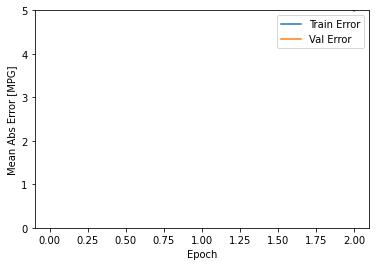

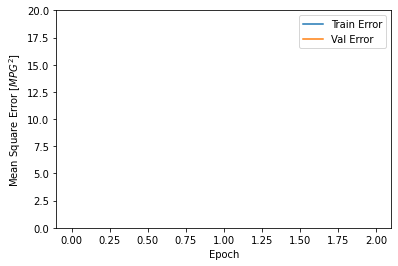

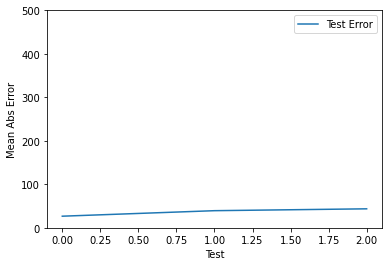

In [2424]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()

  plt.figure()
  plt.xlabel('Test')
  plt.ylabel('Mean Abs Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Test Error')
  plt.ylim([0,500])
  plt.legend()

  plt.show()


plot_history(history)

In [2425]:
loss, mae, mse = model.evaluate(X_testArrayNN, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

2/2 - 1s - loss: 1932.5790 - mae: 43.6392 - mse: 1932.5790 - 558ms/epoch - 279ms/step
Testing set Mean Abs Error: 43.64 MPG


2/2 [==============================] - 0s 5ms/step


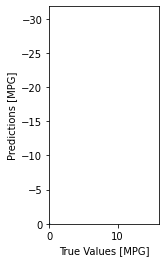

In [2426]:
test_predictions = model.predict(X_testArrayNN).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

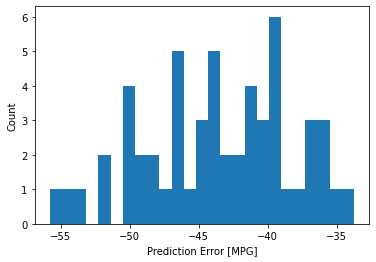

In [2427]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")

In [2428]:
predicted_yNN = model.predict(X_val)

y_valNN['Prediccion'] = predicted_yNN
xNN = y_valNN
ordenarTest(horarios, index, xNN)
xNN.to_csv('outputNN.csv' , index=False)

predicted_yNN

2/2 [==============================] - 0s 5ms/step


array([[-45.92551 ],
       [-45.800293],
       [-46.072342],
       [-46.243706],
       [-46.45338 ],
       [-46.32305 ],
       [-46.28489 ],
       [-46.605896],
       [-46.805138],
       [-32.535137],
       [-32.72438 ],
       [-33.032253],
       [-32.74458 ],
       [-32.774944],
       [-33.17443 ],
       [-32.62357 ],
       [-33.068836],
       [-33.208206],
       [-33.31645 ],
       [-33.479504],
       [-33.684193],
       [-35.22082 ],
       [-35.197495],
       [-35.2214  ],
       [-35.261986],
       [-35.457897],
       [-35.793064],
       [-35.95123 ],
       [-35.812702],
       [-36.044506],
       [-36.01096 ],
       [-36.07027 ],
       [-36.64226 ],
       [-36.394882],
       [-36.676476],
       [-38.041206],
       [-38.60967 ],
       [-38.487755],
       [-38.325768],
       [-38.449497],
       [-38.923466],
       [-38.844753],
       [-38.968052],
       [-39.08861 ],
       [-39.449   ],
       [-39.129467],
       [-35.04324 ],
       [-34.8